<center>

###     
## 2022./2023.
# Analysis of aerial bombing operations in World War II

#### Group members: Marko Bonovil, Nika Hell and Josipa Radak

</center>

# Project Description

# Introduction
World War II is one of the most terrifying events in recent history. Occurring just 21 years after some of the other most horrifying wars in history (WW1), it involved nearly all countries of the world. It began with Germany's invasion of Poland (September 1, 1939) and ended (September 2, 1945) with the victory of the Allies (USA, USSR, UK, etc.). As this war unfolded in more recent history, we have a considerable amount of documents and information from this period. It is also the most documented war in human history.

World War II involved continuous strategic bombing of cities, ports, railways, and the like. Strategic bombing was designed to destroy a country's ability to wage war by demoralizing civilians and targeting elements of enemy infrastructure. Bombing certainly had a significant impact on the end and outcome of the war (atomic bombs, etc.), making such data highly interesting.

# Summary
In this project, we will familiarize ourselves with the data, its structure, and meaning. We will assess the cleanliness of the dataset, checking for missing values, duplicates, the nature of values present in this dataset, etc. Additionally, we will perform some data processing such as attempting to reconstruct missing values and splitting values from one column into multiple columns. After that, by posing questions, visualization, and answering those questions, we will delve further into the data and uncover some interesting facts. Subsequently, we will statistically analyze the selected dataset by formulating hypotheses, observing measures of dispersion, correlations, etc. Using the k-nearest neighbors algorithm, we will attempt to place certain coordinates into specific operational areas. Finally, assuming the war lasted for another year, we will forecast how many more bombs would have fallen in that period.

#Content

1. Libraries
2. Data Loading
3. Preliminary Exploratory Data Analysis
4. Exploratory Data Analysis
5. Statistics
6. Forecasting
7. k-nearest Neighbors
8. Conclusion

# 1. Libraries

[***Pandas***](https://pandas.pydata.org/) is a Python library for data manipulation and analysis. Specifically, it provides data structures and operations for manipulating numerical tables and time series.

[***NumPy***](https://numpy.org/doc/stable/index.html)  is a Python library that adds support for large, multi-dimensional arrays and matrices, along with a vast collection of high-level mathematical functions for working on these arrays.

[***Matplotlib***](https://matplotlib.org/stable/index.html)is a Python library for plotting and numerical mathematics extension of NumPy.

[***Seaborn***](https://seaborn.pydata.org/#) is a Python library for data visualization based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[***Plotly***](https://plotly.com/python/) is a Python library for data visualization that enables interactive visualizations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots # fir slider
from plotly.offline import init_notebook_mode, iplot, plot

In [ ]:
import textwrap # text wrapping in graphs
from scipy.spatial import distance # calculating distances between vectors
from wordcloud import WordCloud # word cloud
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # image

In [ ]:
!pip install squarify #treemaps
import squarify as sq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.options.mode.chained_assignment = None # remove copy warnings from Pandas

[***GeoPy***](https://geopy.readthedocs.io/en/stable/) is a Python library, a Python client for several popular geocoding web services.

GeoPy in Python facilitates locating coordinates of addresses, cities, countries, and landmarks worldwide using third-party geocoders and other data sources.

In [ ]:
!pip install geopy
import geopy
from geopy.geocoders import Nominatim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Data Loading
[***Aerial Bombing Operations in World War II***](https://www.kaggle.com/datasets/usaf/world-war-ii
)

"This dataset consists of digitized paper reports on missions from World War II. Each record includes the date, conflict, geographic location, and other data elements to create a live sequence of aerial warfare from 1939 to 1945. The records include data from the American and Royal Air Forces (UK), along with some data from the Australian, New Zealand, and South African Air Forces."


The first step is to connect to Google Drive so that we can load the data into Google Colaboratory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/project

After connecting to Google Drive, we check the memory usage of the file (CSV file) we will be using for analysis. First, we will see how much memory we have available, or what resources we have in Google Colab, and then we will see how much memory the desired dataset occupies to know if we need to be careful and take necessary steps for working with large datasets (larger than available memory) and whether there will be a need to introduce additional libraries for working with large datasets (e.g., Dask).

In [ ]:
!lscpu | grep 'Model name'
!lscpu | grep '^CPU(s):'
!lscpu | grep 'Thread(s) per core:'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Socket(s):'
!lscpu | grep 'CPU MHz:'

Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
CPU(s):                          2
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
CPU MHz:                         2199.998


In [ ]:
!cat /proc/meminfo | grep 'MemTotal:' # total memory amount
!cat /proc/meminfo | grep 'MemFree:' # amount of physical RAM memory that is not being used by the system
!cat /proc/meminfo | grep 'MemAvailable:' # estimate of how much memory is available for new application to use without swapping

MemTotal:       13297200 kB
MemFree:         8440560 kB
MemAvailable:   10815372 kB


In [ ]:
# viewing how much memory the file occupies (bash)
!ls -sh operations.csv

28M operations.csv


We see that the CSV file does not occupy much memory space, meaning the dataset will not consume more memory than we have available. From this, we can conclude that there will be no need to introduce additional libraries, and we will not take necessary steps for working with large datasets (larger than the available memory size). Now, we can load the data into a Pandas DataFrame (a two-dimensional data structure - a table consisting of rows and columns).

In [ ]:
# df = pd.read_csv('operations.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df = pd.read_csv('operations.csv', low_memory=False)

During the first attempt to load the data, after running the cell, we received a warning (DtypeWarning). By consulting the [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.errors.DtypeWarning.html) about what this warning means, we can see that it occurs when reading different dtypes in a column from the file in larger datasets where loading is done in chunks. As a solution, we are offered to set an additional parameter `low_memory = False`.

If `low_memory=True` (default), Pandas reads the data in chunks of rows and then groups them. Then, some of the columns might look like chunks of integers and strings mixed, depending on whether something during grouping could not be converted to an integer (for example). This could later cause problems. The warning indicates that this happened at least once in the reading (in this case, across multiple columns). Setting `low_memory=False` will use more memory but will avoid the problem.

If `low_memory=False`, entire columns will be read first, and then appropriate types will be determined. For example, the column will be kept as objects (arrays) as needed to preserve information.

After setting the additional parameter, the warning no longer appears. Now we can continue with our work. We will check the memory usage per column (in bytes). We will also pass the "deep" parameter, which, if True, will deeply introspect the data, examining the dtypes objects for memory consumption at the system level and include them in the returned values.

In [ ]:
# memory usage and basic information
memory_usage_efficient = df.memory_usage(deep=True)
memory_before = memory_usage_efficient.sum()/(1024)**2
print(f"Memory usage : {memory_usage_efficient.sum()}B = {memory_before:.1f} MB")

Memory usage : 226158834B = 215.7 MB


In [ ]:
df.info(memory_usage="deep") # Data Types per Columns and Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

# 3. Preliminary Exploratory Data Analysis

In this chapter, we will familiarize ourselves with data structure, data semantics, missing values, duplicates, etc. After that, depending on the results obtained, we will proceed to remove duplicates, missing values, change data types in the dataset, etc. Finally, we will wrap up the whole story with a final look at the organized data.

## 3.1. Getting acquainted with the data

### 3.1.1. Getting to know the structure and first look at the data
As a first step, it would be good to see how much data we have (how many columns and rows the dataset contains), what the columns are, what types of data are in the columns, and roughly what the values in those columns look like.

In [ ]:
# type of df object
type(df)

pandas.core.frame.DataFrame

In [ ]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The number of elements is: {df.size}")
print(f"The number of dimensions: {df.ndim}")

Ovaj skup podataka ima 178281 redaka i 46 stupaca.
Broj elemenata je: 8200926
Broj dimenzija: 2


In [ ]:
# columns
def columns(data):
  for col in data.columns:
    print("\t",col)
print("Columns:")
columns(df)

Stupci:
	 Mission ID
	 Mission Date
	 Theater of Operations
	 Country
	 Air Force
	 Unit ID
	 Aircraft Series
	 Callsign
	 Mission Type
	 Takeoff Base
	 Takeoff Location
	 Takeoff Latitude
	 Takeoff Longitude
	 Target ID
	 Target Country
	 Target City
	 Target Type
	 Target Industry
	 Target Priority
	 Target Latitude
	 Target Longitude
	 Altitude (Hundreds of Feet)
	 Airborne Aircraft
	 Attacking Aircraft
	 Bombing Aircraft
	 Aircraft Returned
	 Aircraft Failed
	 Aircraft Damaged
	 Aircraft Lost
	 High Explosives
	 High Explosives Type
	 High Explosives Weight (Pounds)
	 High Explosives Weight (Tons)
	 Incendiary Devices
	 Incendiary Devices Type
	 Incendiary Devices Weight (Pounds)
	 Incendiary Devices Weight (Tons)
	 Fragmentation Devices
	 Fragmentation Devices Type
	 Fragmentation Devices Weight (Pounds)
	 Fragmentation Devices Weight (Tons)
	 Total Weight (Pounds)
	 Total Weight (Tons)
	 Time Over Target
	 Bomb Damage Assessment
	 Source ID


In [ ]:
df.dtypes # data types by column

Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           object
Target Latitude                          float64
Target Longitude    

In [ ]:
pd.set_option('display.max_columns', None) # show all columns
# show first 3 rows of data
df.head(3)

Mission ID Mission Date Theater of Operations Country Air Force  \
0           1    8/15/1943                   MTO     USA     12 AF   
1           2    8/15/1943                   PTO     USA      5 AF   
2           3    8/15/1943                   MTO     USA     12 AF   

         Unit ID Aircraft Series Callsign Mission Type          Takeoff Base  \
0  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
1         400 BS             B24      NaN            1                   NaN   
2  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   

  Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
0           SICILY        37.131022          14.321464     40675   
1              NaN              NaN                NaN       NaN   
2           SICILY        37.131022          14.321464      9630   

  Target Country Target City Target Type Target Industry Target Priority  \
0          ITALY   SPADAFORA         NaN             NaN             NaN   
1     NEW GUINEA    KOMIATUM       RIDGE             NaN               1   
2          ITALY     COSENZA         NaN             NaN             NaN   

   Target Latitude  Target Longitude  Altitude (Hundreds of Feet)  \
0        38.220000             15.37                          NaN   
1        -7.166667            147.00                         44.0   
2        39.270000             16.25                          NaN   

   Airborne Aircraft  Attacking Aircraft  Bombing Aircraft  Aircraft Returned  \
0               20.0                 NaN              20.0                NaN   
1                NaN                 6.0               NaN                NaN   
2               18.0                 NaN              36.0                NaN   

   Aircraft Failed  Aircraft Damaged  Aircraft Lost  High Explosives  \
0              NaN               NaN            NaN             40.0   
1              NaN               NaN            NaN             40.0   
2              NaN               NaN            NaN             36.0   

      High Explosives Type High Explosives Weight (Pounds)  \
0   500 LB GP (GP-M43/M64)                             NaN   
1  1000 LB GP (GP-M44/M65)                             NaN   
2   500 LB GP (GP-M43/M64)                             NaN   

   High Explosives Weight (Tons)  Incendiary Devices Incendiary Devices Type  \
0                           10.0                 NaN                     NaN   
1                           20.0                 NaN                     NaN   
2                            9.0                 NaN                     NaN   

   Incendiary Devices Weight (Pounds)  Incendiary Devices Weight (Tons)  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   

   Fragmentation Devices Fragmentation Devices Type  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   

   Fragmentation Devices Weight (Pounds)  Fragmentation Devices Weight (Tons)  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   

   Total Weight (Pounds)  Total Weight (Tons) Time Over Target  \
0                    NaN                 10.0              NaN   
1                    NaN                 20.0              NaN   
2                    NaN                  9.0              NaN   

  Bomb Damage Assessment  Source ID  
0                    NaN        NaN  
1                    NaN     9366.0  
2                    NaN        NaN

In [ ]:
# show last 3 rows of data
df.tail(3)

Mission ID Mission Date Theater of Operations      Country Air Force  \
178278      178740    2/16/1945                   CBI          USA     10 AF   
178279      178741    2/16/1945                   PTO  NEW ZEALAND     RNZAF   
178280      178742    2/16/1945                   CBI          USA     10 AF   

                      Unit ID Aircraft Series Callsign Mission Type  \
178278                  90 FS             P47      NaN           10   
178279  NO. 22 SQUADRON RNZAF             F4U      NaN          NaN   
178280                  59 FS             P47      NaN           10   

       Takeoff Base Takeoff Location Takeoff Latitude  Takeoff Longitude  \
178278          NaN              NaN              NaN                NaN   
178279          NaN              NaN              NaN                NaN   
178280          NaN              NaN              NaN                NaN   

       Target ID Target Country    Target City          Target Type  \
178278       NaN          BURMA        MYITSON  UNIDENTIFIED TARGET   
178279       NaN    NEW IRELAND  KAVIENG SWEEP      VARIOUS TARGETS   
178280       NaN          BURMA         MONGLI               STORES   

       Target Industry Target Priority  Target Latitude  Target Longitude  \
178278             NaN               1        21.433333         96.466667   
178279             NaN             NaN        -2.583333        150.833333   
178280             NaN               1        24.883333         97.583333   

        Altitude (Hundreds of Feet)  Airborne Aircraft  Attacking Aircraft  \
178278                          5.0                NaN                 4.0   
178279                          NaN                NaN                 8.0   
178280                         25.0                NaN                 8.0   

        Bombing Aircraft  Aircraft Returned  Aircraft Failed  \
178278               NaN                NaN              NaN   
178279               NaN                NaN              NaN   
178280               NaN                NaN              NaN   

        Aircraft Damaged  Aircraft Lost  High Explosives  \
178278               NaN            NaN         8.000000   
178279               NaN            NaN         8.000000   
178280               NaN            NaN         6.153846   

           High Explosives Type High Explosives Weight (Pounds)  \
178278       250 LB GP (GP-M57)                             NaN   
178279  1000 LB GP (GP-M44/M65)                            8000   
178280  325 LB DC (DB-MK 17/47)                             NaN   

        High Explosives Weight (Tons)  Incendiary Devices  \
178278                            1.0                 NaN   
178279                            4.0                 NaN   
178280                            1.0                 NaN   

       Incendiary Devices Type  Incendiary Devices Weight (Pounds)  \
178278                     NaN                                 NaN   
178279                     NaN                                 NaN   
178280                     NaN                                 NaN   

        Incendiary Devices Weight (Tons)  Fragmentation Devices  \
178278                               NaN                    NaN   
178279                               NaN                    NaN   
178280                               NaN                    NaN   

       Fragmentation Devices Type  Fragmentation Devices Weight (Pounds)  \
178278                        NaN                                    NaN   
178279                        NaN                                    NaN   
178280                        NaN                                    NaN   

        Fragmentation Devices Weight (Tons)  Total Weight (Pounds)  \
178278                                  NaN                    NaN   
178279                                  NaN                 8000.0   
178280                                  NaN                    NaN   

        Total Weight (Tons) Time Over Targ

These data have 178,281 rows and 46 columns, which brings us to 8,200,926 fields or entries in the table (DataFrame). At first glance, all columns appear to be properly labeled, although the "Mission ID" column seems unnecessary (for now). The columns are of type "object" or "float" or "int". When we look at the first and last three rows of data, we can immediately see that there will be a need to change data types in columns (e.g., dates). Additionally, we can observe that we will likely have a lot of work regarding NaN (missing) values. In the following, we will delve deeper into this issue.

### 3.1.2. Understanding the columns in the dataset
We will get acquainted with the columns present in this dataset. What are those columns, what do they represent, and what kind of data do they contain.


**operations.csv:**

1. **Mission ID**: Mission ID
2. **Mission Date**: Date when the bombing mission was carried out
3. **Theater of Operations**: Areas of operations
4. **Country**: Country conducting the bombing
5. **Air Force**: Combat unit conducting the bombing
6. **Unit ID**: ID of the group performing the operation
7. **Aircraft Series**: Type of aircraft used in the mission
8. **Callsign**: Recognition (encrypted nicknames)
9. **Mission Type**: Type of mission
10. **Takeoff Base**: Departure port
11. **Takeoff Location**: Location of the departure port
12. **Takeoff Latitude**: Latitude of the departure port
13. **Takeoff Longitude**: Longitude of the departure port
14. **Target ID**: Target ID
15. **Target Country**: Country targeted by the bombing
16. **Target City**: City targeted by the bombing
17. **Target Type**: Type of target
18. **Target Industry**: Industries bombed
19. **Target Priority**: Mission priority
20. **Target Latitude**: Latitude of the target
21. **Target Longitude**: Longitude of the target
22. **Altitude (Hundreds of Feet)**: Altitude
23. **Airborne Aircraft**: Number of aircraft involved in the operation
24. **Attacking Aircraft**: Number of fighter aircraft
25. **Bombing Aircraft**: Number of bomber aircraft
26. **Aircraft Returned**: Number of aircraft returned
27. **Aircraft Failed**: Number of aircraft failed
28. **Aircraft Damaged**: Number of aircraft damaged
29. **Aircraft Lost**: Aircraft lost in the operation (destroyed)
30. **High Explosives**: Number of bombs used in the operation
31. **High Explosives Type**: Type of bombs
32. **High Explosives Weight (Pounds), (Tons)**: Weight of bombs
33. **Incendiary Devices**: Number of incendiary devices
34. **Incendiary Devices Type**: Type of incendiary devices
35. **Incendiary Devices Weight (Pounds), (Tons)**: Weight of incendiary devices
36. **Fragmentation Devices**: Number of fragmentation devices
37. **Fragmentation Devices Type**: Type of fragmentation devices
38. **Fragmentation Devices Weight (Pounds), (Tons)**: Weight of fragmentation devices
39. **Total Weight (Pounds), (Tons)**: Total weight of aircraft with bombs
40. **Time Over Target**: Time of return from the mission
41. **Bomb Damage Assessment**: Assessment of damage caused by bombing
42. **Source ID**: Source ID


#### 3.1.2.1. Columns with "object" values


We start with the "Mission Date" column. This column contains dates of certain missions. We already know that we will need to change the data type of this column to "datetime64", because these are indeed dates and it will be easier for us to manipulate them. Below, we will see the number of records per year. We know that World War II was from September 1, 1939, to September 2, 1945, and a brief description on Kaggle says that we have data for all years of the war.

In [ ]:
# years in our data
df['Mission Date'].apply(lambda x: x[x.rfind("/")+1:]).value_counts()

1944    80550
1945    51408
1943    23214
1941    10275
1940     6742
1942     6051
1939       41
Name: Mission Date, dtype: int64

We can see that these records are from the year 1939, although there are fewer of them then. We have the most records from 1944 and 1945, just before the end of the war.

Let's move on to the other columns of type "object".

In [ ]:
for clmn in df.drop('Mission Date', axis=1).columns:
  if df[clmn].dtype == np.object_:
    print("-"*80)
    print(f'Column "{clmn}":')
    # unique values in column
    print('Unique values in column are:')
    print(df[clmn].unique())
    # the number of occurrences of unique values ​​in the column
    print("The number of occurrences of unique values ​​in the column:")
    print(df[clmn].value_counts(), "\n")

--------------------------------------------------------------------------------
Stupac "Theater of Operations":
Jedinstvene vrijednosti u stupcu su:
['MTO' 'PTO' 'CBI' 'ETO' nan 'EAST AFRICA' 'MADAGASCAR']
Broj pojavljivanja jedinstvenih vrijednosti u stupcu:
ETO            95827
PTO            36192
MTO            30532
CBI            12404
EAST AFRICA      142
MADAGASCAR        26
Name: Theater of Operations, dtype: int64 

--------------------------------------------------------------------------------
Stupac "Country":
Jedinstvene vrijednosti u stupcu su:
['USA' 'GREAT BRITAIN' nan 'NEW ZEALAND' 'SOUTH AFRICA' 'AUSTRALIA']
Broj pojavljivanja jedinstvenih vrijednosti u stupcu:
USA              94165
GREAT BRITAIN    31361
NEW ZEALAND        633
AUSTRALIA          316
SOUTH AFRICA        19
Name: Country, dtype: int64 

--------------------------------------------------------------------------------
Stupac "Air Force":
Jedinstvene vrijednosti u stupcu su:
['12 AF' '5 AF' '10 AF' 'RA

In [ ]:
# what do the rows that have the same "Target ID" look like
## for the highest frequency of occurrence
df[df['Target ID']=='9308'].head()

Mission ID Mission Date Theater of Operations        Country Air Force  \
1868        1869    8/22/1943                   ETO  GREAT BRITAIN       RAF   
1869        1870    8/22/1943                   ETO  GREAT BRITAIN       RAF   
2498        2499    8/26/1943                   ETO  GREAT BRITAIN       RAF   
2500        2501    7/31/1944                   ETO  GREAT BRITAIN       RAF   
3296        3297    8/29/1943                   ETO  GREAT BRITAIN       RAF   

     Unit ID Aircraft Series Callsign Mission Type Takeoff Base  \
1868     NaN             LGT      NaN          NaN          NaN   
1869     NaN             LGT      NaN          NaN          NaN   
2498     NaN            WELL      NaN          NaN          NaN   
2500     NaN             LGT      NaN          NaN          NaN   
3296     NaN             LGT      NaN          NaN          NaN   

     Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
1868              NaN              NaN                NaN      9308   
1869              NaN              NaN                NaN      9308   
2498              NaN              NaN                NaN      9308   
2500              NaN              NaN                NaN      9308   
3296              NaN              NaN                NaN      9308   

     Target Country Target City Target Type               Target Industry  \
1868        GERMANY     COLOGNE   CITY AREA  CITIES TOWNS AND URBAN AREAS   
1869        GERMANY     COLOGNE   CITY AREA  CITIES TOWNS AND URBAN AREAS   
2498        GERMANY     COLOGNE   CITY AREA  CITIES TOWNS AND URBAN AREAS   
2500        GERMANY     COLOGNE   CITY AREA  CITIES TOWNS AND URBAN AREAS   
3296        GERMANY     COLOGNE   CITY AREA  CITIES TOWNS AND URBAN AREAS   

     Target Priority  Target Latitude  Target Longitude  \
1868             NaN            50.93              6.95   
1869             NaN            50.93              6.95   
2498             NaN            50.93              6.95   
2500             NaN            50.93              6.95   
3296             NaN            50.93              6.95   

      Altitude (Hundreds of Feet)  Airborne Aircraft  Attacking Aircraft  \
1868                          NaN                NaN                 NaN   
1869                          NaN                1.0                 1.0   
2498                        170.0                NaN                 NaN   
2500                          NaN                1.0                 1.0   
3296                        280.0                NaN                 NaN   

      Bombing Aircraft  Aircraft Returned  Aircraft Failed  Aircraft Damaged  \
1868               NaN                NaN              NaN               NaN   
1869               1.0                NaN              NaN               NaN   
2498               NaN                NaN              NaN               NaN   
2500               1.0                NaN              NaN               NaN   
3296               NaN                NaN              NaN               NaN   

      Aircraft Lost  High Explosives High Explosives Type  \
1868            NaN              NaN                  NaN   
1869            NaN              NaN                  NaN   
2498            NaN              NaN                  NaN   
2500            NaN              NaN                  NaN   
3296            NaN              NaN                  NaN   

     High Explosives Weight (Pounds)  High Explosives Weight (Tons)  \
1868                             NaN                            NaN   
1869                             NaN                            1.0   
2498                             NaN                           16.0   
2500                             NaN                            1.0   
3296                             NaN                            1.0   

      Incendiary Devices Incendiary Devices Type  \
1868                 NaN                     NaN   
1869                 NaN                 

**"Mission Date"**

This column contains dates of individual missions. We will convert this column to the "datetime" type.

**"Theater of Operations"**

Here we see that we have only a few values that this column can take. Apart from missing values, we also have some abbreviations that this column can take as values.

* ETO - European Theater of Operations
* PTO - Pacific Theater of Operations
* MTO - Mediterranean Theater of Operations
* CBI - China, Burma (Myanmar), India
* EAST AFRICA - East Africa
* MADAGASCAR

As we have only a few values, we will later reshape this column into the final list of textual values (categories).

**"Country"**

This column contains the name of the country to which a certain warplane that carried out the operation belongs.

Again, we have only a few values in this column, so we will convert the data into categories. We can see that, besides data from the USA, data from some of their allies (UK, New Zealand, Australia, and South Africa) are also available here.

**"Air Force"**

This is a column containing data about combat units conducting the bombing.

Once again, we have only a few values, so we will convert this data into categorical variables.

* RAF - Royal Air Force
* 5, 7, 8, 9, 10, 11, 13, 14, 15, 20 AF - United States Air Force
* RNZAF - Royal New Zealand Air Force
* 1 TAC - Australian First Tactical Air Force
* 1 RAAF - Royal Australian Air Force
* SAAF - South African Air Force
* RAAF/NEI - union of Dutch and Australian air forces

**"Unit ID"**

Or a column containing data about the ID of the group (squadron or unit) conducting the operation.

In the "Unit ID" column, we have a few more values that can be taken, but there are still a finite number of them, so we can calculate the frequencies of appearance of certain values. For this reason, we will also convert this data into categorical variables.

**"Aircraft Series"**

"Aircraft Series" provides us with data about the type of aircraft used in the mission.

Again, as in the previous case, we will convert these values into categorical data.

**"Callsign"**

This column contains specialized forms of nicknames used as substitutes for pilots' personal names.

There are only a few of them, and they appear multiple times, so we will also categorize them.

**"Mission Type"**

This column contains data about mission types. For example, a B17 mission was a daily precision bombing, P38 was long-range, etc.

In this column, we again encounter categories.

**"Takeoff Base"**

The column containing the names of departure ports (or bases). This column is also a categorical variable. It contains values such as "LG 104" or British port in North Africa, etc.

**"Takeoff Location"**

Again, a categorical variable. It contains the name of the country or province from which the air forces took off (e.g., Sicily, Libya, etc.).

**"Takeoff Latitude"**

This column contains data about the latitude of the departure port. This column mostly contains numerical values and should be a numeric data type. However, there are a few country names from which the departure is made. Below, we will try to replace those data with numerical data and convert the column into "float" data.

**"Target ID"**

This column contains the ID of the target. By itself, it does not tell us much, but it seems that the same ID corresponds to similar targets.

**"Target Country"**

The "Target Country" column contains information about the country that is the target of the attack (Germany, Italy, etc.). Here we have a finite number of countries, so we will also convert this column into a categorical variable. Since in this column we have values like "KOREA OR CHOSEN", we will remove the second country name from them.

**"Target City"**

This column contains information about the city that was attacked (e.g., Berlin, Hamburg, etc.). The values in this column are mostly cities, but in some cases, for example, a target that was attacked. Also, we have a finite number of cities, so we will do the same as in the previous column.

**"Target Type"**

This column provides information about the type of target (e.g., hospital, city center, etc.). There are a finite number of target types, so these are categorical data.

**"Target Industry"**

This column provides similar information to the previous one. However, unlike the previous one, it tells us which specific industry was the target. For example, the previous column tells us that a village was bombed, and this one says that fields and crops were bombed.

**"Target Priority"**

This column contains data about the priority of the target. Unlike other types of attacks, air raids are much faster, more efficient, but also more expensive. As such, they probably had to act efficiently and set priorities (1 as the highest priority and so on). That is, if the enemy destroys something important (e.g., a base or tunnels and bridges), it is much more important and can slow down the enemy much faster than bombing a village.

In this column, we have only a few values, so we will convert its values into the "category" type.

**"High Explosives Type"**

This column contains data about the type of bombs used. This column contains a few values, so we will proceed as in the previous step.

**"High Explosives Weight (Pounds)"**

This column contains data about the weights of bombs. These data should be numeric, but we have some values like 250 LB GP (GP-M57), which actually tells us that the bomb weighs 250LB, and GP indicates that it is for general use. Below, we will remove such data.

**"Incendiary Devices Type"**

This column contains data about incendiary devices used to activate the bomb. Again, we have categorical data.

**"Fragmentation Devices Type"**

The type of fragmentation device is actually the type of dispersal. That is, the type of bomb or grenade whose shell breaks after an explosion and scatters in pieces in all directions. This is also a categorical variable.

**"Time Over Target"**

Time spent over the target in seconds. These should be numeric data.

**"Bomb Damage Assessment"**

Estimated damage caused by the bomb. This data contains a brief description of the damage, and as it is, we will leave it as "object" type.

---
Note: Short descriptions of individual columns are found at the beginning of this subsection.

#### 3.1.2.2. Columns with "float" values

First, let's take a look at the data we have in these columns.

In [ ]:
for clmn in df.columns:
  if df[clmn].dtype == np.float_:
    print("-" * 80)
    print(f'Column "{clmn}":')
    # unique values in the column
    print('Unique values in the column are:')
    print(df[clmn].unique())
    # number of occurrences of unique values in the column
    print("Number of occurrences of unique values in the column:")
    print(df[clmn].value_counts(), "\n")

--------------------------------------------------------------------------------
Stupac "Takeoff Longitude":
Jedinstvene vrijednosti u stupcu su:
[ 1.43214640e+01             nan  1.35500000e+03  1.55383889e+02
  1.01219360e+01  1.52332940e+01  9.48472200e+00  1.50056500e+01
  1.49430190e+01  1.49827610e+01  3.66496080e+01  1.49125000e+01
  1.44000000e+01  1.66833333e+02 -1.25333000e+00 -1.07770000e-01
  7.73050000e-01 -4.35550000e-01 -5.51110000e-01 -1.42027000e+00
  4.86660000e-01  3.70550000e-01  4.50267000e+01  3.13166667e+01
  3.70000000e+01  3.68167000e+01  3.72166670e+01  3.25200000e+01
  1.44775000e+01  1.55066667e+02  8.45138900e+00  1.39606420e+01
  3.68178650e+01  3.25000000e+01  2.98513889e+01  3.24923000e+01
  1.41763190e+01  1.43493810e+01  1.20560278e+02  1.31027967e+02
  1.24833325e+02  1.17150000e+02  9.61332220e+01  1.22433333e+02
  1.12628056e+02  1.04700000e+02  1.10300000e+02  1.11400000e+02
  9.49414000e+01  8.69750000e+01  7.98639000e+01  9.28726280e+01
  8.84466

We can notice that among the "float" type columns, there are no categorical variables or any other type. However, we can observe that we have some discrete data, while others are continuous. In the following, we will delve a bit deeper into this issue.

**"Takeoff Longitude"**

Or geographical longitude of the takeoff base. This column contains numerical continuous values.

**"Target Longitude"** and **"Target Latitude"**

Geographical longitude and latitude of the target location. Here, we also have numerical continuous data.

**"Altitude (Hundreds of Feet)"**

This column contains information about the altitude from which the target was attacked. The values are continuous numerical variables, and the unit of measurement is feet. Since feet are not an intuitive unit of measurement (to us in Europe), we will transform feet into kilometers.

**"Airborne Aircraft"**

This column tells us how many aircraft participated in the air operation. This is a discrete numerical variable because it only tells us the number of aircraft involved.

**"Attacking Aircraft"**

The column contains data on the number of attacking fighter-bombers participating in the mission. As in the previous case, this is a discrete numerical variable.

**"Bombing Aircraft"**

The column contains information about the number of bombing aircraft. Again, we have a discrete numerical variable.

**"Aircraft Returned"**

The number of aircraft (air forces) that returned after the mission. Here, too, we have a discrete numerical variable.

**"Aircraft Failed"**

Or the column containing information about the number of aircraft (air forces) that were shot down during the mission. Again, this is a discrete numerical variable.

**"Aircraft Damaged"**

Number of aircraft damaged in a particular mission. This is a discrete numerical variable.

**"Aircraft Lost"**

The number of aircraft for which their fate during the mission is unknown, and they did not return (they were lost). This is also a discrete numerical variable.

**"High Explosives"**

Number of explosives used in the attack during the mission. Again, this is a discrete numerical variable.

**"High Explosives Weight (Tons)"**

This column provides information about the weight of the bomb in tons (1000 kg). This is a continuous numerical variable.

As both this column and the corresponding column showing the weight in pounds provide the same information in different measurement systems, we will check whether the measurements correspond, fill in the missing values, and then convert them into one column.

**"Incendiary Devices"**

Or the number of incendiary devices. This should be a discrete numerical variable.

**"Incendiary Devices Weight (Pounds)"**

Weight of incendiary devices in pounds. Here we have a continuous numerical variable.

**"Incendiary Devices Weight (Tons)"**

Weight of incendiary devices in tons. Here we have a continuous numerical variable. However, as with bombs, we have the same information in two columns, so we will perform the same procedure.

**"Fragmentation Devices"**

This column contains information about the number of fragmentation devices. This should be a discrete numerical variable. However, as with incendiary devices, we see that not all data are integers, so we will investigate further.

**"Fragmentation Devices Weight (Pounds)"**

Weight of fragmentation devices in pounds. Here we have a continuous numerical variable.

**"Fragmentation Devices Weight (Tons)"**

Weight of fragmentation devices in tons. Here we have a continuous numerical variable. However, as with bombs, we have the same information in two columns, so we will perform the same procedure.

**"Total Weight (Pounds)"**

Total weight of the aircraft with the bomb in pounds. Here we have a continuous numerical variable.

**"Total Weight (Tons)"**

Total weight of the aircraft in tons. Here we have a continuous numerical variable. However, as with bombs, we have the same information in two columns, so we will perform the same procedure.

**"Source ID"**

This column contains information about the ID of the source from which the mission data was collected. This column should be of type object.

---
Note: Abbreviated descriptions of individual columns are provided at the beginning of this subsection.

It has been observed that some coordinates are in thousands. Let's look at which coordinates are greater than 180 degrees.

In [ ]:
# target coordinates
df[(df["Target Longitude"] > 180) | (df["Target Latitude"] > 180)][["Target Longitude", "Target Latitude", "Target City", "Target Country"]]

Target Longitude  Target Latitude   Target City  \
14479              42.55          1108.00      TALAMONE   
15211            1000.65           100.65      LA BELLE   
38012            1000.65           100.65  TERSCHELLING   
38013            1000.65           100.65  TERSCHELLING   
39245            1000.65           100.65  TERSCHELLING   
...                  ...              ...           ...   
168553           1000.65           100.65    MONDEVILLE   
168554           1000.65           100.65    MONDEVILLE   
168555           1000.65           100.65    MONDEVILLE   
168665           1000.65           100.65  TERSCHELLING   
168666           1000.65           100.65  TERSCHELLING   

                Target Country  
14479                      NaN  
15211                   FRANCE  
38012   HOLLAND OR NETHERLANDS  
38013   HOLLAND OR NETHERLANDS  
39245   HOLLAND OR NETHERLANDS  
...                        ...  
168553                  FRANCE  
168554                  FRANCE  
168555                  FRANCE  
168665  HOLLAND OR NETHERLANDS  
168666  HOLLAND OR NETHERLANDS  

[115 rows x 4 columns]

In [ ]:
# takeoff coordinates
#df[(df["Takeoff Longitude"] > 180) | (df["Takeoff Latitude"] > 180)][["Takeoff Longitude", "Takeoff Latitude", "Takeoff Base", "Target Country"]]

We see that such a value exists for the coordinates of the takeoff base. After searching on Google Maps and coordinate converters, it was noticed that the decimal point in these coordinates is in the wrong place. For this reason, we will simply move the decimal point. We could have also noticed this from the target country (Italy), but we wanted to be sure.

##### 3.1.2.2.1. Do the columns in pounds and tons contain the same information?

$2,204.623 lb = 1000kg = 1 ton$

In [ ]:
# Fragmentation Devices Weight
df_in_pounds = df[~df['Fragmentation Devices Weight (Pounds)'].isnull()][['Country','Fragmentation Devices Weight (Tons)', 'Fragmentation Devices Weight (Pounds)']]
df_in_pounds['ConvertedTonsExact'] = df_in_pounds['Fragmentation Devices Weight (Tons)'].apply(lambda x: x*2204.623 if x!= np.nan else np.nan)
df_in_pounds['ConvertedTonsAprox'] = df_in_pounds['Fragmentation Devices Weight (Tons)'].apply(lambda x: x*2000 if x!= np.nan else np.nan)
df_in_pounds.head(n=5)

Country  Fragmentation Devices Weight (Tons)  \
123265  AUSTRALIA                                 0.04   
123283  AUSTRALIA                                 0.13   
123313        USA                                 0.50   
123315  AUSTRALIA                                 0.03   
123325        USA                                 0.00   

        Fragmentation Devices Weight (Pounds)  ConvertedTonsExact  \
123265                                   80.0            88.18492   
123283                                  260.0           286.60099   
123313                                 1000.0          1102.31150   
123315                                   60.0            66.13869   
123325                                    0.0             0.00000   

        ConvertedTonsAprox  
123265                80.0  
123283               260.0  
123313              1000.0  
123315                60.0  
123325                 0.0

In [ ]:
# Fragmentation Devices Weight
df_in_pounds[(df_in_pounds["Fragmentation Devices Weight (Pounds)"] != df_in_pounds["ConvertedTonsAprox"]) &
             ((~df_in_pounds["Fragmentation Devices Weight (Pounds)"].isna()) &
              (~df_in_pounds["ConvertedTonsAprox"].isna()))]

Country  Fragmentation Devices Weight (Tons)  \
123709     USA                               0.1122   
124102     USA                               0.4488   
124440     USA                               0.2244   
126458     USA                               0.3179   
126464     USA                               0.4488   
127314     USA                               0.2992   
127317     USA                               0.2992   

        Fragmentation Devices Weight (Pounds)  ConvertedTonsExact  \
123709                                  224.4          247.358701   
124102                                  897.6          989.434802   
124440                                  448.8          494.717401   
126458                                  635.8          700.849652   
126464                                  897.6          989.434802   
127314                                  598.4          659.623202   
127317                                  598.4          659.623202   

        ConvertedTonsAprox  
123709               224.4  
124102               897.6  
124440               448.8  
126458               635.8  
126464               897.6  
127314               598.4  
127317               598.4

In [ ]:
# Fragmentation Devices Weight
df_nan_pounds = df[df['Fragmentation Devices Weight (Pounds)'].isna()]
df_nan_pounds = df_nan_pounds[~df_nan_pounds['Fragmentation Devices Weight (Tons)'].isna()]
df_nan_pounds[['Fragmentation Devices Weight (Tons)', 'Fragmentation Devices Weight (Pounds)', 'Country' ]].head(n=5)

Fragmentation Devices Weight (Tons)  \
71                                  6.0   
72                                  6.0   
73                                  6.0   
89                                  5.0   
90                                  5.0   

    Fragmentation Devices Weight (Pounds) Country  
71                                    NaN     USA  
72                                    NaN     USA  
73                                    NaN     USA  
89                                    NaN     USA  
90                                    NaN     USA

In [ ]:
# Fragmentation Devices Weight
df_nan_tons = df[df['Fragmentation Devices Weight (Tons)'].isna()]
df_nan_tons = df_nan_tons[~df_nan_tons['Fragmentation Devices Weight (Pounds)'].isna()]
df_nan_tons[['Fragmentation Devices Weight (Tons)', 'Fragmentation Devices Weight (Pounds)', 'Country']].head(n=5)

Empty DataFrame
Columns: [Fragmentation Devices Weight (Tons), Fragmentation Devices Weight (Pounds), Country]
Index: []

In [ ]:
# Incendiary Devices Weight
df_in_pounds = df[~df['Incendiary Devices Weight (Pounds)'].isnull()][['Country','Incendiary Devices Weight (Tons)', 'Incendiary Devices Weight (Pounds)']]
df_in_pounds['ConvertedTonsExact'] = df_in_pounds['Incendiary Devices Weight (Tons)'].apply(lambda x: x*2204.623 if x!= np.nan else np.nan)
df_in_pounds['ConvertedTonsAprox'] = df_in_pounds['Incendiary Devices Weight (Tons)'].apply(lambda x: x*2000 if x!= np.nan else np.nan)
df_in_pounds.head(n=5)

Country  Incendiary Devices Weight (Tons)  \
120    NEW ZEALAND                              3.00   
12299  NEW ZEALAND                              3.00   
12500  NEW ZEALAND                              2.75   
13789  NEW ZEALAND                              3.00   
13790  NEW ZEALAND                              3.00   

       Incendiary Devices Weight (Pounds)  ConvertedTonsExact  \
120                                6000.0          6613.86900   
12299                              6000.0          6613.86900   
12500                              5500.0          6062.71325   
13789                              6000.0          6613.86900   
13790                              6000.0          6613.86900   

       ConvertedTonsAprox  
120                6000.0  
12299              6000.0  
12500              5500.0  
13789              6000.0  
13790              6000.0

In [ ]:
# Incendiary Devices Weight
df_in_pounds[(df_in_pounds['Incendiary Devices Weight (Pounds)'] != df_in_pounds["ConvertedTonsAprox"]) &
             ((~df_in_pounds['Incendiary Devices Weight (Pounds)'].isna()) &
              (~df_in_pounds["ConvertedTonsAprox"].isna()))]

Empty DataFrame
Columns: [Country, Incendiary Devices Weight (Tons), Incendiary Devices Weight (Pounds), ConvertedTonsExact, ConvertedTonsAprox]
Index: []

In [ ]:
# Incendiary Devices Weight
df_nan_pounds = df[df['Incendiary Devices Weight (Pounds)'].isna()]
df_nan_pounds = df_nan_pounds[~df_nan_pounds['Incendiary Devices Weight (Tons)'].isna()]
df_nan_pounds[['Incendiary Devices Weight (Tons)', 'Incendiary Devices Weight (Pounds)', 'Country' ]].head(n=5)

Incendiary Devices Weight (Tons)  Incendiary Devices Weight (Pounds)  \
45                              25.0                                 NaN   
46                              25.0                                 NaN   
57                              35.0                                 NaN   
82                              35.0                                 NaN   
83                              84.0                                 NaN   

          Country  
45            NaN  
46            NaN  
57  GREAT BRITAIN  
82            USA  
83            USA

In [ ]:
# Incendiary Devices Weight
df_nan_tons = df[df['Incendiary Devices Weight (Tons)'].isna()]
df_nan_tons = df_nan_tons[~df_nan_tons['Incendiary Devices Weight (Pounds)'].isna()]
df_nan_tons[['Incendiary Devices Weight (Tons)', 'Incendiary Devices Weight (Pounds)', 'Country']].head(n=5)

Incendiary Devices Weight (Tons)  Incendiary Devices Weight (Pounds)  \
23047                               NaN                               240.0   
23048                               NaN                               160.0   
23605                               NaN                                 0.0   
23611                               NaN                                 0.0   
23612                               NaN                                 0.0   

             Country  
23047  GREAT BRITAIN  
23048  GREAT BRITAIN  
23605  GREAT BRITAIN  
23611  GREAT BRITAIN  
23612  GREAT BRITAIN

In [ ]:
# Total Weight
df_in_pounds = df[~df['Total Weight (Pounds)'].isnull()][['Country','Total Weight (Tons)', 'Total Weight (Pounds)']]
df_in_pounds['ConvertedTonsExact'] = df_in_pounds['Total Weight (Tons)'].apply(lambda x: x*2204.623 if x!= np.nan else np.nan)
df_in_pounds['ConvertedTonsAprox'] = df_in_pounds['Total Weight (Tons)'].apply(lambda x: x*2000 if x!= np.nan else np.nan)
df_in_pounds.head(n=5)

Country  Total Weight (Tons)  Total Weight (Pounds)  \
120   NEW ZEALAND                 3.00                 6000.0   
1029  NEW ZEALAND                 6.00                12000.0   
1030  NEW ZEALAND                 6.00                12000.0   
1044  NEW ZEALAND                 0.75                 1500.0   
1053  NEW ZEALAND                 2.00                 4000.0   

      ConvertedTonsExact  ConvertedTonsAprox  
120           6613.86900              6000.0  
1029         13227.73800             12000.0  
1030         13227.73800             12000.0  
1044          1653.46725              1500.0  
1053          4409.24600              4000.0

In [ ]:
# Total Weight
df_in_pounds[(df_in_pounds['Total Weight (Pounds)'] != df_in_pounds["ConvertedTonsAprox"]) &
             ((~df_in_pounds['Total Weight (Pounds)'].isna()) &
              (~df_in_pounds["ConvertedTonsAprox"].isna()))]

Country  Total Weight (Tons)  Total Weight (Pounds)  \
24128   GREAT BRITAIN               4.5000                12000.0   
32197   GREAT BRITAIN              18.0000                12000.0   
33041   GREAT BRITAIN              24.5000                12000.0   
114436            USA               3.6000                12000.0   
114437            USA               2.4000                12000.0   
124115            USA               2.3166                 4633.2   
126451            USA               7.0000                    0.0   
126458            USA               1.6379                 3275.8   
126464            USA               4.7688                 9537.6   
126894      AUSTRALIA               3.0750                12000.0   
127314            USA               2.0592                 4118.4   
127317            USA               0.8492                 1698.4   
132989            USA               2.0220                 4044.0   
133799      AUSTRALIA            4000.0000                    0.0   
134216            USA            2000.0000                    0.0   
134222            USA            2500.0000                    0.0   
134236            USA             400.0000                    0.0   
134532            USA               8.0500                16100.0   
135696            USA           12000.0000                    0.0   

        ConvertedTonsExact  ConvertedTonsAprox  
24128         9.920803e+03              9000.0  
32197         3.968321e+04             36000.0  
33041         5.401326e+04             49000.0  
114436        7.936643e+03              7200.0  
114437        5.291095e+03              4800.0  
124115        5.107230e+03              4633.2  
126451        1.543236e+04             14000.0  
126458        3.610952e+03              3275.8  
126464        1.051341e+04              9537.6  
126894        6.779216e+03              6150.0  
127314        4.539760e+03              4118.4  
127317        1.872166e+03              1698.4  
132989        4.457748e+03              4044.0  
133799        8.818492e+06           8000000.0  
134216        4.409246e+06           4000000.0  
134222        5.511558e+06           5000000.0  
134236        8.818492e+05            800000.0  
134532        1.774722e+04             16100.0  
135696        2.645548e+07          24000000.0

In [ ]:
# Total Weight
df_nan_pounds = df[df['Total Weight (Pounds)'].isna()]
df_nan_pounds = df_nan_pounds[~df_nan_pounds['Total Weight (Tons)'].isna()]
df_nan_pounds[['Total Weight (Tons)', 'Total Weight (Pounds)', 'Country' ]].head(n=5)

Total Weight (Tons)  Total Weight (Pounds) Country
0                 10.0                    NaN     USA
1                 20.0                    NaN     USA
2                  9.0                    NaN     USA
3                  7.5                    NaN     USA
4                  8.0                    NaN     USA

In [ ]:
# Total Weight
df_nan_tons = df[df['Total Weight (Tons)'].isna()]
df_nan_tons = df_nan_tons[~df_nan_tons['Total Weight (Pounds)'].isna()]
df_nan_tons[['Total Weight (Tons)', 'Total Weight (Pounds)', 'Country']].head(n=5)

Total Weight (Tons)  Total Weight (Pounds)        Country
14479                   NaN                    0.0  GREAT BRITAIN
112089                  NaN                    0.0            USA
112367                  NaN                    0.0            USA
113157                  NaN                    0.0            USA
113969                  NaN                    0.0  GREAT BRITAIN

In [ ]:
# High Explosives Weight
df_in_pounds = df[~df['High Explosives Weight (Pounds)'].isnull()][['Country','High Explosives Weight (Tons)', 'High Explosives Weight (Pounds)']]
df_in_pounds['ConvertedTonsExact'] = df_in_pounds['High Explosives Weight (Tons)'].apply(lambda x: x*2204.623 if x!= np.nan else np.nan)
df_in_pounds['ConvertedTonsAprox'] = df_in_pounds['High Explosives Weight (Tons)'].apply(lambda x: x*2000 if x!= np.nan else np.nan)
df_in_pounds['High Explosives Weight (Pounds)'] = df_in_pounds['High Explosives Weight (Pounds)'].apply(lambda x: float(x) if x.isnumeric() else x)
df_in_pounds.head(n=5)

Country  High Explosives Weight (Tons)  \
1029  NEW ZEALAND                           6.00   
1030  NEW ZEALAND                           6.00   
1044  NEW ZEALAND                           0.75   
1053  NEW ZEALAND                            NaN   
1440  NEW ZEALAND                           2.00   

     High Explosives Weight (Pounds)  ConvertedTonsExact  ConvertedTonsAprox  
1029                         12000.0         13227.73800             12000.0  
1030                         12000.0         13227.73800             12000.0  
1044                          1500.0          1653.46725              1500.0  
1053                          4000.0                 NaN                 NaN  
1440                          4000.0          4409.24600              4000.0

In [ ]:
# High Explosives Weight
df_in_pounds[(df_in_pounds['High Explosives Weight (Pounds)'] != df_in_pounds["ConvertedTonsAprox"]) &
             ((~df_in_pounds['High Explosives Weight (Pounds)'].isna()) &
              (~df_in_pounds["ConvertedTonsAprox"].isna()))]

Country  High Explosives Weight (Tons)  \
23605   GREAT BRITAIN                           1.50   
24128   GREAT BRITAIN                          20.00   
24131   GREAT BRITAIN                           0.75   
32197   GREAT BRITAIN                          20.00   
62308     NEW ZEALAND                          20.00   
...               ...                            ...   
134216            USA                        2000.00   
134222            USA                        2500.00   
134236            USA                         400.00   
134532            USA                           8.05   
135696            USA                       12000.00   

       High Explosives Weight (Pounds)  ConvertedTonsExact  ConvertedTonsAprox  
23605                           6000.0        3.306935e+03              3000.0  
24128                           9000.0        4.409246e+04             40000.0  
24131                           3000.0        1.653467e+03              1500.0  
32197                          36000.0        4.409246e+04             40000.0  
62308                          12000.0        4.409246e+04             40000.0  
...                                ...                 ...                 ...  
134216          500 LB GP (GP-M43/M64)        4.409246e+06           4000000.0  
134222          500 LB GP (GP-M43/M64)        5.511558e+06           5000000.0  
134236              100 LB GP (GP-M30)        8.818492e+05            800000.0  
134532                         16100.0        1.774722e+04             16100.0  
135696          500 LB GP (GP-M43/M64)        2.645548e+07          24000000.0  

[71 rows x 5 columns]

In [ ]:
# High Explosives Weight
df_nan_pounds = df[df['High Explosives Weight (Pounds)'].isna()]
df_nan_pounds = df_nan_pounds[~df_nan_pounds['High Explosives Weight (Tons)'].isna()]
df_nan_pounds[['High Explosives Weight (Tons)', 'High Explosives Weight (Pounds)', 'Country' ]].head(n=5)

High Explosives Weight (Tons) High Explosives Weight (Pounds) Country
0                           10.0                             NaN     USA
1                           20.0                             NaN     USA
2                            9.0                             NaN     USA
3                            7.5                             NaN     USA
4                            8.0                             NaN     USA

In [ ]:
# High Explosives Weight
df_nan_tons = df[df['High Explosives Weight (Tons)'].isna()]
df_nan_tons = df_nan_tons[~df_nan_tons['High Explosives Weight (Pounds)'].isna()]
df_nan_tons[['High Explosives Weight (Tons)', 'High Explosives Weight (Pounds)', 'Country']].head(n=5)

High Explosives Weight (Tons) High Explosives Weight (Pounds)  \
1053                            NaN                            4000   
1632                            NaN                            2000   
2063                            NaN                            1000   
2606                            NaN                            1000   
2837                            NaN                            4000   

          Country  
1053  NEW ZEALAND  
1632  NEW ZEALAND  
2063  NEW ZEALAND  
2606  NEW ZEALAND  
2837  NEW ZEALAND

In the previous cells, we see that mostly the same data exists in different measurement systems. For this reason, we will convert everything to tons (1000 kg) and remove the weights in pounds. We will supplement the missing values in tons where possible. The only columns that have a few different data points are "Total Weight" and "High Explosives Weight." For the "Total Weight" column, we will take the value in tons because it's possible that there was a mistake during conversion. For the "High Explosives Weight" column, we have a slightly more complicated case. For data from the USA, in the pounds column, we have the type of bomb weight, so we will take the weight in tons. For New Zealand and the UK, it's a bit odd that almost everywhere the numbers don't match, the value in tons is 20. For this reason, we will convert those to pounds and take the value in pounds.

### 3.1.3. Fields with Multiple Values and One Value in Multiple Fields
In this dataset, there are no columns that contain multiple values in the sense that one column is intended for multiple values, but there are some fields where multiple values are found in one column, and they need to be split into multiple columns or some parts need to be removed. Similarly, there are multiple columns in one row that contain the same value. We will look at which columns these are and what values they contain.

In [ ]:
# find all "Target Country" that contain " OR "
df[df["Target Country"].astype(str).str.contains(" OR ")]["Target Country"].unique()

array(['HOLLAND OR NETHERLANDS', 'UNKNOWN OR NOT INDICATED',
       'KOREA OR CHOSEN', 'THAILAND OR SIAM', 'KOREA OR CHOSEN MINING',
       'THAILAND OR SIAM MINING'], dtype=object)

Here we can see that we have two names for the same country. We will remove non-English names below.

In [ ]:
# retrieve all country names that contain the word "MINING" and the corresponding values ​​in "Target City", "Target Industry", "Target Type"
df.loc[df["Target Country"].astype(str).str.contains("MINING")][["Target Country", "Target City", "Target Industry", "Target Type"]]

Target Country      Target City Target Industry  \
11540   MALAY STATES MINING        SINGAPORE             NaN   
11575   MALAY STATES MINING           PENANG             NaN   
12526        SUMATRA MINING          SUMATRA             NaN   
17306          CHINA MINING  SHANGHAI HARBOR             NaN   
17316          CHINA MINING  SHANGHAI HARBOR             NaN   
...                     ...              ...             ...   
163117  MALAY STATES MINING        SINGAPORE             NaN   
163157  MALAY STATES MINING   VICTORIA POINT             NaN   
163162  MALAY STATES MINING           PENANG             NaN   
163174  MALAY STATES MINING   VICTORIA POINT             NaN   
163175  MALAY STATES MINING        SINGAPORE             NaN   

                 Target Type  
11540         JOHORE STRAITS  
11575            HARBOR AREA  
12526    MOESI RIVER CHANNEL  
17306   LOWER YANGTZE FIELDS  
17316   LOWER YANGTZE FIELDS  
...                      ...  
163117  MISCELLANEOUS TARGET  
163157  MISCELLANEOUS TARGET  
163162  MISCELLANEOUS TARGET  
163174  MISCELLANEOUS TARGET  
163175  MISCELLANEOUS TARGET  

[206 rows x 4 columns]

In [ ]:
# find all industries matching country names containing "MINING"
df[df["Target Country"].astype(str).str.contains("MINING")]["Target Industry"].unique()

array([nan], dtype=object)

Upon closer inspection of city names, it was noticed that some contain "mining" in the state name. We will remove that part and place it in "Target Industry" because mining is an industry.

In [ ]:
# retrieve all cities that contain special characters and numbers
cities = df["Target City"].unique()
for cit in cities:
  if any(el.isdigit() for el in str(cit).split(" ")) == True:
    print("Number in: ", cit)
  if any(not el.isalnum() for el in str(cit).split(" "))== True:
    print("Special in: ", cit)

Number in:  37 20 N 014 00 E
Number in:  CITY TOT UNDER 6 TON
Number in:  47 00 N 017 00 E
Number in:  50 40 N 008 00 E
Number in:  49 20 N 011 40 E
Number in:  50 40 N 007 00 E
Number in:  50 40 N 009 20 E
Number in:  51 40 N 006 40 E
Number in:  2 00 N 149 4
Special in:  S. NEW IRELAND SWEEP
Number in:  1 45 N 149 4
Number in:  6 03 N 169 4
Number in:  50 00 N 0 7 20 E
Number in:  46 20 N 014 20 E
Number in:  22 40 N 115 4
Number in:  48 15 N 008 00 E
Number in:  47 40 N 014 40 E
Number in:  2 17 S 143 2
Number in:  46 00 N 014 00 E
Number in:  46 20 N 014 00 E
Number in:  5 30 S 154 3
Number in:  3 20 S 148 5
Number in:  49 40 N 0 7 40 E
Special in:  UDINE M/Y
Number in:  1 15 S 148 3
Number in:  38 00 N 015 40 E
Number in:  14 30 N 121 0
Number in:  15 15 N 120 3
Number in:  49 40 N 0 7 20 E
Number in:  46 20 N 015 40 E
Number in:  44 40 N 013 20 E
Number in:  45 20 N 012 20 E
Number in:  46 40 N 014 40 E
Number in:  46 40 N 014 20 E
Number in:  47 20 N 012 40 E
Number in:  46 40 N

In [ ]:
# find all "Target City", "Target Longitude", "Target Latitude" that contain "S" or "N" in the city name
df[((df["Target City"].astype(str).str.contains(" N ")) |
    (df["Target City"].astype(str).str.contains(" S ")))][["Target City", "Target Longitude", "Target Latitude"]]

Target City  Target Longitude  Target Latitude
71      37 20 N 014 00 E             14.00            37.33
72      37 20 N 014 00 E             14.00            37.33
73      37 20 N 014 00 E             14.00            37.33
250     47 00 N 017 00 E             17.00            47.00
261     50 40 N 008 00 E              8.00            50.67
...                  ...               ...              ...
178144  41 00 N 016 40 E             16.67            41.00
178145  41 00 N 016 40 E             16.67            41.00
178146  41 00 N 016 40 E             16.67            41.00
178147  41 00 N 016 40 E             16.67            41.00
178148  41 00 N 016 40 E             16.67            41.00

[7933 rows x 3 columns]

In [ ]:
# find all "Target City", "Target Longitude", "Target Latitude" that contain "S" or "N" in the city name
# and have NaN values ​​in "Target Longitude", "Target Latitude" columns
df[((df["Target City"].astype(str).str.contains(" N ")) |
    (df["Target City"].astype(str).str.contains(" S "))) &
    ((df["Target Latitude"].isna()) |
     (df["Target Longitude"].isna()))][["Target City", "Target Longitude", "Target Latitude"]]

Target City  Target Longitude  \
81675                                 BRIDGE S OF GREVANA               NaN   
81681                                     MT S OF GREVANA               NaN   
85408   "BETWEEN PIRGOP, SILANERO, AND POINT S OF THEO...               NaN   
114378                              MT DEPOT S OF TRIPOLI               NaN   
129493       3MI N OF BEHENJY ON TANANARIVE-ANTISIRABE RD               NaN   
130667                               HILLS S OF AMBOSITRA               NaN   
131125                                SHIPPING N OF DERNA               NaN   

        Target Latitude  
81675               NaN  
81681               NaN  
85408               NaN  
114378              NaN  
129493              NaN  
130667              NaN  
131125              NaN

Here we see that some city names are marked with coordinates. Similarly, we have that information available in the longitude and latitude columns. We will be able to remove this because every city written in this format (using coordinates) has values in the "Target Longitude" and "Target Latitude" columns.

### 3.1.4. Missing Values

We will examine how many columns contain NaN values, which columns they are, how many rows contain at least one NaN value, and we will print examples of such rows to have a better understanding of the situation.


In [ ]:
df.isna().any(axis=0) # is there a NaN value in the column

Mission ID                               False
Mission Date                             False
Theater of Operations                     True
Country                                   True
Air Force                                 True
Unit ID                                   True
Aircraft Series                           True
Callsign                                  True
Mission Type                              True
Takeoff Base                              True
Takeoff Location                          True
Takeoff Latitude                          True
Takeoff Longitude                         True
Target ID                                 True
Target Country                            True
Target City                               True
Target Type                               True
Target Industry                           True
Target Priority                           True
Target Latitude                           True
Target Longitude                          True
Altitude (Hun

In [ ]:
df.isna().any(axis=1) # is there a NaN value in the row

0         True
1         True
2         True
3         True
4         True
          ... 
178276    True
178277    True
178278    True
178279    True
178280    True
Length: 178281, dtype: bool

In [ ]:
df.isnull().sum() # how many columns contain NaN values

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

In [ ]:
print(f'Total number of missing values is {df.isnull().sum().sum()} out of '
      f'{df.size}, which is {round(df.isnull().sum().sum()/df.size, 2)*100}% of the data.')
print(f'Total number of columns containing NaN values is {df.isna().any(axis=0).sum()}, '
      f'which is {round(df.isna().any(axis=0).sum()/df.shape[1], 2)*100}%, and the total number '
      f'of rows is {df.isna().any(axis=1).sum()}, which is {round(df.isna().any(axis=1).sum()/df.shape[0], 2)*100}%.')

Ukupan broj nedostajućih vrijednosti je 4857110 od8200926, što čini 59.0% podataka.
Ukupan broj stupaca koji sadrže NaN vrijednosti je 44, što čini 96.0%, a ukupan broj redaka je 178281, što čini 100.0%.


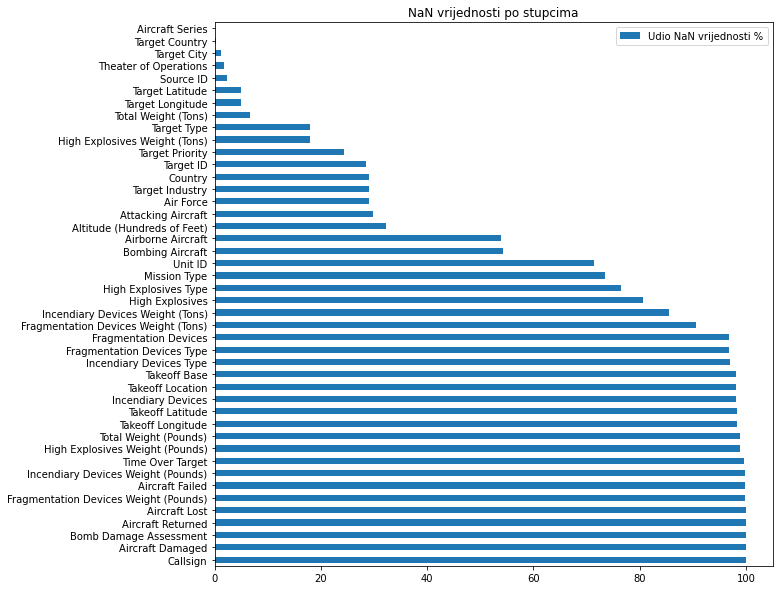

In [ ]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0: # if the dataset contains NaN values
        na_df = (df.isnull().sum() / len(df)) * 100  # percentage of NaN values
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Percentage of NaN values %': na_df})
        missing_data.plot(kind="barh") # show NaN values
        plot_width, plot_height = (10, 10)
        plt.title("NaN values per column")
        plt.rcParams['figure.figsize'] = (plot_width, plot_height)
        plt.show()
    else:
        print('No NaN values found!')
plot_nas(df)

As we suspected from the beginning, we can see that we have a large number of NaN values in the dataset, namely 59% of the values are NaN (4857110 out of 8200926). 44 out of 46 columns contain NaN values, and almost every row contains at least one NaN value. In the visualization, we can see that columns like "Callsing", "Aircraft Damaged", "Aircraft Lost" are almost entirely filled with NaN values, unlike columns "Aircraft Series" and "Target Country" which are fully populated with data. Once we become more familiar with the semantics of the data itself, we will decide what to do with it.

We have seen that the "Mission Date" column does not have any NaN values. Let's check if there are rows that have all NaN values except for the "Mission Date" and "Mission ID" columns.


In [ ]:
df_all_NaN = df.copy() #napravi kopiju
df_all_NaN.drop(['Mission Date', 'Mission ID'], axis=1, inplace=True) #izbaci stupce koji nemaju NaN vrijednosti
cols_to_check = df_all_NaN.columns #stupci za provjeru
df_all_NaN['is_na'] = df_all_NaN[cols_to_check].isnull().apply(lambda x: all(x), axis=1) # provjera
df_all_NaN['is_na'].sum()

0

Here we can see that there is no row where all values are NaN. This is important for us to know if there is a row that contains no information at all. If such a row existed, we could drop it.

#### 3.1.4.1. Values "UNIDENTIFIED" and "UNKNOWN"

In [ ]:
# find all rows that contain "UNIDENTIFIED" value
df[
    df.select_dtypes(object)
    .apply(lambda row: row.str.contains("UNIDENTIFIED"), axis=1)
    .any(axis=1)
]

Mission ID Mission Date Theater of Operations Country Air Force  \
5                6    8/15/1943                   PTO     USA      5 AF   
6                7    8/15/1943                   PTO     USA      5 AF   
10              11    8/15/1943                   CBI     USA     10 AF   
85              86    8/15/1943                   NaN     USA      8 AF   
86              87    8/15/1943                   NaN     USA      8 AF   
...            ...          ...                   ...     ...       ...   
178273      178735    2/16/1945                   CBI     USA     10 AF   
178274      178736    2/16/1945                   CBI     USA     10 AF   
178275      178737    2/16/1945                   CBI     USA     10 AF   
178277      178739    2/16/1945                   CBI     USA     10 AF   
178278      178740    2/16/1945                   CBI     USA     10 AF   

       Unit ID Aircraft Series Callsign Mission Type Takeoff Base  \
5       319 BS             B24      NaN            1          NaN   
6       400 BS             B24      NaN           12          NaN   
10      436 BS             B24      NaN            2          NaN   
85         NaN             B25      NaN          NaN          NaN   
86         NaN             B25      NaN          NaN          NaN   
...        ...             ...      ...          ...          ...   
178273   90 FS             P47      NaN           10          NaN   
178274   90 FS             P47      NaN           10          NaN   
178275   90 FS             P47      NaN           10          NaN   
178277   90 FS             P47      NaN           10          NaN   
178278   90 FS             P47      NaN           10          NaN   

       Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
5                   NaN              NaN                NaN       NaN   
6                   NaN              NaN                NaN       NaN   
10                  NaN              NaN                NaN       NaN   
85                  NaN              NaN                NaN     44333   
86                  NaN              NaN                NaN     44333   
...                 ...              ...                ...       ...   
178273              NaN              NaN                NaN       NaN   
178274              NaN              NaN                NaN       NaN   
178275              NaN              NaN                NaN       NaN   
178277              NaN              NaN                NaN       NaN   
178278              NaN              NaN                NaN       NaN   

                  Target Country   Target City          Target Type  \
5                     NEW GUINEA      KDMIATUM  UNIDENTIFIED TARGET   
6                     NEW GUINEA      SALAMAUA  UNIDENTIFIED TARGET   
10                         BURMA    PORT BLAIR  UNIDENTIFIED TARGET   
85      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
86      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
...                          ...           ...                  ...   
178273                     BURMA       MYITSON  UNIDENTIFIED TARGET   
178274                     BURMA       MYITSON  UNIDENTIFIED TARGET   
178275                     BURMA       MYITSON  UNIDENTIFIED TARGET   
178277                     BURMA       MYITSON  UNIDENTIFIED TARGET   
178278                     BURMA       MYITSON  UNIDENTIFIED TARGET   

             Target Industry Target Priority  Target Latitude  \
5                        NaN               1        -7.166667   
6                        NaN               1        -7.016667   
10                       NaN               1        11.683333   
85      UNIDENTIFIED TARGETS               1              NaN   
86      UNIDENTIFIED TARGETS               1              NaN   
...                      ...             ...              ...   
178273                   NaN               1        21.433333   
178274                   NaN

In [ ]:
# find all rows that contain "UNKNOWN" value
df[
    df.select_dtypes(object)
    .apply(lambda row: row.str.contains("UNKNOWN"), axis=1)
    .any(axis=1)
]

Mission ID Mission Date Theater of Operations Country Air Force  \
85              86    8/15/1943                   NaN     USA      8 AF   
86              87    8/15/1943                   NaN     USA      8 AF   
87              88    8/15/1943                   NaN     USA      8 AF   
88              89    8/15/1943                   NaN     USA      8 AF   
89              90    8/15/1943                   NaN     USA      8 AF   
...            ...          ...                   ...     ...       ...   
178078      178540    8/14/1943                   NaN     USA      8 AF   
178177      178639    7/28/1944                   NaN     USA      8 AF   
178178      178640    7/28/1944                   NaN     USA      8 AF   
178179      178641    7/28/1944                   NaN     USA      8 AF   
178180      178642    7/28/1944                   NaN     USA      8 AF   

       Unit ID Aircraft Series Callsign Mission Type Takeoff Base  \
85         NaN             B25      NaN          NaN          NaN   
86         NaN             B25      NaN          NaN          NaN   
87         NaN             B25      NaN          NaN          NaN   
88         NaN             B25      NaN          NaN          NaN   
89         NaN             A20      NaN          NaN          NaN   
...        ...             ...      ...          ...          ...   
178078     NaN             B25      NaN          NaN          NaN   
178177     NaN             A20      NaN          NaN          NaN   
178178     NaN             A20      NaN          NaN          NaN   
178179     NaN             A20      NaN          NaN          NaN   
178180     NaN             A20      NaN          NaN          NaN   

       Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
85                  NaN              NaN                NaN     44333   
86                  NaN              NaN                NaN     44333   
87                  NaN              NaN                NaN     44333   
88                  NaN              NaN                NaN     44333   
89                  NaN              NaN                NaN     44333   
...                 ...              ...                ...       ...   
178078              NaN              NaN                NaN     44333   
178177              NaN              NaN                NaN     44333   
178178              NaN              NaN                NaN     44333   
178179              NaN              NaN                NaN     44333   
178180              NaN              NaN                NaN     44333   

                  Target Country   Target City          Target Type  \
85      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
86      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
87      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
88      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
89      UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
...                          ...           ...                  ...   
178078  UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
178177  UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
178178  UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
178179  UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   
178180  UNKNOWN OR NOT INDICATED  UNIDENTIFIED  UNIDENTIFIED TARGET   

             Target Industry Target Priority  Target Latitude  \
85      UNIDENTIFIED TARGETS               1              NaN   
86      UNIDENTIFIED TARGETS               1              NaN   
87      UNIDENTIFIED TARGETS               1              NaN   
88      UNIDENTIFIED TARGETS               1              NaN   
89      UNIDENTIFIED TARGETS               1              NaN   
...                      ...             ...              ...   
178078  UNIDENTIFIED TARGETS               1              NaN   
178177  UNIDENTIFIED TARGETS

We can see that we have 28,616 fields containing "UNIDENTIFIED". Similarly, we have 4,078 fields containing "UNKNOWN". We will replace these values with NaN below.

#### 3.1.4.2. Can we recover values in some columns based on data from other columns?

In [ ]:
# area of ​​operations based on latitude and longitude

before_the = df["Theater of Operations"].isna().sum()
print(before_the)

df[(df['Theater of Operations'].isna()) &
   (df['Target Latitude'].notnull()) &
   (df['Target Longitude'].notnull())].head(n=3)


3158


Mission ID Mission Date Theater of Operations        Country Air Force  \
1005        1006    7/30/1944                   NaN  GREAT BRITAIN       RAF   
1140        1141    2/16/1945                   NaN  GREAT BRITAIN       RAF   
1774        1775    2/17/1945                   NaN  GREAT BRITAIN       RAF   

     Unit ID Aircraft Series Callsign Mission Type          Takeoff Base  \
1005  205 GP             LIB      NaN          NaN  "TORTORELLA, FOGGIA"   
1140  205 GP             LIB      NaN          NaN  "TORTORELLA, FOGGIA"   
1774  205 GP             LIB      NaN          NaN  "TORTORELLA, FOGGIA"   

     Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
1005            ITALY             4248             1355.0       NaN   
1140            ITALY             4248             1355.0       NaN   
1774            ITALY             4248             1355.0       NaN   

     Target Country                                        Target City  \
1005            NaN                                   MINING IN DANUBE   
1140            NaN  FIUME FITTING OUT BASIN INSTALLATIONS AND MERC...   
1774            NaN                   TRIESTE NAVAL DOCK INSTALLATIONS   

     Target Type Target Industry Target Priority  Target Latitude  \
1005         NaN             NaN               P            45.22   
1140         NaN             NaN               P            45.33   
1774         NaN             NaN               P            45.65   

      Target Longitude  Altitude (Hundreds of Feet)  Airborne Aircraft  \
1005             28.58                          NaN               52.0   
1140             14.43                          NaN               67.0   
1774             13.75                          NaN               66.0   

      Attacking Aircraft  Bombing Aircraft  Aircraft Returned  \
1005                52.0              52.0                NaN   
1140                67.0              67.0                NaN   
1774                66.0              66.0                NaN   

      Aircraft Failed  Aircraft Damaged  Aircraft Lost  High Explosives  \
1005              NaN               NaN            NaN            175.0   
1140              NaN               NaN            NaN              NaN   
1774              NaN               NaN            NaN              NaN   

     High Explosives Type High Explosives Weight (Pounds)  \
1005        1000 LB MINES                             NaN   
1140                  NaN                             NaN   
1774                  NaN                             NaN   

      High Explosives Weight (Tons)  Incendiary Devices  \
1005                           87.5                 NaN   
1140                            NaN                 NaN   
1774                            NaN                 NaN   

     Incendiary Devices Type  Incendiary Devices Weight (Pounds)  \
1005                     NaN                                 NaN   
1140                     NaN                                 NaN   
1774                     NaN                                 NaN   

      Incendiary Devices Weight (Tons)  Fragmentation Devices  \
1005                               0.0                    NaN   
1140                               0.0                    NaN   
1774                               0.0                    NaN   

     Fragmentation Devices Type  Fragmentation Devices Weight (Pounds)  \
1005                        NaN                                    NaN   
1140                        NaN                                    NaN   
1774                        NaN                                    NaN   

      Fragmentation Devices Weight (Tons)  Total Weight (Pounds)  \
1005                                  0.0                    NaN   
1140                                  0.0                    NaN   
1774                                  0.0                    NaN   

      Total Weight (Tons) Time Over Target Bomb Damage Assessment  Source ID

In [ ]:
# the country being attacked based on latitude and longitude

before_tcoun = df["Target Country"].isna().sum()
print(before_tcoun)

df[(df["Target Country"].isna()) &
    ((df["Target Latitude"].notnull()) &
     (df["Target Longitude"].notnull()))].head(n=3)

599


Mission ID Mission Date Theater of Operations        Country Air Force  \
1005        1006    7/30/1944                   NaN  GREAT BRITAIN       RAF   
1025        1026    7/30/1944                   PTO            USA      7 AF   
1026        1027    7/30/1944                   PTO            USA      7 AF   

     Unit ID Aircraft Series Callsign Mission Type          Takeoff Base  \
1005  205 GP             LIB      NaN          NaN  "TORTORELLA, FOGGIA"   
1025  820 BS             B25      NaN            1                   NaN   
1026  820 BS             B25      NaN            1                   NaN   

     Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
1005            ITALY             4248             1355.0       NaN   
1025              NaN              NaN                NaN       NaN   
1026              NaN              NaN                NaN       NaN   

     Target Country       Target City    Target Type Target Industry  \
1005            NaN  MINING IN DANUBE            NaN             NaN   
1025            NaN      JOKAJ ISLAND  GUN POSITIONS             NaN   
1026            NaN      JOKAJ ISLAND  GUN POSITIONS             NaN   

     Target Priority  Target Latitude  Target Longitude  \
1005               P        45.220000         28.580000   
1025               1         6.966667        158.183333   
1026               1         6.966667        158.183333   

      Altitude (Hundreds of Feet)  Airborne Aircraft  Attacking Aircraft  \
1005                          NaN               52.0                52.0   
1025                         27.0                NaN                 3.0   
1026                         23.0                NaN                 3.0   

      Bombing Aircraft  Aircraft Returned  Aircraft Failed  Aircraft Damaged  \
1005              52.0                NaN              NaN               NaN   
1025               NaN                NaN              NaN               NaN   
1026               NaN                NaN              NaN               NaN   

      Aircraft Lost  High Explosives    High Explosives Type  \
1005            NaN            175.0           1000 LB MINES   
1025            NaN             12.0  500 LB GP (GP-M43/M64)   
1026            NaN             12.0  500 LB GP (GP-M43/M64)   

     High Explosives Weight (Pounds)  High Explosives Weight (Tons)  \
1005                             NaN                           87.5   
1025                             NaN                            3.0   
1026                             NaN                            3.0   

      Incendiary Devices Incendiary Devices Type  \
1005                 NaN                     NaN   
1025                 NaN                     NaN   
1026                 NaN                     NaN   

      Incendiary Devices Weight (Pounds)  Incendiary Devices Weight (Tons)  \
1005                                 NaN                               0.0   
1025                                 NaN                               NaN   
1026                                 NaN                               NaN   

      Fragmentation Devices Fragmentation Devices Type  \
1005                    NaN                        NaN   
1025                    NaN                        NaN   
1026                    NaN                        NaN   

      Fragmentation Devices Weight (Pounds)  \
1005                                    NaN   
1025                                    NaN   
1026                                    NaN   

      Fragmentation Devices Weight (Tons)  Total Weight (Pounds)  \
1005                                  0.0                    NaN   
1025                                  NaN                    NaN   
1026                                  NaN                    NaN   

      Total Weight (Tons) Time Over Target Bomb Damage Assessment  Source ID  
1005                 87.5              NaN                    NaN   698853.0  
1025                  3.0 

### 3.1.5. Duplicates in data

In [ ]:
# display data (rows) that match in all columns
df[df.duplicated()]

Empty DataFrame
Columns: [Mission ID, Mission Date, Theater of Operations, Country, Air Force, Unit ID, Aircraft Series, Callsign, Mission Type, Takeoff Base, Takeoff Location, Takeoff Latitude, Takeoff Longitude, Target ID, Target Country, Target City, Target Type, Target Industry, Target Priority, Target Latitude, Target Longitude, Altitude (Hundreds of Feet), Airborne Aircraft, Attacking Aircraft, Bombing Aircraft, Aircraft Returned, Aircraft Failed, Aircraft Damaged, Aircraft Lost, High Explosives, High Explosives Type, High Explosives Weight (Pounds), High Explosives Weight (Tons), Incendiary Devices, Incendiary Devices Type, Incendiary Devices Weight (Pounds), Incendiary Devices Weight (Tons), Fragmentation Devices, Fragmentation Devices Type, Fragmentation Devices Weight (Pounds), Fragmentation Devices Weight (Tons), Total Weight (Pounds), Total Weight (Tons), Time Over Target, Bomb Damage Assessment, Source ID]
Index: []

In [ ]:
print(f'The number of duplicates in the data set considering all columns is {df.duplicated().sum()} of {df.shape[0]}')

Broj duplikata u skupu podataka s ozbirom na sve stupce je 0 od 178281


In [ ]:
# display data that matches the value in the "Mission ID" column
df[df.duplicated('Mission ID', keep='first')]

Empty DataFrame
Columns: [Mission ID, Mission Date, Theater of Operations, Country, Air Force, Unit ID, Aircraft Series, Callsign, Mission Type, Takeoff Base, Takeoff Location, Takeoff Latitude, Takeoff Longitude, Target ID, Target Country, Target City, Target Type, Target Industry, Target Priority, Target Latitude, Target Longitude, Altitude (Hundreds of Feet), Airborne Aircraft, Attacking Aircraft, Bombing Aircraft, Aircraft Returned, Aircraft Failed, Aircraft Damaged, Aircraft Lost, High Explosives, High Explosives Type, High Explosives Weight (Pounds), High Explosives Weight (Tons), Incendiary Devices, Incendiary Devices Type, Incendiary Devices Weight (Pounds), Incendiary Devices Weight (Tons), Fragmentation Devices, Fragmentation Devices Type, Fragmentation Devices Weight (Pounds), Fragmentation Devices Weight (Tons), Total Weight (Pounds), Total Weight (Tons), Time Over Target, Bomb Damage Assessment, Source ID]
Index: []

In [ ]:
duplicated_data=df.drop(['Mission ID', 'Source ID'], axis=1) # remove columns "Mission ID" and "Source ID"
is_duplicated_data=duplicated_data.value_counts(dropna=False).reset_index(name='Count') # count unique
print(is_duplicated_data.shape[0])
is_duplicated_data.head()

134065


Mission Date Theater of Operations Country Air Force Unit ID  \
0    4/13/1945                   ETO     USA     12 AF     NaN   
1   11/21/1944                   ETO     NaN       NaN     NaN   
2   11/21/1944                   ETO     NaN       NaN     NaN   
3   12/24/1944                   ETO     NaN       NaN     NaN   
4   12/24/1944                   ETO     NaN       NaN     NaN   

  Aircraft Series Callsign Mission Type Takeoff Base Takeoff Location  \
0             A26      NaN          NaN          NaN              NaN   
1            GB17      NaN          NaN          NaN              NaN   
2             B17      NaN          NaN          NaN              NaN   
3             B17      NaN          NaN          NaN              NaN   
4            GB17      NaN          NaN          NaN              NaN   

  Takeoff Latitude  Takeoff Longitude Target ID Target Country  \
0              NaN                NaN     90248         FRANCE   
1              NaN                NaN     44333        GERMANY   
2              NaN                NaN     44333        GERMANY   
3              NaN                NaN     44333        GERMANY   
4              NaN                NaN     44333        GERMANY   

        Target City          Target Type  \
0  44 40 N 006 20 E             RAILROAD   
1      UNIDENTIFIED  UNIDENTIFIED TARGET   
2      UNIDENTIFIED  UNIDENTIFIED TARGET   
3      UNIDENTIFIED  UNIDENTIFIED TARGET   
4      UNIDENTIFIED  UNIDENTIFIED TARGET   

                                     Target Industry Target Priority  \
0  "RR INSTALLATIONS,  TRACKS,  MARSHALLING YARDS...               1   
1                               UNIDENTIFIED TARGETS               3   
2                               UNIDENTIFIED TARGETS               3   
3                               UNIDENTIFIED TARGETS               3   
4                               UNIDENTIFIED TARGETS               3   

   Target Latitude  Target Longitude  Altitude (Hundreds of Feet)  \
0            44.67              6.33                        120.0   
1              NaN               NaN                          NaN   
2              NaN               NaN                          NaN   
3              NaN               NaN                          NaN   
4              NaN               NaN                          NaN   

   Airborne Aircraft  Attacking Aircraft  Bombing Aircraft  Aircraft Returned  \
0                1.0                 1.0               1.0                NaN   
1                1.0                 1.0               1.0                NaN   
2                1.0                 1.0               1.0                NaN   
3                1.0                 1.0               1.0                NaN   
4                1.0                 1.0               1.0                NaN   

   Aircraft Failed  Aircraft Damaged  Aircraft Lost  High Explosives  \
0              NaN               NaN            NaN              NaN   
1              NaN               NaN            NaN              NaN   
2              NaN               NaN            NaN              NaN   
3              NaN               NaN            NaN              NaN   
4              NaN               NaN            NaN              NaN   

  High Explosives Type High Explosives Weight (Pounds)  \
0                  NaN                             NaN   
1                  NaN                             NaN   
2                  NaN                             NaN   
3                  NaN                             NaN   
4                  NaN                             NaN   

   High Explosives Weight (Tons)  Incendiary Devices Incendiary Devices Type  \
0                            1.0                 NaN                     NaN   
1                            3.0                 NaN                     NaN   
2                            3.0                 NaN                     NaN   
3                            2.0                 NaN               

In [ ]:
is_duplicated_data[is_duplicated_data.Count > 1].shape[0] #number of data that have duplicates

33688

In [ ]:
print(f'The total number of duplicates, excluding "Mission ID" and "Source ID", is {duplicated_data.duplicated().sum()}, which constitutes {round(duplicated_data.duplicated().sum()/duplicated_data.shape[0],2)*100}%.')

Broj svih duplkata, kada izbacimo "Mission ID" i "Source ID" je 44216, što čini 25.0%.


In [ ]:
# count how many occurrences of which number of duplicates there are
# pd.crosstab(index=is_duplicated_data['Count'], columns='count')
# or
duplicated_count = is_duplicated_data['Count'].value_counts().reset_index().rename(columns={'index': "NoDouplicates"}).sort_values(by="NoDouplicates")
duplicated_count['Percentage'] = (duplicated_count['Count']/duplicated_count['Count'].sum())*100
duplicated_count

NoDouplicates   Count  Percentage
0               1  100377   74.871891
1               2   26178   19.526349
2               3    5992    4.469474
3               4    1039    0.774997
5               5      44    0.032820
4               6     288    0.214821
10              7      13    0.009697
7               8      38    0.028344
6               9      43    0.032074
9              10      17    0.012680
8              12      20    0.014918
12             14       3    0.002238
15             15       1    0.000746
11             16       5    0.003730
16             17       1    0.000746
17             18       1    0.000746
14             20       2    0.001492
13             21       2    0.001492
18             22       1    0.000746

In [ ]:
# plotly - interactive - we can approximate certain values
fig = px.bar(duplicated_count, x='NoDuplicates', y='Percentage', title="Relative frequencies of duplicates",
            labels={'NoDuplicates': 'Number of duplicates', 'Percentage': 'Relative frequency (%)'})
fig.show()

Since these data were collected from historical records, we expected that some entries might have been mistakenly entered twice, or there could have been two records for the same event. At first glance, it appears that there are no duplicates in the data. However, when we exclude the unique identifiers "Mission ID" and the source IDs from which the data were collected ("Source ID"), we notice that this number is quite high (25%). This suggests that multiple records contained information about the same mission (in some cases, up to 20 records contained information about the same mission). As we proceed to exploratory data analysis, in some cases, we will need a dataset with this information, while in others, we will proceed without duplicates, taking this into account as needed.

## 3.2. Sređivanje skupa podataka

### 3.2.1. Column Cleanup

So far, we've noticed that all column names contain spaces. Spaces in column names can be restrictive during work. For this reason, we will change the column names. At the same time, we will drop the "Mission ID" column as it is unnecessary.

In [ ]:
# removing unnecessary spaces
for column in df.columns:
  new_name= column.replace(" ", "")
  df.rename(columns={column : new_name}, inplace=True)

df.columns

Index(['MissionID', 'MissionDate', 'TheaterofOperations', 'Country',
       'AirForce', 'UnitID', 'AircraftSeries', 'Callsign', 'MissionType',
       'TakeoffBase', 'TakeoffLocation', 'TakeoffLatitude', 'TakeoffLongitude',
       'TargetID', 'TargetCountry', 'TargetCity', 'TargetType',
       'TargetIndustry', 'TargetPriority', 'TargetLatitude', 'TargetLongitude',
       'Altitude(HundredsofFeet)', 'AirborneAircraft', 'AttackingAircraft',
       'BombingAircraft', 'AircraftReturned', 'AircraftFailed',
       'AircraftDamaged', 'AircraftLost', 'HighExplosives',
       'HighExplosivesType', 'HighExplosivesWeight(Pounds)',
       'HighExplosivesWeight(Tons)', 'IncendiaryDevices',
       'IncendiaryDevicesType', 'IncendiaryDevicesWeight(Pounds)',
       'IncendiaryDevicesWeight(Tons)', 'FragmentationDevices',
       'FragmentationDevicesType', 'FragmentationDevicesWeight(Pounds)',
       'FragmentationDevicesWeight(Tons)', 'TotalWeight(Pounds)',
       'TotalWeight(Tons)', 'TimeOverTarget'

In [ ]:
# remove columns MissionID and TargetID
df.drop(columns=['MissionID', "TargetID"], axis=0, inplace=True)
df.columns

Index(['MissionDate', 'TheaterofOperations', 'Country', 'AirForce', 'UnitID',
       'AircraftSeries', 'Callsign', 'MissionType', 'TakeoffBase',
       'TakeoffLocation', 'TakeoffLatitude', 'TakeoffLongitude',
       'TargetCountry', 'TargetCity', 'TargetType', 'TargetIndustry',
       'TargetPriority', 'TargetLatitude', 'TargetLongitude',
       'Altitude(HundredsofFeet)', 'AirborneAircraft', 'AttackingAircraft',
       'BombingAircraft', 'AircraftReturned', 'AircraftFailed',
       'AircraftDamaged', 'AircraftLost', 'HighExplosives',
       'HighExplosivesType', 'HighExplosivesWeight(Pounds)',
       'HighExplosivesWeight(Tons)', 'IncendiaryDevices',
       'IncendiaryDevicesType', 'IncendiaryDevicesWeight(Pounds)',
       'IncendiaryDevicesWeight(Tons)', 'FragmentationDevices',
       'FragmentationDevicesType', 'FragmentationDevicesWeight(Pounds)',
       'FragmentationDevicesWeight(Tons)', 'TotalWeight(Pounds)',
       'TotalWeight(Tons)', 'TimeOverTarget', 'BombDamageAssessment',

### 3.2.2. Value Cleanup

We have already seen that in some columns, we have, for example, two names for the same country or one coordinate duplicated in multiple columns, or coordinates that are incorrectly entered (incorrect decimal point position). This is unnecessary, so we will remove it.

In [ ]:
# Moving the decimal point
def decimal_point_change(row):
    # if the value is greater than 180 degrees
    if pd.isnull(row):
        return row
    elif all(x.isalpha() or x.isspace() for x in str(row)):
        return row
    elif float(row) > 180:
        # divide the old value by 100 and store it in the new one
        new_value = float(row) / 100
        # return the new value
        return new_value
    # otherwise return the old value
    else:
        return row

# Apply to geographic longitude
df.TakeoffLongitude = df.TakeoffLongitude.apply(decimal_point_change)
# Apply to geographic latitude
df.TakeoffLatitude = df.TakeoffLatitude.apply(decimal_point_change)

In [ ]:
# Shorten names in countries containing " OR "
df.TargetCountry = df.TargetCountry.replace({'HOLLAND OR NETHERLANDS': 'NETHERLANDS', 'KOREA OR CHOSEN': 'KOREA', 'THAILAND OR SIAM': 'THAILAND' }, regex=True)
df[df["TargetCountry"].astype(str).str.contains(" OR ")]["TargetCountry"].unique()

array(['UNKNOWN OR NOT INDICATED'], dtype=object)

There aren't many of these values, so we were able to replace them manually.

In [ ]:
# Add "MINING" to "Target Industry" if it appears in the country name
def find_industry(row):
    # If "MINING" is in the country name
    if "MINING" in str(row["TargetCountry"]):
        # Set industry to "MINING"
        industry = "MINING"
        # Return the industry value
        return industry
    # If not, return the original value
    else:
        return row['TargetIndustry']

# Apply the find_industry function to the "Target Industry" column
df['TargetIndustry'] = df.apply(find_industry, axis=1)

In [ ]:
# Shorten country names that contain the word " MINING"
df.TargetCountry = df.TargetCountry.replace({' MINING': ''}, regex=True)

In [ ]:
# Check if the number of numbers is greater than the number of letters in the string
def analyze(s):
    numbers = sum(c.isdigit() for c in s)
    letters = sum(c.isalpha() for c in s)
    return numbers > letters

In [ ]:
# Remove coordinates from city names
def find_city_with_coordinates(row):
    # If there is at least one number in the city name
    # and if that number is greater than the number of letters
    # and if the name contains "North" or "South"
    if (any(el.isdigit() for el in str(row.TargetCity).split(" ")) and
        analyze(row.TargetCity) and
        (" N " in str(row.TargetCity) or " S " in str(row.TargetCity))):
        # Return NaN
        return np.nan
    # Otherwise, return the original value
    else:
        return row.TargetCity

df["TargetCity"] = df.apply(find_city_with_coordinates, axis=1)

### 3.2.3. Handling NaN Values

#### 3.2.3.1 Columns "(Tons)" and "(Pounds)"

In [ ]:
def find_tons(row):
    if row['IncendiaryDevicesWeight(Tons)'] is np.nan and row['IncendiaryDevicesWeight(Pounds)'] is not np.nan:
      tons=row['IncendiaryDevicesWeight(Pounds)']/2000
      return tons
    else:
        return row['IncendiaryDevicesWeight(Tons)']

# apply
df['IncendiaryDevicesWeight']=df.apply(find_tons, axis=1)
df.head()

MissionDate TheaterofOperations Country AirForce         UnitID  \
0   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
1   8/15/1943                 PTO     USA     5 AF         400 BS   
2   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
3   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
4   8/15/1943                 PTO     USA     5 AF         321 BS   

  AircraftSeries Callsign MissionType           TakeoffBase TakeoffLocation  \
0            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
1            B24      NaN           1                   NaN             NaN   
2            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
3            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
4            B24      NaN           1                   NaN             NaN   

  TakeoffLatitude  TakeoffLongitude TargetCountry   TargetCity TargetType  \
0       37.131022         14.321464         ITALY    SPADAFORA        NaN   
1             NaN               NaN    NEW GUINEA     KOMIATUM      RIDGE   
2       37.131022         14.321464         ITALY      COSENZA        NaN   
3       37.131022         14.321464         ITALY  GIOJA TAURO        NaN   
4             NaN               NaN       SUMATRA         KILA    VILLAGE   

  TargetIndustry TargetPriority  TargetLatitude  TargetLongitude  \
0            NaN            NaN       38.220000        15.370000   
1            NaN              1       -7.166667       147.000000   
2            NaN            NaN       39.270000        16.250000   
3            NaN            NaN       38.430000        15.900000   
4            NaN              1       -1.116667       103.883333   

   Altitude(HundredsofFeet)  AirborneAircraft  AttackingAircraft  \
0                       NaN              20.0                NaN   
1                      44.0               NaN                6.0   
2                       NaN              18.0                NaN   
3                       NaN              15.0                NaN   
4                      60.0               NaN                6.0   

   BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
0             20.0               NaN             NaN              NaN   
1              NaN               NaN             NaN              NaN   
2             36.0               NaN             NaN              NaN   
3             15.0               NaN             1.0              NaN   
4              NaN               NaN             NaN              NaN   

   AircraftLost  HighExplosives       HighExplosivesType  \
0           NaN            40.0   500 LB GP (GP-M43/M64)   
1           NaN            40.0  1000 LB GP (GP-M44/M65)   
2           NaN            36.0   500 LB GP (GP-M43/M64)   
3           NaN            30.0   500 LB GP (GP-M43/M64)   
4           NaN            16.0  1000 LB GP (GP-M44/M65)   

  HighExplosivesWeight(Pounds)  HighExplosivesWeight(Tons)  IncendiaryDevices  \
0                          NaN                        10.0                NaN   
1                          NaN                        20.0                NaN   
2                          NaN                         9.0                NaN   
3                          NaN                         7.5                NaN   
4                          NaN                         8.0                NaN   

  IncendiaryDevicesType  IncendiaryDevicesWeight(Pounds)  \
0                   NaN                              NaN   
1                   NaN                              NaN   
2                   NaN                              NaN   
3                   NaN                              NaN   
4                   NaN                              NaN   

   IncendiaryDevicesWeight(Tons)  FragmentationDevices  \
0                            NaN                   NaN   
1                            NaN                   NaN   
2        

In [ ]:
df.drop(['IncendiaryDevicesWeight(Tons)', 'IncendiaryDevicesWeight(Pounds)'], axis=1, inplace=True)
df['IncendiaryDevicesWeight'].isna().sum()

152549

In [ ]:
def find_tons(row):
    if row['FragmentationDevicesWeight(Tons)'] is np.nan and row['FragmentationDevicesWeight(Pounds)'] is not np.nan:
      tons=row['FragmentationDevicesWeight(Pounds)']/2000
      return tons
    else:
        return row['FragmentationDevicesWeight(Tons)']

# apply
df['FragmentationDevicesWeight']=df.apply(find_tons, axis=1)
df.head()

MissionDate TheaterofOperations Country AirForce         UnitID  \
0   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
1   8/15/1943                 PTO     USA     5 AF         400 BS   
2   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
3   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
4   8/15/1943                 PTO     USA     5 AF         321 BS   

  AircraftSeries Callsign MissionType           TakeoffBase TakeoffLocation  \
0            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
1            B24      NaN           1                   NaN             NaN   
2            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
3            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
4            B24      NaN           1                   NaN             NaN   

  TakeoffLatitude  TakeoffLongitude TargetCountry   TargetCity TargetType  \
0       37.131022         14.321464         ITALY    SPADAFORA        NaN   
1             NaN               NaN    NEW GUINEA     KOMIATUM      RIDGE   
2       37.131022         14.321464         ITALY      COSENZA        NaN   
3       37.131022         14.321464         ITALY  GIOJA TAURO        NaN   
4             NaN               NaN       SUMATRA         KILA    VILLAGE   

  TargetIndustry TargetPriority  TargetLatitude  TargetLongitude  \
0            NaN            NaN       38.220000        15.370000   
1            NaN              1       -7.166667       147.000000   
2            NaN            NaN       39.270000        16.250000   
3            NaN            NaN       38.430000        15.900000   
4            NaN              1       -1.116667       103.883333   

   Altitude(HundredsofFeet)  AirborneAircraft  AttackingAircraft  \
0                       NaN              20.0                NaN   
1                      44.0               NaN                6.0   
2                       NaN              18.0                NaN   
3                       NaN              15.0                NaN   
4                      60.0               NaN                6.0   

   BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
0             20.0               NaN             NaN              NaN   
1              NaN               NaN             NaN              NaN   
2             36.0               NaN             NaN              NaN   
3             15.0               NaN             1.0              NaN   
4              NaN               NaN             NaN              NaN   

   AircraftLost  HighExplosives       HighExplosivesType  \
0           NaN            40.0   500 LB GP (GP-M43/M64)   
1           NaN            40.0  1000 LB GP (GP-M44/M65)   
2           NaN            36.0   500 LB GP (GP-M43/M64)   
3           NaN            30.0   500 LB GP (GP-M43/M64)   
4           NaN            16.0  1000 LB GP (GP-M44/M65)   

  HighExplosivesWeight(Pounds)  HighExplosivesWeight(Tons)  IncendiaryDevices  \
0                          NaN                        10.0                NaN   
1                          NaN                        20.0                NaN   
2                          NaN                         9.0                NaN   
3                          NaN                         7.5                NaN   
4                          NaN                         8.0                NaN   

  IncendiaryDevicesType  FragmentationDevices FragmentationDevicesType  \
0                   NaN                   NaN                      NaN   
1                   NaN                   NaN                      NaN   
2                   NaN                   NaN                      NaN   
3                   NaN                   NaN                      NaN   
4                   NaN                   NaN                      NaN   

   FragmentationDevicesWeight(Pounds)  FragmentationDevicesWeight(Tons)  \
0                       

In [ ]:
df.drop(['FragmentationDevicesWeight(Tons)', 'FragmentationDevicesWeight(Pounds)'], axis=1, inplace=True)
df['FragmentationDevicesWeight'].isna().sum()

161379

In [ ]:
def find_tons(row):
    if row['TotalWeight(Tons)'] is np.nan and row['TotalWeight(Pounds)'] is not np.nan:
      tons=row['TotalWeight(Pounds)']/2000
      return tons
    else:
        return row['TotalWeight(Tons)']

# apply
df['TotalWeight']=df.apply(find_tons, axis=1)
df.head()

MissionDate TheaterofOperations Country AirForce         UnitID  \
0   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
1   8/15/1943                 PTO     USA     5 AF         400 BS   
2   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
3   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
4   8/15/1943                 PTO     USA     5 AF         321 BS   

  AircraftSeries Callsign MissionType           TakeoffBase TakeoffLocation  \
0            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
1            B24      NaN           1                   NaN             NaN   
2            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
3            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
4            B24      NaN           1                   NaN             NaN   

  TakeoffLatitude  TakeoffLongitude TargetCountry   TargetCity TargetType  \
0       37.131022         14.321464         ITALY    SPADAFORA        NaN   
1             NaN               NaN    NEW GUINEA     KOMIATUM      RIDGE   
2       37.131022         14.321464         ITALY      COSENZA        NaN   
3       37.131022         14.321464         ITALY  GIOJA TAURO        NaN   
4             NaN               NaN       SUMATRA         KILA    VILLAGE   

  TargetIndustry TargetPriority  TargetLatitude  TargetLongitude  \
0            NaN            NaN       38.220000        15.370000   
1            NaN              1       -7.166667       147.000000   
2            NaN            NaN       39.270000        16.250000   
3            NaN            NaN       38.430000        15.900000   
4            NaN              1       -1.116667       103.883333   

   Altitude(HundredsofFeet)  AirborneAircraft  AttackingAircraft  \
0                       NaN              20.0                NaN   
1                      44.0               NaN                6.0   
2                       NaN              18.0                NaN   
3                       NaN              15.0                NaN   
4                      60.0               NaN                6.0   

   BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
0             20.0               NaN             NaN              NaN   
1              NaN               NaN             NaN              NaN   
2             36.0               NaN             NaN              NaN   
3             15.0               NaN             1.0              NaN   
4              NaN               NaN             NaN              NaN   

   AircraftLost  HighExplosives       HighExplosivesType  \
0           NaN            40.0   500 LB GP (GP-M43/M64)   
1           NaN            40.0  1000 LB GP (GP-M44/M65)   
2           NaN            36.0   500 LB GP (GP-M43/M64)   
3           NaN            30.0   500 LB GP (GP-M43/M64)   
4           NaN            16.0  1000 LB GP (GP-M44/M65)   

  HighExplosivesWeight(Pounds)  HighExplosivesWeight(Tons)  IncendiaryDevices  \
0                          NaN                        10.0                NaN   
1                          NaN                        20.0                NaN   
2                          NaN                         9.0                NaN   
3                          NaN                         7.5                NaN   
4                          NaN                         8.0                NaN   

  IncendiaryDevicesType  FragmentationDevices FragmentationDevicesType  \
0                   NaN                   NaN                      NaN   
1                   NaN                   NaN                      NaN   
2                   NaN                   NaN                      NaN   
3                   NaN                   NaN                      NaN   
4                   NaN                   NaN                      NaN   

   TotalWeight(Pounds)  TotalWeight(Tons) TimeOverTarget BombDamageAssessment  \
0                 

In [ ]:
df.drop(['TotalWeight(Tons)', 'TotalWeight(Pounds)'], axis=1, inplace=True)
df['TotalWeight'].isna().sum()

11773

In [ ]:
#HighExplosivesWeight
def find_tons(row):
    if row['HighExplosivesWeight(Tons)'] is np.nan and row['HighExplosivesWeight(Pounds)'] is not np.nan:
      tons = row['HighExplosivesWeight(Pounds)'][:row['HighExplosivesWeight(Pounds)'].index('LB')-1].to_numeric()/2000
      return tons
    elif row['HighExplosivesWeight(Tons)'] is not np.nan and row['HighExplosivesWeight(Pounds)'] is not np.nan and row['HighExplosivesWeight(Tons)']*2000!=row['HighExplosivesWeight(Pounds)']:
      if 'LB' in row['HighExplosivesWeight(Pounds)']:
        return row['HighExplosivesWeight(Tons)']
      else:
        tons = float(row['HighExplosivesWeight(Pounds)'])/2000
        return tons
    else:
        return row['HighExplosivesWeight(Tons)']

# apply
df['HighExplosivesWeight']=df.apply(find_tons, axis=1)
df.head()

MissionDate TheaterofOperations Country AirForce         UnitID  \
0   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
1   8/15/1943                 PTO     USA     5 AF         400 BS   
2   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
3   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
4   8/15/1943                 PTO     USA     5 AF         321 BS   

  AircraftSeries Callsign MissionType           TakeoffBase TakeoffLocation  \
0            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
1            B24      NaN           1                   NaN             NaN   
2            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
3            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
4            B24      NaN           1                   NaN             NaN   

  TakeoffLatitude  TakeoffLongitude TargetCountry   TargetCity TargetType  \
0       37.131022         14.321464         ITALY    SPADAFORA        NaN   
1             NaN               NaN    NEW GUINEA     KOMIATUM      RIDGE   
2       37.131022         14.321464         ITALY      COSENZA        NaN   
3       37.131022         14.321464         ITALY  GIOJA TAURO        NaN   
4             NaN               NaN       SUMATRA         KILA    VILLAGE   

  TargetIndustry TargetPriority  TargetLatitude  TargetLongitude  \
0            NaN            NaN       38.220000        15.370000   
1            NaN              1       -7.166667       147.000000   
2            NaN            NaN       39.270000        16.250000   
3            NaN            NaN       38.430000        15.900000   
4            NaN              1       -1.116667       103.883333   

   Altitude(HundredsofFeet)  AirborneAircraft  AttackingAircraft  \
0                       NaN              20.0                NaN   
1                      44.0               NaN                6.0   
2                       NaN              18.0                NaN   
3                       NaN              15.0                NaN   
4                      60.0               NaN                6.0   

   BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
0             20.0               NaN             NaN              NaN   
1              NaN               NaN             NaN              NaN   
2             36.0               NaN             NaN              NaN   
3             15.0               NaN             1.0              NaN   
4              NaN               NaN             NaN              NaN   

   AircraftLost  HighExplosives       HighExplosivesType  \
0           NaN            40.0   500 LB GP (GP-M43/M64)   
1           NaN            40.0  1000 LB GP (GP-M44/M65)   
2           NaN            36.0   500 LB GP (GP-M43/M64)   
3           NaN            30.0   500 LB GP (GP-M43/M64)   
4           NaN            16.0  1000 LB GP (GP-M44/M65)   

  HighExplosivesWeight(Pounds)  HighExplosivesWeight(Tons)  IncendiaryDevices  \
0                          NaN                        10.0                NaN   
1                          NaN                        20.0                NaN   
2                          NaN                         9.0                NaN   
3                          NaN                         7.5                NaN   
4                          NaN                         8.0                NaN   

  IncendiaryDevicesType  FragmentationDevices FragmentationDevicesType  \
0                   NaN                   NaN                      NaN   
1                   NaN                   NaN                      NaN   
2                   NaN                   NaN                      NaN   
3                   NaN                   NaN                      NaN   
4                   NaN                   NaN                      NaN   

  TimeOverTarget BombDamageAssessment  SourceID  IncendiaryDevicesWeight  \
0            NaN       

In [ ]:
df.drop(['HighExplosivesWeight(Tons)', 'HighExplosivesWeight(Pounds)'], axis=1, inplace=True)
df['HighExplosivesWeight'].isna().sum()

31836

In [ ]:
# column order
df=df[['MissionDate', 'TheaterofOperations', 'Country', 'AirForce', 'UnitID',
       'AircraftSeries', 'Callsign', 'MissionType', 'TakeoffBase',
       'TakeoffLocation', 'TakeoffLatitude', 'TakeoffLongitude',
       'TargetCountry', 'TargetCity', 'TargetType', 'TargetIndustry',
       'TargetPriority', 'TargetLatitude', 'TargetLongitude',
       'Altitude(HundredsofFeet)', 'AirborneAircraft', 'AttackingAircraft',
       'BombingAircraft', 'AircraftReturned', 'AircraftFailed',
       'AircraftDamaged', 'AircraftLost', 'HighExplosives',
       'HighExplosivesType', 'HighExplosivesWeight',
       'IncendiaryDevices', 'IncendiaryDevicesType', 'IncendiaryDevicesWeight',
       'FragmentationDevices', 'FragmentationDevicesType', 'FragmentationDevicesWeight', 'TotalWeight', 'TimeOverTarget',
       'BombDamageAssessment', 'SourceID'
       ]]

In this section, we consolidated data that were recorded in two measurement systems into a single column. This reduced the number of columns we needed to handle, made it easier to conduct analyses, and decreased the number of NaN values (although not significantly).

#### 3.2.3.2. Dropping "UNIDENTIFIED" and "UNKNOWN" values

In [ ]:
before = df.isnull().sum() # How many NaN values each column contains at the beginning

In [ ]:
for col in df.columns:
  # Find all fields in the column containing "UNIDENTIFIED" and replace them with NaN
  df.loc[df[col].astype(str).str.contains('UNIDENTIFIED'), col] = np.nan
  # Find all fields in the column containing "UNKNOWN" and replace them with NaN
  df.loc[df[col].astype(str).str.contains('UNKNOWN'), col] = np.nan

In [ ]:
num_of_unid = 0
num_of_unk = 0
for col in df.columns:
  # Find all fields in the column containing "UNIDENTIFIED"
  num_of_unid += df[col].astype(str).str.contains('UNIDENTIFIED').sum()
  # Find all fields in the column containing "UNKNOWN"
  num_of_unk += df[col].astype(str).str.contains('UNKNOWN').sum()

print(f'Number of fields containing "UNIDENTIFIED": {num_of_unid}')
print(f'Number of fields containing "UNKNOWN": {num_of_unk}')

Broj polja koje sadrže "UNIDENTIFIED": 0
Broj polja koje sadrže "UNKNOWN": 0


We can see that we have successfully removed all values that were "UNIDENTIFIED" and "UNKNOWN" or contained those values.

As the number of NaN values has almost certainly increased, we will check how many NaN values we have now.

In [ ]:
# number of NaN values ​​per column
after=df.isnull().sum()
after

MissionDate                        0
TheaterofOperations             3158
Country                        51787
AirForce                       51837
UnitID                        127368
AircraftSeries                   116
Callsign                      178260
MissionType                   131095
TakeoffBase                   174898
TakeoffLocation               174943
TakeoffLatitude               175300
TakeoffLongitude              175301
TargetCountry                   3360
TargetCity                     15619
TargetType                     54722
TargetIndustry                 67111
TargetPriority                 43561
TargetLatitude                  8716
TargetLongitude                 8738
Altitude(HundredsofFeet)       57455
AirborneAircraft               96039
AttackingAircraft              53173
BombingAircraft                96669
AircraftReturned              178148
AircraftFailed                178034
AircraftDamaged               178243
AircraftLost                  178123
H

In [ ]:
# the difference in the number of NaN values ​​before and now
for i in range(len(after)):
  print(df.columns[i], '\n',"Before:", before[i], "\tAfter: ", after[i], "\tDifference:" , abs(after[i]-before[i]), "\n")

MissionDate 
 Before: 0 	After:  0 	Difference: 0 

TheaterofOperations 
 Before: 3158 	After:  3158 	Difference: 0 

Country 
 Before: 51787 	After:  51787 	Difference: 0 

AirForce 
 Before: 51837 	After:  51837 	Difference: 0 

UnitID 
 Before: 127368 	After:  127368 	Difference: 0 

AircraftSeries 
 Before: 116 	After:  116 	Difference: 0 

Callsign 
 Before: 178260 	After:  178260 	Difference: 0 

MissionType 
 Before: 131095 	After:  131095 	Difference: 0 

TakeoffBase 
 Before: 174898 	After:  174898 	Difference: 0 

TakeoffLocation 
 Before: 174943 	After:  174943 	Difference: 0 

TakeoffLatitude 
 Before: 175300 	After:  175300 	Difference: 0 

TakeoffLongitude 
 Before: 175301 	After:  175301 	Difference: 0 

TargetCountry 
 Before: 599 	After:  3360 	Difference: 2761 

TargetCity 
 Before: 10150 	After:  15619 	Difference: 5469 

TargetType 
 Before: 31911 	After:  54722 	Difference: 22811 

TargetIndustry 
 Before: 51596 	After:  67111 	Difference: 15515 

TargetPriority 
 

We can see that for some columns, the number of NaN values has significantly increased. However, the data containing "UNIDENTIFIED" and "UNKNOWN" values are unknown to us, and if we had kept them, we would have obtained an inaccurate picture of the data.

#### 3.2.3.3. Reconstruction of missing values

In the meantime, we thought we might find a library that would return the name of the city and country from coordinates, but that's not possible because borders and names of some cities have changed significantly today. However, if we were to consider this approach, we would use the following code:

```
locator = Nominatim(timeout=10, user_agent="my-application")
def find_loc(row):
  if pd.notnull(row.TargetLatitude) and pd.notnull(row.TargetLongitude) and (pd.isna(row.TargetCity)):
    coordinates = str(row.TargetLatitude)+ ", " + str(row.TargetLongitude)
    try:
      location = locator.reverse(coordinates, language="en")
    except:
      return row.TargetCity
    try:
      address = location.raw['address']
      city = address.get('city', '')
      state = address.get('state', '')
      country = address.get('country', '')
      print("City: ", city, "State: ", state, "Cuntry: ",country)
      return city
    except:
      row.TargetCity
df.TargetCity = df.apply(find_loc, axis=1)
```

Even though we can't recover the data using the method mentioned above, we'll attempt to retrieve the countries ("Takeoff Location", "Target Country") and theaters of operations ("Theater of Operations") based on their geographic latitudes and longitudes.

In [ ]:
df[(df["TakeoffLocation"].isna()) & (df['TakeoffLatitude'].notnull()) & (df['TakeoffLongitude'].notnull())]

Empty DataFrame
Columns: [MissionDate, TheaterofOperations, Country, AirForce, UnitID, AircraftSeries, Callsign, MissionType, TakeoffBase, TakeoffLocation, TakeoffLatitude, TakeoffLongitude, TargetCountry, TargetCity, TargetType, TargetIndustry, TargetPriority, TargetLatitude, TargetLongitude, Altitude(HundredsofFeet), AirborneAircraft, AttackingAircraft, BombingAircraft, AircraftReturned, AircraftFailed, AircraftDamaged, AircraftLost, HighExplosives, HighExplosivesType, HighExplosivesWeight, IncendiaryDevices, IncendiaryDevicesType, IncendiaryDevicesWeight, FragmentationDevices, FragmentationDevicesType, FragmentationDevicesWeight, TotalWeight, TimeOverTarget, BombDamageAssessment, SourceID]
Index: []

In [ ]:
def find_target_country(missing, proportions):
  x = ""
  id = -1
  id_missing = 0 # Number of successfully changed variables
  # For each row in the index, check its name
  for row in missing.index:
    id =- 1
    x=missing['TargetCountry'][row]
    if (missing['TargetCountry'][row]=="UNKNOWN OR NOT INDICATED" or
        missing['TargetCountry'][row]=="UNKNOWN" or
        missing['TargetCountry'][row]=="nan"):
      # print("new : " + str(x))
      for proportion in proportions.index: # For each ratio (minimum and maximum value) in the index row (country name)
        id = id + 1
        # print("new proportion")
        # first we check if the longitude of the data belongs to the ratio of the minimum and maximum value of the
        # country's longitude of the current ratio, if we are checking the latitude
        if (missing['TargetLongitude'][row] >= proportions['min-long'][proportion]
            and missing['TargetLongitude'][row] <= proportions['max-long'][proportion]):

            # print("went through 1. round")
            if (missing['TargetLatitude'][row] >= proportions['min-lati'][proportion] and
              missing['TargetLatitude'][row] <= proportions['max-lati'][proportion]):

              # print("went through. 2 round")
              # if it has passed, we change the name of the requested data with the country to which it belongs
              missing['TargetCountry'][row] = proportion

              # print(str(id_missing)+" : "+ str(x) +" : "+str(proportion))
              #print("-----------------------je"+str(id))
              id=0
              id_missing=id_missing+1
        #     else:
        #       print("not : "+str(proportion)+" : "+str(id))
        # else:
          # print("not : "+str(proportion)+" : "+str(id))
          #print("nije :"+str(omjer))

In [ ]:
def find_Theater_of_Operations(missing, proportions):
  x = ""
  id = -1
  id_missing = 0
  for row in missing.index:
    id =- 1
    x=missing['TheaterofOperations'][row]
    if (missing['TheaterofOperations'][row]=="nan"):
      # print("new : " + str(x))
      for proportion in proportions.index:
        id = id + 1
        # print("new proportion")
        if (missing['TargetLongitude'][row] >= proportions['min-long'][proportion]
            and missing['TargetLongitude'][row] <= proportions['max-long'][proportion]):
            # print("went through 1. round")
            if (missing['TargetLatitude'][row] >= proportions['min-lati'][proportion] and
              missing['TargetLatitude'][row] <= proportions['max-lati'][proportion]):

              # print("went through. 2 round")
              missing['TheaterofOperations'][row] = proportion

              # print(str(id_missing)+" : "+ str(x) +" : "+str(proportion))
              #print("-----------------------je"+str(id))
              id=0
              id_missing=id_missing+1
        #     else:
        #       print("not : "+str(proportion)+" : "+str(id))
        # else:
        #   print("not : "+str(proportion)+" : "+str(id))
          # print("nije :"+str(omjer))

In [ ]:
df['TargetCountry']=df['TargetCountry'].fillna("nan") # fill Nan values ​​with string

In [ ]:
df_copy=df.copy()

In [ ]:
#we made a separate set with only the necessary columns
# and throw out those lines that have null values ​​for longitude and latitude
#we also threw out undefined country name values

target_contry=df[['TargetLongitude','TargetLatitude','TargetCountry']]
target_contry=target_contry[target_contry['TargetLongitude'].notnull()
& target_contry['TargetLatitude'].notnull()]
target_contry=target_contry[(target_contry['TargetCountry']!='UNKNOWN OR NOT INDICATED') &
                            (target_contry['TargetCountry']!='UNKNOWN') & (target_contry['TargetCountry']!='nan')]

In [ ]:
# new set with minimum and maximum values ​​grouped by country
min,max=target_contry.groupby(by=['TargetCountry']).min(),target_contry.groupby(by=['TargetCountry']).max()
min_max= {
          'min-long' : min['TargetLongitude'],
          'max-long' : max['TargetLongitude'],
          'min-lati' : min['TargetLatitude'],
          'max-lati' : min['TargetLatitude']
          }
data_target=pd.DataFrame(min_max)
data_target.head(10)

min-long    max-long   min-lati   max-lati
TargetCountry                                                                 
"PAPUA NEW GUINEA, MANUS ISLAND"  147.306406  147.306406  -2.271439  -2.271439
ALBANIA                             4.470000   20.660000  39.860000  39.860000
ALEUTIAN ISLANDS                  172.750000  177.500000  52.000000  52.000000
ALGERIA                             5.670000    5.670000  36.750000  36.750000
ANDAMAN ISLANDS                    92.735339   93.083249  11.684045  11.684045
AUSTRALIA                         128.984129  149.983333 -36.733333 -36.733333
AUSTRIA                             2.030000   21.320000  35.000000  35.000000
BALI                              115.167500  115.400000  -8.800000  -8.800000
BELGIUM                             1.580000   21.320000  37.330000  37.330000
BISMARK ARCHIPELAGO               138.750000  160.733330 -10.833333 -10.833333

In [ ]:
# apply
find_target_country(df,data_target)

In [ ]:
df[(df['TargetCountry']=="UNKNOWN OR NOT INDICATED")|(df['TargetCountry']=="UNKNOWN")|(df['TargetCountry']=='nan')]

MissionDate TheaterofOperations        Country AirForce  UnitID  \
85       8/15/1943                 NaN            USA     8 AF     NaN   
86       8/15/1943                 NaN            USA     8 AF     NaN   
87       8/15/1943                 NaN            USA     8 AF     NaN   
88       8/15/1943                 NaN            USA     8 AF     NaN   
89       8/15/1943                 NaN            USA     8 AF     NaN   
...            ...                 ...            ...      ...     ...   
178177   7/28/1944                 NaN            USA     8 AF     NaN   
178178   7/28/1944                 NaN            USA     8 AF     NaN   
178179   7/28/1944                 NaN            USA     8 AF     NaN   
178180   7/28/1944                 NaN            USA     8 AF     NaN   
178202   2/15/1945                 NaN  GREAT BRITAIN      RAF  205 GP   

       AircraftSeries Callsign MissionType           TakeoffBase  \
85                B25      NaN         NaN                   NaN   
86                B25      NaN         NaN                   NaN   
87                B25      NaN         NaN                   NaN   
88                B25      NaN         NaN                   NaN   
89                A20      NaN         NaN                   NaN   
...               ...      ...         ...                   ...   
178177            A20      NaN         NaN                   NaN   
178178            A20      NaN         NaN                   NaN   
178179            A20      NaN         NaN                   NaN   
178180            A20      NaN         NaN                   NaN   
178202            LIB      NaN         NaN  "TORTORELLA, FOGGIA"   

       TakeoffLocation TakeoffLatitude  TakeoffLongitude TargetCountry  \
85                 NaN             NaN               NaN           nan   
86                 NaN             NaN               NaN           nan   
87                 NaN             NaN               NaN           nan   
88                 NaN             NaN               NaN           nan   
89                 NaN             NaN               NaN           nan   
...                ...             ...               ...           ...   
178177             NaN             NaN               NaN           nan   
178178             NaN             NaN               NaN           nan   
178179             NaN             NaN               NaN           nan   
178180             NaN             NaN               NaN           nan   
178202           ITALY           42.48             13.55           nan   

                TargetCity TargetType TargetIndustry TargetPriority  \
85                     NaN        NaN            NaN              1   
86                     NaN        NaN            NaN              1   
87                     NaN        NaN            NaN              1   
88                     NaN        NaN            NaN              1   
89                     NaN        NaN            NaN              1   
...                    ...        ...            ...            ...   
178177                 NaN        NaN            NaN              1   
178178                 NaN        NaN            NaN              1   
178179                 NaN        NaN            NaN              1   
178180                 NaN        NaN            NaN              1   
178202  FIUME OIL REFINERY        NaN            NaN              A   

        TargetLatitude  TargetLongitude  Altitude(HundredsofFeet)  \
85                 NaN              NaN                     100.0   
86                 NaN              NaN                     100.0   
87                 NaN              NaN                      90.0   
88                 NaN              NaN                      90.0   
89                 NaN              NaN                      85.0   
...                ...              ...                       ...   
178177             NaN              NaN                      40.0   
178178 

In [ ]:
print("Before reconstruction : " + str(df_copy[(df_copy['TargetCountry']=="UNKNOWN OR NOT INDICATED")|(df_copy['TargetCountry']=="UNKNOWN")|(df_copy['TargetCountry']=='nan')].shape[0]))
print("After reconstruction : " + str(df[(df_copy['TargetCountry']=="UNKNOWN OR NOT INDICATED")|(df['TargetCountry']=="UNKNOWN")|(df['TargetCountry']=='nan')].shape[0]))

Prije rekonstruiranja : 3360
Nakon rekonstruiranja : 3278


In [ ]:
df['TheaterofOperations']=df["TheaterofOperations"].fillna("nan") # fill Nan values ​​with string

In [ ]:
# we made a separate set with only the necessary columns
# and throw out those lines that have null values ​​for longitude and latitude
# we also threw out undefined country name values
too=df[['TargetLongitude','TargetLatitude','TheaterofOperations']]
too=too[too['TargetLongitude'].notnull() & too['TargetLatitude'].notnull()]
too=too[(too['TheaterofOperations']!='nan')]

In [ ]:
# new set with minimum and maximum values ​​grouped by TheaterofOperations
mintoo,maxtoo=too.groupby(by=['TheaterofOperations']).min(),too.groupby(by=['TheaterofOperations']).max()
min_max_too= {
          'min-long' : mintoo['TargetLongitude'],
          'max-long' : maxtoo['TargetLongitude'],
          'min-lati' : mintoo['TargetLatitude'],
          'max-lati' : mintoo['TargetLatitude']
          }
data_too=pd.DataFrame(min_max_too)
data_too.head(10)

min-long     max-long   min-lati   max-lati
TheaterofOperations                                               
CBI                   72.750000   152.900000   3.383333   3.383333
EAST AFRICA           -1.730000    45.342600   2.041100   2.041100
ETO                   -4.500000  1000.650000  15.820000  15.820000
MTO                    0.020000   132.070000   2.809400   2.809400
PTO                 -179.451285   179.733333 -37.416667 -37.416667

In [ ]:
find_Theater_of_Operations(df,data_too)

In [ ]:
df[(df["TheaterofOperations"]=='nan') & (df['TargetLatitude'].notnull()) & (df['TargetLongitude'].notnull())].shape

(448, 40)

In [ ]:
print("Prije rekonstruiranja : " + str(df_copy[(df_copy["TheaterofOperations"].isna())].shape[0]))
print("Prije rekonstruiranja : " + str(df[(df["TheaterofOperations"]=='nan')].shape[0]))

Prije rekonstruiranja : 3158
Prije rekonstruiranja : 3158


We noticed that all NaN values in the "TakeoffLocation" column correspond to NaN values in the "TakeoffLongitude" and "TakeoffLatitude" columns. Therefore, it is not possible to reconstruct the missing data. Despite our efforts to reconstruct the data, we were only able to successfully reconstruct a small number. However, even a small amount in this dataset means a lot. Specifically, reconstructing a larger number was not possible because, although the "TargetLongitude" and "TargetLatitude" variables were not NaN values, they did not belong to any of the given proportions.

####        



At the outset, we noticed that the only column without NaN values is the "Mission Date" column, but each row contains at least one more piece of information (a value for a specific column) in addition to that. Although some rows contain many NaN values, we can still use those columns for various analyses. If we were to blindly remove columns with a certain number of NaN values, we might lose a significant portion of the dataset, and in some cases, we might not obtain a complete picture of the situation. Therefore, we won't remove those columns for now, but we may remove NaN values from certain columns later, if necessary.

- Removing rows with more than n NaN values:

```python
df.dropna(axis=0, thresh=df.shape[1]-n, inplace=True)
```

- Removing rows with NaN values in a specific column:

```python
df.dropna(subset=['column_name'])
# or
df = df[df['column_name'].notnull()]
```

### 3.2.4. Arrangement of data types

First, we'll start by converting the "Altidute(HundredsofFeet)" column to meters.

$ 1 ft = 0.3048 m $

In [ ]:
# convert height to meters
def change_metric_alt(row):
  if row['Altitude(HundredsofFeet)'] is not np.nan:
    alt = row['Altitude(HundredsofFeet)']*100*0.3048
    return alt
  else:
    return row['Altitude(HundredsofFeet)']
df['Altitude(HundredsofFeet)'] = df.apply(change_metric_alt, axis=1)
df.rename(columns={'Altitude(HundredsofFeet)': 'Altitude'}, inplace=True)
df.head()

MissionDate TheaterofOperations Country AirForce         UnitID  \
0   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
1   8/15/1943                 PTO     USA     5 AF         400 BS   
2   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
3   8/15/1943                 MTO     USA    12 AF  27 FBG/86 FBG   
4   8/15/1943                 PTO     USA     5 AF         321 BS   

  AircraftSeries Callsign MissionType           TakeoffBase TakeoffLocation  \
0            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
1            B24      NaN           1                   NaN             NaN   
2            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
3            A36      NaN         NaN  PONTE OLIVO AIRFIELD          SICILY   
4            B24      NaN           1                   NaN             NaN   

  TakeoffLatitude  TakeoffLongitude TargetCountry   TargetCity TargetType  \
0       37.131022         14.321464         ITALY    SPADAFORA        NaN   
1             NaN               NaN    NEW GUINEA     KOMIATUM      RIDGE   
2       37.131022         14.321464         ITALY      COSENZA        NaN   
3       37.131022         14.321464         ITALY  GIOJA TAURO        NaN   
4             NaN               NaN       SUMATRA         KILA    VILLAGE   

  TargetIndustry TargetPriority  TargetLatitude  TargetLongitude  Altitude  \
0            NaN            NaN       38.220000        15.370000       NaN   
1            NaN              1       -7.166667       147.000000   1341.12   
2            NaN            NaN       39.270000        16.250000       NaN   
3            NaN            NaN       38.430000        15.900000       NaN   
4            NaN              1       -1.116667       103.883333   1828.80   

   AirborneAircraft  AttackingAircraft  BombingAircraft  AircraftReturned  \
0              20.0                NaN             20.0               NaN   
1               NaN                6.0              NaN               NaN   
2              18.0                NaN             36.0               NaN   
3              15.0                NaN             15.0               NaN   
4               NaN                6.0              NaN               NaN   

   AircraftFailed  AircraftDamaged  AircraftLost  HighExplosives  \
0             NaN              NaN           NaN            40.0   
1             NaN              NaN           NaN            40.0   
2             NaN              NaN           NaN            36.0   
3             1.0              NaN           NaN            30.0   
4             NaN              NaN           NaN            16.0   

        HighExplosivesType  HighExplosivesWeight  IncendiaryDevices  \
0   500 LB GP (GP-M43/M64)                  10.0                NaN   
1  1000 LB GP (GP-M44/M65)                  20.0                NaN   
2   500 LB GP (GP-M43/M64)                   9.0                NaN   
3   500 LB GP (GP-M43/M64)                   7.5                NaN   
4  1000 LB GP (GP-M44/M65)                   8.0                NaN   

  IncendiaryDevicesType  IncendiaryDevicesWeight  FragmentationDevices  \
0                   NaN                      NaN                   NaN   
1                   NaN                      NaN                   NaN   
2                   NaN                      NaN                   NaN   
3                   NaN                      NaN                   NaN   
4                   NaN                      NaN                   NaN   

  FragmentationDevicesType  FragmentationDevicesWeight  TotalWeight  \
0                      NaN                         NaN         10.0   
1                      NaN                         NaN         20.0   
2                      NaN                         NaN          9.0   
3                      NaN                         NaN          7.5   
4                      NaN                         NaN          8.0   

  TimeOve

In [ ]:
df.Altitude.dtype

dtype('float64')

We've already noticed that the "Takeoff Latitude" column should be a numerical variable, but there are a few values that are of type "string". Fortunately, there aren't many of them. We'll try to find the latitude of the takeoff location based on the rows that have the same value in the "Country" and/or "Target Country" column (indicating the same country launching the attack and/or being attacked), "Theater of Operations" column (as there might be different bases for different operational theaters), and "Takeoff Location" column (indicating that the base is located in that country). We'll compare the latitude to see if it matches. If it does, we'll update the value of that field.

In [ ]:
# the line where Tunisia is in the "Takeoff Latitude" column
df[df.TakeoffLatitude=='TUNISIA']

MissionDate TheaterofOperations        Country AirForce UnitID  \
14479  10/14/1943         EAST AFRICA  GREAT BRITAIN      RAF  11.13   

      AircraftSeries Callsign MissionType TakeoffBase TakeoffLocation  \
14479  236/330 WINGS      NaN  WELLINGTON          93           OUDNA   

      TakeoffLatitude  TakeoffLongitude TargetCountry TargetCity  \
14479         TUNISIA         36.649608           nan   TALAMONE   

                TargetType TargetIndustry TargetPriority  TargetLatitude  \
14479   BRIDGE AND RR S OF            NaN            NaN          1108.0   

       TargetLongitude  Altitude  AirborneAircraft  AttackingAircraft  \
14479            42.55   1432.56               NaN                NaN   

       BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
14479             47.0               NaN             NaN              NaN   

       AircraftLost  HighExplosives HighExplosivesType  HighExplosivesWeight  \
14479     10.121936             NaN                NaN                   NaN   

       IncendiaryDevices IncendiaryDevicesType  IncendiaryDevicesWeight  \
14479                NaN                   NaN                      NaN   

       FragmentationDevices FragmentationDevicesType  \
14479                   0.0                      NaN   

       FragmentationDevicesWeight  TotalWeight TimeOverTarget  \
14479                         NaN          NaN             47   

      BombDamageAssessment  SourceID  
14479                  NaN  699333.0

In [ ]:
# line where New Guinea is in the "Takeoff Latitude" column
df[df.TakeoffLatitude=='NEW GUINEA']

MissionDate TheaterofOperations    Country AirForce     UnitID  \
133799   12/2/1942                 PTO  AUSTRALIA     RAAF  148.30538   

       AircraftSeries Callsign MissionType TakeoffBase TakeoffLocation  \
133799         100 SQ      NaN    BEAUFORT           2    PORT MORESBY   

       TakeoffLatitude  TakeoffLongitude TargetCountry TargetCity  \
133799      NEW GUINEA               NaN    NEW GUINEA  BUNA AREA   

                  TargetType TargetIndustry TargetPriority  TargetLatitude  \
133799   I HIT ON GONA WRECK            NaN              1       148.30538   

        TargetLongitude  Altitude  AirborneAircraft  AttackingAircraft  \
133799        -8.617455    121.92               NaN                NaN   

        BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
133799              4.0               NaN             NaN              NaN   

        AircraftLost  HighExplosives HighExplosivesType  HighExplosivesWeight  \
133799           NaN          9500.0                 16                4000.0   

        IncendiaryDevices IncendiaryDevicesType  IncendiaryDevicesWeight  \
133799                2.0                   NaN                      NaN   

        FragmentationDevices FragmentationDevicesType  \
133799                   0.0                      NaN   

        FragmentationDevicesWeight  TotalWeight TimeOverTarget  \
133799                         NaN       4000.0              4   

       BombDamageAssessment  SourceID  
133799                  NaN       NaN

We can see that the problem is even bigger than anticipated. The values in these two columns have become mixed up. After comparing them with other columns, it's evident that we can reconstruct some details (roughly), but we cannot be certain. For this reason, we will remove the rows.

In [ ]:
df.drop([133799, 14479], axis=0, inplace=True)

In [ ]:
df['TakeoffLatitude'] = df['TakeoffLatitude'].astype('float64')

Now we're going to reshape the column with mission dates.

In [ ]:
df['MissionDate']=df['MissionDate'].apply(lambda x: x.split('/'))
df['MissionDate']=df['MissionDate'].apply(lambda x: str(x[2]) + '-' + str(x[0]) + '-' + str(x[1]))
df['MissionDate']=df['MissionDate'].astype('datetime64')
df.MissionDate

0        1943-08-15
1        1943-08-15
2        1943-08-15
3        1943-08-15
4        1943-08-15
            ...    
178276   1945-02-16
178277   1945-02-16
178278   1945-02-16
178279   1945-02-16
178280   1945-02-16
Name: MissionDate, Length: 178279, dtype: datetime64[ns]

In [ ]:
cols_cat=['TheaterofOperations', 'Country', 'AirForce', 'UnitID', 'Callsign',
          'MissionType', 'TakeoffBase', 'TakeoffLocation', 'TargetCountry',
          'TargetCity', 'TargetType', 'TargetPriority', 'HighExplosivesType',
          'IncendiaryDevicesType', 'FragmentationDevicesType']
for col in cols_cat:
  df[col]=df[col].astype('category')
df[cols_cat].dtypes

TheaterofOperations         category
Country                     category
AirForce                    category
UnitID                      category
Callsign                    category
MissionType                 category
TakeoffBase                 category
TakeoffLocation             category
TargetCountry               category
TargetCity                  category
TargetType                  category
TargetPriority              category
HighExplosivesType          category
IncendiaryDevicesType       category
FragmentationDevicesType    category
dtype: object

In [ ]:
#df['TimeOverTarget'] = df['TimeOverTarget'].astype('float64')

### 3.2.5. Working with Duplicates

We observed that when we remove the "SourceID" column, we have a significant number of duplicates. In the original dataset, we'll drop that column along with all duplicates to avoid misleading results. We'll also create a copy of the data where we'll keep the original dataset for further analysis.

In [ ]:
# Keep a copy with all columns
df_all = df.copy()

# Drop the "SourceID" column
df.drop('SourceID', axis=1, inplace=True)

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Check the sizes of the datasets
df.shape, df_all.shape

((134061, 39), (178279, 40))

## 3.3. A Look at the Cleaned Data

In [ ]:
# Memory usage and basic information
memory_after = df.memory_usage(deep=True).sum()/(1024)**2
print(f"Memory usage :\n \tBefore: {memory_before:.1f} MB , After: {memory_after:.1f} MB")

Memory usage :
 	Before: 215.7 MB , After: 49.1 MB


In [ ]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The number of elements is: {df.size}")
print(f"The number of dimensions: {df.ndim}")

Ovaj skup podataka ima 134061 redova i 39 stupaca.
Broj elemenata je: 5228379
Broj dimenzija: 2


In [ ]:
df.dtypes

MissionDate                   datetime64[ns]
TheaterofOperations                 category
Country                             category
AirForce                            category
UnitID                              category
AircraftSeries                        object
Callsign                            category
MissionType                         category
TakeoffBase                         category
TakeoffLocation                     category
TakeoffLatitude                      float64
TakeoffLongitude                     float64
TargetCountry                       category
TargetCity                          category
TargetType                          category
TargetIndustry                        object
TargetPriority                      category
TargetLatitude                       float64
TargetLongitude                      float64
Altitude                             float64
AirborneAircraft                     float64
AttackingAircraft                    float64
BombingAir

We can see that memory usage has decreased by a quarter compared to the initial usage. After removing duplicates and some columns, the number of elements has decreased by approximately 3 million.

# 4. Exploratory Data Analysis - EDA

## 4.0. Geographical Data

In this section, we will frequently use geographic latitude and longitude. For this reason, we will only keep the data in those two columns that do not contain NaN values.

In [ ]:
# List of columns to drop
drop_list = ['UnitID','Altitude','AirborneAircraft',
             'AttackingAircraft', 'BombingAircraft', 'AircraftReturned',
             'AircraftFailed', 'AircraftDamaged', 'AircraftLost',
             'HighExplosives', 'HighExplosivesType','MissionType',
             'HighExplosivesWeight', "Callsign",
             'IncendiaryDevices', 'IncendiaryDevicesType',
             'IncendiaryDevicesWeight', 'FragmentationDevices',
             'FragmentationDevicesType', 'FragmentationDevicesWeight',
             'TotalWeight', 'TimeOverTarget', 'BombDamageAssessment']
# Create a copy of the dataset with the specified columns dropped
df_geo = df.drop(drop_list, axis=1)

# Remove all rows with NaN values in geographical longitude and latitude
df_geo = df_geo[pd.isna(df_geo.TargetLongitude)==False]
df_geo = df_geo[pd.isna(df_geo.TakeoffLongitude)==False]

# Filter out rows with NaN values in TakeoffLongitude to create a DataFrame for plotting paths
df_geo_paths = df_geo[pd.isna(df_geo.TakeoffLongitude)==False]

print(df_geo.shape)
df_geo.head(n=5)

(2901, 16)


MissionDate TheaterofOperations Country AirForce AircraftSeries  \
0  1943-08-15                 MTO     USA    12 AF            A36   
2  1943-08-15                 MTO     USA    12 AF            A36   
3  1943-08-15                 MTO     USA    12 AF            A36   
8  1943-08-15                 MTO     USA    12 AF            A36   
9  1943-08-15                 MTO     USA    12 AF            A36   

            TakeoffBase TakeoffLocation  TakeoffLatitude  TakeoffLongitude  \
0  PONTE OLIVO AIRFIELD          SICILY        37.131022         14.321464   
2  PONTE OLIVO AIRFIELD          SICILY        37.131022         14.321464   
3  PONTE OLIVO AIRFIELD          SICILY        37.131022         14.321464   
8  PONTE OLIVO AIRFIELD          SICILY        37.131022         14.321464   
9  PONTE OLIVO AIRFIELD          SICILY        37.131022         14.321464   

  TargetCountry   TargetCity TargetType                TargetIndustry  \
0         ITALY    SPADAFORA        NaN                           NaN   
2         ITALY      COSENZA        NaN                           NaN   
3         ITALY  GIOJA TAURO        NaN                           NaN   
8         ITALY       SCILLA        NaN                           NaN   
9         ITALY  GIOJA TAURO        NaN  ARMAMENT AND ORDNANCE PLANTS   

  TargetPriority  TargetLatitude  TargetLongitude  
0            NaN           38.22            15.37  
2            NaN           39.27            16.25  
3            NaN           38.43            15.90  
8            NaN           38.23            15.72  
9            NaN           38.43            15.90

## 4.1. Which countries participated in the bombing and what is their share in the total number of bombings?

In [ ]:
# Find all unique values of countries that are not NaN
country_participated = df[df.Country.notnull()].Country.unique()
# Convert to string for better display
country_participated = ", ".join(country_participated)
print(f"The countries that participated in the bombing are: {country_participated}.")

Zemlje koje su sudjelovale u bombardiranju su: USA, GREAT BRITAIN, NEW ZEALAND, SOUTH AFRICA, AUSTRALIA.


USA              73193
GREAT BRITAIN    30051
NEW ZEALAND        631
AUSTRALIA          314
SOUTH AFRICA        19
Name: Country, dtype: int64


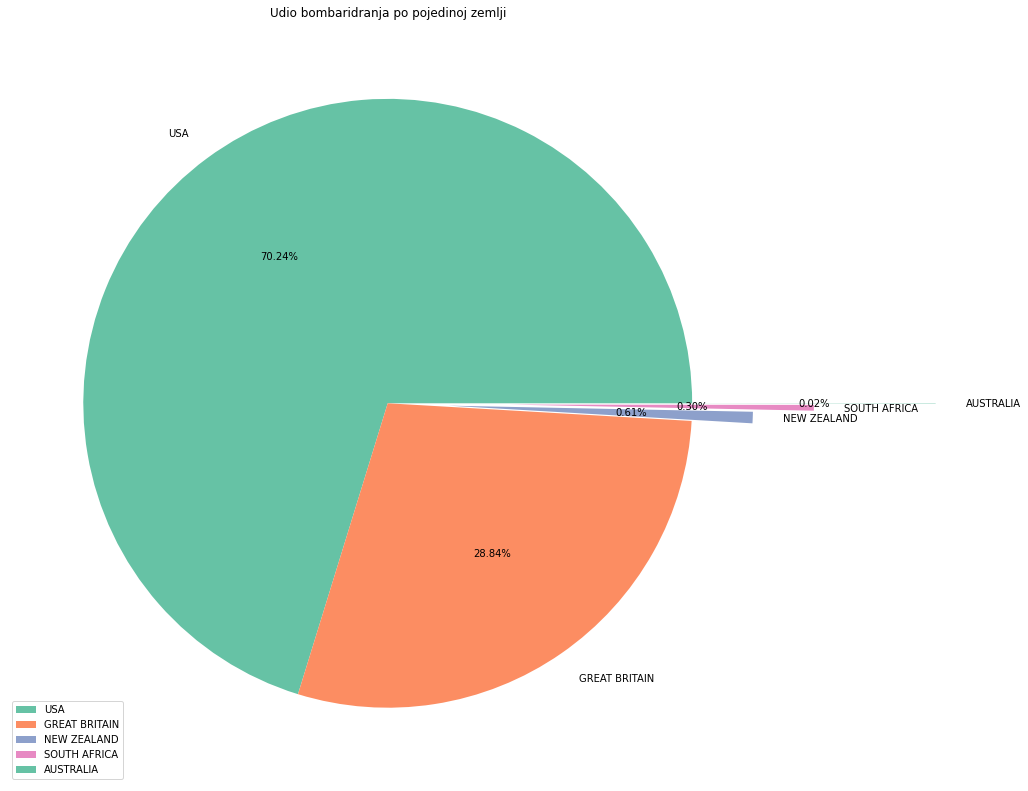

In [ ]:
print(df[df.Country.notnull()].Country.value_counts()) # count non-NaN values
color=sns.color_palette("Set2")[0:4] # color palette from Seaborn library
explode = (0, 0, 0.2, 0.4, 0.8) # expand small shares
plt.figure(figsize=(14,14))
plt.pie(df[df.Country.notnull()].Country.value_counts(), labels=df[df.Country.notnull()].Country.unique(),explode=explode, colors=color, autopct='%.2f%%')
plt.title("Bombing Share by Country")
plt.legend();

We can see that the majority of recorded bombings are from the USA (70.24%), as expected since these are their data. Immediately after them are the UK data (28.84%), followed by New Zealand (0.61%), South Africa (0.3%), and Australia (0.02%). All these countries were once part of the same alliance, and they are all English-speaking countries. Besides the large number of records from the USA, we expected a significant number of records from the UK because WW2 was most intense in Europe, and these two countries collaborated intensively during that period. We also expected to see countries under the English crown on the list. Australia and New Zealand were known sources of supply for the USA at the time, and they still recognize the English king and monarchy as their king and monarchy ([Commonwealth of Nations](https://en.wikipedia.org/wiki/Commonwealth_of_Nations)). At that time, South Africa was also under the same crown, but it later separated. This is likely the reason why these countries are on the list.

 ## 4.2. Which countries suffered the most from the bombing?


In [ ]:
print(f'The number of countries targeted in the attacks is: {len(df[df.TargetCountry.notnull()].TargetCountry.unique())}')
# Count and display the top ten occurrences
pd.crosstab(columns='count', index=df.TargetCountry).sort_values(by="count", ascending=False).head(10)

Broj zemalja koji su bili meta napada je: 82


col_0                count
TargetCountry             
GERMANY              44252
FRANCE               13959
ITALY                13020
PHILIPPINE ISLANDS    7986
BURMA                 7720
NEW GUINEA            7068
CHINA                 3961
BISMARK ARCHIPELAGO   3437
CELEBES ISLANDS       3079
NETHERLANDS           3074

GERMANY                44252
FRANCE                 13959
ITALY                  13020
PHILIPPINE ISLANDS      7986
BURMA                   7720
NEW GUINEA              7068
CHINA                   3961
BISMARK ARCHIPELAGO     3437
CELEBES ISLANDS         3079
NETHERLANDS             3074
Name: TargetCountry, dtype: int64


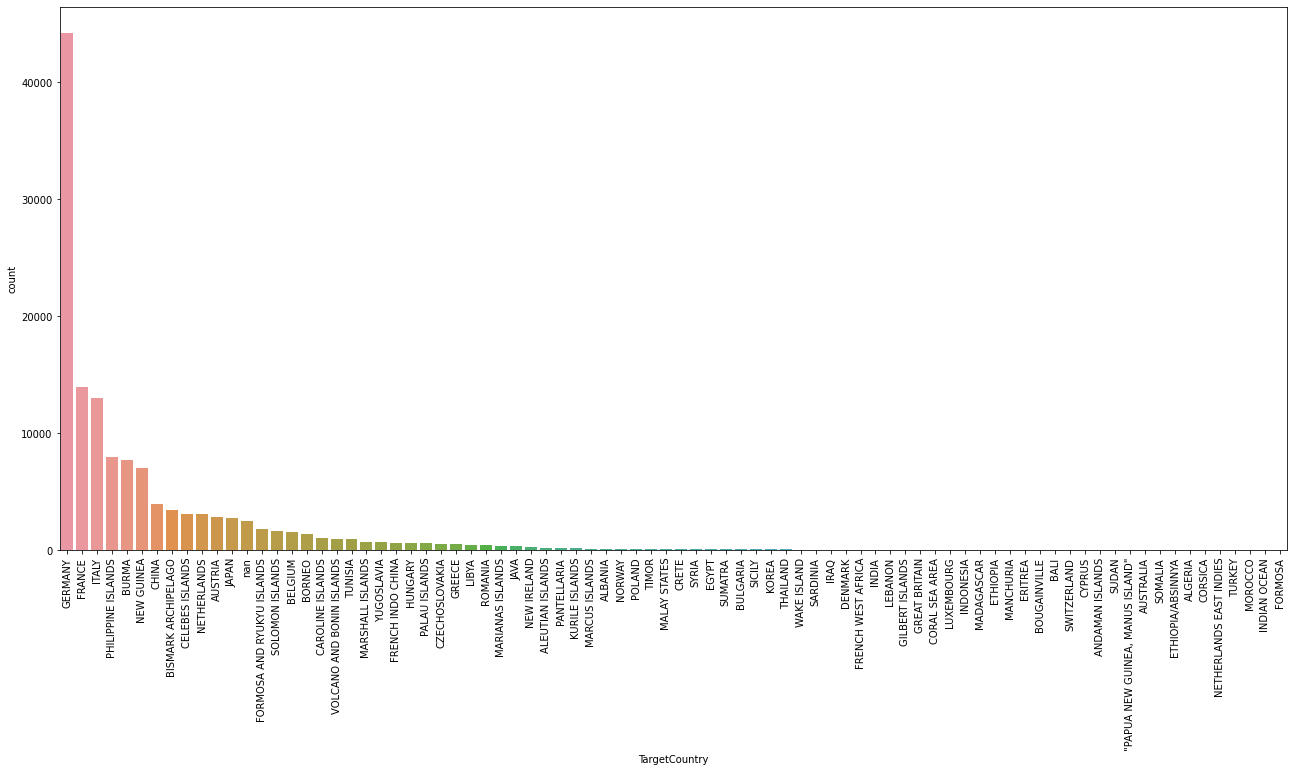

In [ ]:
print(df.TargetCountry.value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(
    x='TargetCountry',
    data=df,
    order = df['TargetCountry'].value_counts().index)
plt.xticks(rotation=90)
plt.show();

We have obtained the expected number of attacks on countries. Germany and Italy (two of the main actors of World War II) were then countries allied with those conducting the attacks. France has a similar number of attacks to Italy, which is also expected because Germany had occupied France as well as Austria, etc. It can be seen that there are no attacks, for example, on Russia, which was an ally of the USA at that time. A certain number of attacks were also carried out on Japan, which was an ally of Germany and Italy. Although the Independent State of Croatia (NDH) existed at that time, we do not have data on it here. The reason for this is that the NDH was not recognized by the alliance conducting the attacks; instead, everything was accounted for under Yugoslavia.

## 4.3. How many bombings occurred relative to the theaters of operation? How many tons of bombs were dropped in each theater of operation? What was the most common takeoff location for each theater of operation? How many aircraft were sent to each theater of operation by country?

ETO            66774
PTO            35620
MTO            17413
CBI            11759
nan             2329
EAST AFRICA      140
MADAGASCAR        26
Name: TheaterofOperations, dtype: int64


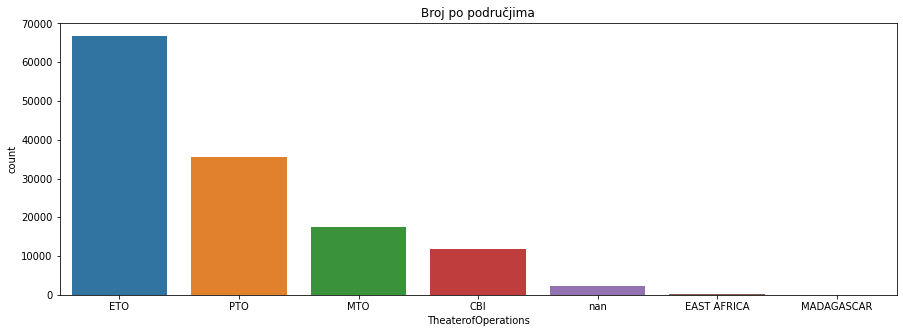

In [ ]:
print(df.TheaterofOperations.value_counts())
plt.figure(figsize=(15, 5))
sns.countplot(
    x='TheaterofOperations',
    data=df,
    order = df['TheaterofOperations'].value_counts().index)
plt.title('Number by area')
plt.show()

Here we can see that the majority of bombings occurred in the European theater of operations (ETO and MTO), which is expected as European countries were the main actors. Following Europe, the Asian theater of operations experienced the next highest number of bombings, while Africa remained largely unaffected.

In [ ]:
# count explosives by area
# group by area and collect tons of explosives
explosives_num = df.groupby('TheaterofOperations')['TotalWeight'].sum().reset_index()
# sort by tons
explosives_num = explosives_num.sort_values(by='TotalWeight', ascending=False).reset_index()
# remove column "index"
explosives_num.drop('index', axis=1, inplace=True)
explosives_num

TheaterofOperations   TotalWeight
0                 ETO  2.251056e+06
1                 PTO  4.459879e+05
2                 MTO  3.722061e+05
3                 CBI  4.626656e+04
4                 nan  4.384631e+04
5         EAST AFRICA  6.399580e+03
6          MADAGASCAR  0.000000e+00

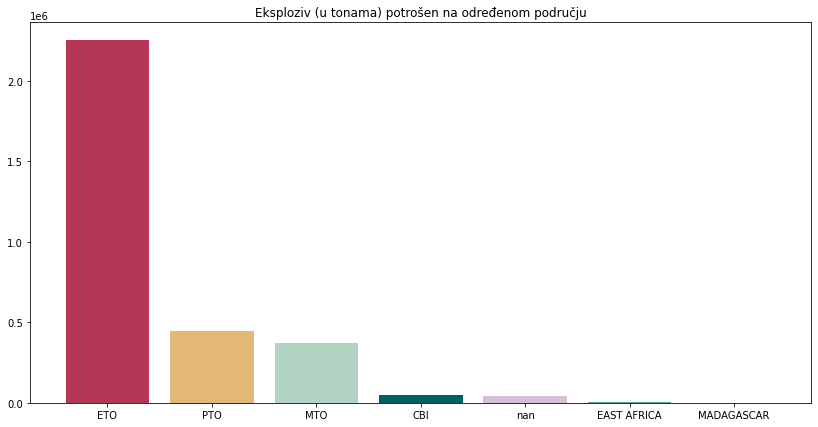

In [ ]:
colrs= ['#B43757', '#E3B778', '#B2D3C2', '#016064', '#D8BFD8', '#5EA193', '#7C689C']
fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(explosives_num['TheaterofOperations'], explosives_num['TotalWeight'], color=colrs)
ax.set_title('Explosive (tons) spent in a certain area')
plt.show();

We can see that the most recorded tons of explosives were released in the European area (ETO and MTO). After that comes the Pacific. No explosives were recorded (or released) on the territory of Madagascar. Again, these numbers were expected.

In [ ]:
# Extract columns "Theater of Operations" and "Takeoff Base"
n_top = df[["Theater of Operations", "Takeoff Base"]].dropna()
# Group values by theater and find the most common takeoff base
n_top = n_top.groupby("Theater of Operations").apply(lambda x: x['Takeoff Base'].value_counts().index[0])
# Add a column indicating how many times each base was used
n_top = pd.concat([n_top, df.groupby(['Theater of Operations']).apply(lambda x: x['Takeoff Base'].value_counts().max())], axis=1).reset_index()
# Replace the row with "nan" in "Theater of Operations" with np.nan
n_top["Theater of Operations"].replace("nan", np.nan, inplace=True)
# Drop the missing value in "Theater of Operations" where it has np.nan
n_top = n_top.dropna(subset=["Theater of Operations"], how='any', axis=0)
# Rename columns
n_top.rename(columns={0: "TakeoffBase", 1: "n_TOP"}, inplace=True)
# Sort
n_top.sort_values(by='n_TOP', ascending=False, inplace = True)
n_top

TheaterofOperations                     TakeoffBase  n_TOP
4                 MTO             POMIGLIANO AIRFIELD    351
5                 PTO                          CAIRNS     96
0                 CBI  "MINGALADON AIRFIELD, RANGOON"     66
1         EAST AFRICA                           OUDNA     26
2                 ETO            "TORTORELLA, FOGGIA"     20
3          MADAGASCAR                  HMS ILLUSTRIUS      6

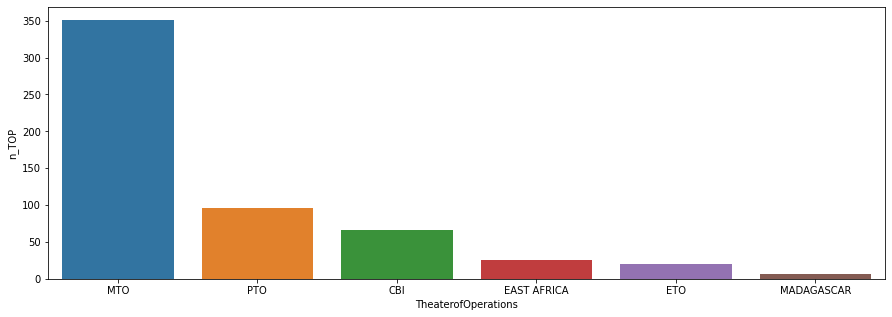

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=n_top, x='TheaterofOperations', y='n_TOP', order=n_top.TheaterofOperations );

In [ ]:
print("Torterella, Foggia -> number of records:")
df[df["TakeoffBase"] == '"TORTORELLA, FOGGIA"'][["TakeoffLongitude", "TakeoffLatitude"]].shape[0]

Torterella, Foggia -> broj zapisa:


408

The most common takeoff bases for bombardments in Europe are from Italy, either for the Mediterranean area ([Pomigliano Airfield](https://en.wikipedia.org/wiki/Pomigliano_Airfield)) or the rest of Europe (Tortorella, Foggia). Although Foggia was not used as frequently as the aforementioned one for the Mediterranean area. For the East African theater, it is [Oudna](https://en.wikipedia.org/wiki/Oudna_Airfield) in Tunisia, which was an American base. For the Pacific area, it was the port in Cairns in northeastern Australia, and for Southeast Asia (China, Burma, and India), it was a port in southern Myanmar. Interestingly, aircraft carriers (ships) were used for attacks on Madagascar. This is not surprising as Madagascar is an island.

In [ ]:
def convert_to_num(x):
  if pd.isna(x):
    return 0
  else:
    return x

In [ ]:
# Fetch columns "TheaterofOperations", "Country", and aircraft where the country is not NaN
num_plain = df[df.Country.notnull()][["TheaterofOperations", "Country", "AirborneAircraft", 'AttackingAircraft', 'BombingAircraft']]
# Replace all missing values with zeros
num_plain["AirborneAircraft"] = np.where(np.isnan(num_plain["AirborneAircraft"] ), 0, num_plain["AirborneAircraft"])
num_plain["AttackingAircraft"] = np.where(np.isnan(num_plain["AttackingAircraft"] ), 0, num_plain["AttackingAircraft"])
num_plain["BombingAircraft"] = np.where(np.isnan(num_plain["BombingAircraft"] ), 0, num_plain["BombingAircraft"])
# Sum all aircraft in the columns
num_plain["Aircraft"] = num_plain["AirborneAircraft"]+ num_plain["AttackingAircraft"] + num_plain["BombingAircraft"]
# Drop individual aircraft
num_plain.drop(columns=["AirborneAircraft", 'AttackingAircraft', 'BombingAircraft'], inplace=True)
# Group by theater of operations, then by the country conducting the bombings, and sum the number of dispatched aircraft
num_plain = num_plain.groupby(["TheaterofOperations", "Country"]).apply(lambda x: x['Aircraft'].sum()).reset_index()
# Rename the newly created column
num_plain.rename(columns={0: "SumAircraft"}, inplace=True)
num_plain

TheaterofOperations        Country  SumAircraft
0                  CBI  GREAT BRITAIN      12364.0
1                  CBI            USA      55277.0
2          EAST AFRICA  GREAT BRITAIN       2849.0
3          EAST AFRICA   SOUTH AFRICA         27.0
4          EAST AFRICA            USA         40.0
5                  ETO  GREAT BRITAIN     389167.0
6                  ETO            USA     403972.0
7           MADAGASCAR  GREAT BRITAIN        118.0
8                  MTO  GREAT BRITAIN      31828.0
9                  MTO   SOUTH AFRICA        117.0
10                 MTO            USA     341498.0
11                 PTO      AUSTRALIA       1628.0
12                 PTO    NEW ZEALAND       6083.0
13                 PTO            USA     219222.0
14                 nan      AUSTRALIA         54.0
15                 nan  GREAT BRITAIN      25937.0
16                 nan            USA       8799.0

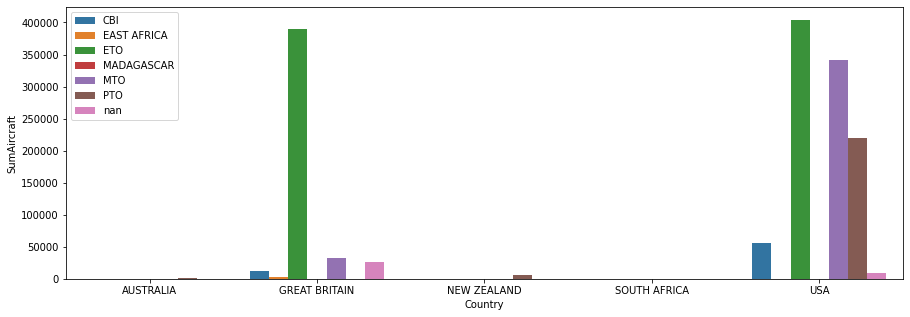

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=num_plain, x='Country', y='SumAircraft', hue='TheaterofOperations')
plt.legend(loc='upper left');

Here we can see that the United States and the United Kingdom dispatched the most aircraft to the European theater (ETO and MTO). The United States remained active in the Pacific theater as well. We observe that the United Kingdom participated across all continents (though not in all theaters), and the United States also sought to be active wherever possible. The United States deployed a considerable number of aircraft for operations in Europe. South Africa only engaged in attacks in the Mediterranean and East Africa, while Australia and New Zealand focused on the Pacific. It's a bit peculiar that New Zealand didn't operate in the China and India theater considering they are geographically closest among all alliance member states to those areas. It's evident that the United States leads in numbers compared to other countries (even in Europe).

## 4.4. What is the most commonly used aircraft during bombing missions? Which aircraft can we track the path of the most? Which aircraft is most frequently used by which country? Which aircraft is most commonly used in attacks on Germany?

In [ ]:
# the most used plane during the bombing
# count series occurrences
data = df.AircraftSeries.value_counts()
data.reset_index().head(15)

index  AircraftSeries
0    B24           26500
1    B17           19055
2    B25           12940
3    A20            7777
4   WELL            6150
5   GB17            6112
6    HVY            6056
7    B26            5736
8    P47            4144
9    LGT            3533
10   P51            3510
11  HAMP            3360
12  BLEN            3093
13  WHIT            2989
14   P38            2962

In [ ]:
# the most used plane
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
# the plane whose trajectory we can follow the most
df_plain_path = df_geo_paths.AircraftSeries.value_counts()
df_plain_path.reset_index().head(10)

index  AircraftSeries
0           A36             963
1           LIB             532
2           B25             405
3           B24             336
4          BLEN             179
5          WELL             129
6           B17             119
7  PV-1 VENTURA              70
8          WHIT              32
9          HALI              18

The first 3 planes from the list of the most used:

[**B24:**](https://en.wikipedia.org/wiki/Consolidated_B-24_Liberator)

> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Maxwell_B-24_%28cropped%29.jpg/1024px-Maxwell_B-24_%28cropped%29.jpg" width=220px>

> At the outset, the B-24 was of modern design with a highly efficient Davis wing of high aspect ratio on the shoulder. This wing gave the Liberator a high cruising speed, long range, and the ability to carry heavy bomb loads. Early Royal Air Force (RAF) Liberators were the first aircraft to routinely cross the Atlantic Ocean. Compared to its contemporaries, the B-24 was relatively difficult to fly and had poor performance at low speeds.

[**B17:**](https://en.wikipedia.org/wiki/Boeing_B-17_Flying_Fortress)

> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/B17_-_Chino_Airshow_2014_%28framed%29.jpg/1280px-B17_-_Chino_Airshow_2014_%28framed%29.jpg" width=220px>

> The Boeing B-17 Flying Fortress is a four-engine heavy bomber developed in the 1930s for the United States Army Air Corps (USAAC). Relatively fast and high-flying for a bomber of its era, the B-17 was primarily used in the European Theater of Operations and dropped more bombs than any other aircraft during World War II. It is the third most-produced bomber of all time, behind the four-engine Consolidated B-24 Liberator and the multi-role twin-engine Junkers Ju 88. It was also utilized as a transport aircraft, anti-submarine aircraft, and as a controller for unmanned aerial vehicles and searchers.
[**B25:**](https://en.wikipedia.org/wiki/North_American_B-25_Mitchell)

><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/B25_Mitchell_-_Chino_Airshow_2014_%2814033501440%29.jpg/1024px-B25_Mitchell_-_Chino_Airshow_2014_%2814033501440%29.jpg" width=220px>

>The North American B-25 Mitchell is an American medium bomber that was introduced in 1941 and named in honor of Brigadier General William "Billy" Mitchell, a pioneer of the United States military aviation. Used by many Allied air forces, the B-25 served in every theater of World War II, and after the war ended, many remained in service, operating for four decades. Produced in numerous variants, almost 10,000 B-25s were built.

<br/>

The aircraft with the most recorded flight paths (from base to target) is the Boeing B-17 Flying Fortress:

[**A36:**](https://en.wikipedia.org/wiki/North_American_A-36)

> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/North_American_A-36A_Apache_USAF.jpg/220px-North_American_A-36A_Apache_USAF.jpg" width=220px>

> The North American A-36 (referred to in some sources as "Apache" or "Invader", but generally known as the Mustang) was a dive bomber/ground-attack version of the North American P-51 Mustang, distinguishable by the presence of rectangular dive brakes above and below the wings. The A-36 bomber served in the Mediterranean and Southeast Asia during World War II before being withdrawn from operational use in 1944.





In [ ]:
# use of airplanes by country
# group by country and find the plane series that has the highest frequency of appearance
plain_country = pd.DataFrame(df.groupby(['Country']).apply(lambda x: x['AircraftSeries'].value_counts().index[0]))
# add that number too
plain_country = pd.concat([plain_country, df.groupby(['Country']).apply(lambda x: x['AircraftSeries'].value_counts().max())], axis=1).reset_index()
# column names
cols= ["Country", "AircraftSeries", "Count"]
plain_country.columns = cols
# sort by size
plain_country = plain_country.sort_values(by="Count", ascending = False).reset_index().drop(columns=["index"], axis=1)
plain_country

Country AircraftSeries  Count
0            USA            B24  20621
1  GREAT BRITAIN           WELL   6127
2    NEW ZEALAND            F4U    360
3      AUSTRALIA         HUDSON    161
4   SOUTH AFRICA           JU86      5

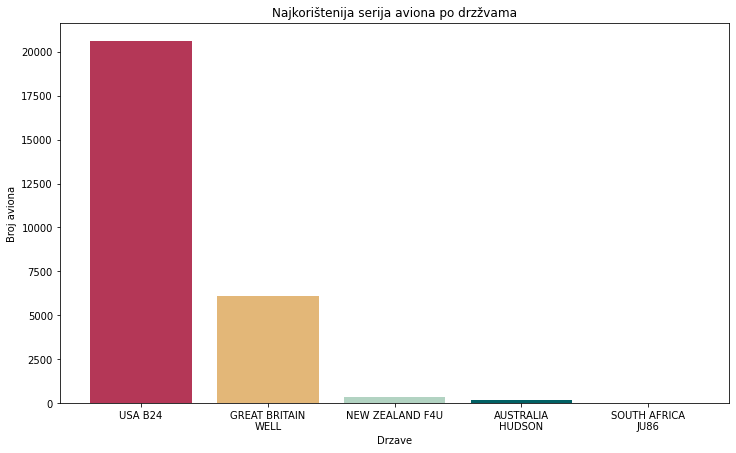

In [ ]:
# use of airplanes by country
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(plain_country['Country'], plain_country['Count'], color=colrs)
ax.set_title("The most used aircraft series by country")
ax.set_xlabel('Country')
ax.set_ylabel('Number of airplains')
labels=[]
# get the label for each country
for i in range(plain_country.shape[0]):
  label = plain_country.loc[i, "Country"] + " " + plain_country.loc[i, "AircraftSeries"]
  labels.append(label)
# split
labels=[textwrap.fill(text,15) for text in labels]
plt.xticks(range(len(labels)), labels);

United States most commonly used the B24 for attacks on Germany. The B24 is described above.

[**B24:**](https://en.wikipedia.org/wiki/Consolidated_B-24_Liberator)

> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/WellingtonBomber.jpg/1920px-WellingtonBomber.jpg" width=220px>

> The Vickers Wellington LN514 was a bomber manufactured in 1943 in record time, as part of British propaganda during World War II. The bomber was constructed in 23 hours and 50 minutes, and took off 24 hours and 48 minutes after the first parts of the construction were laid down, breaking the previous record of an American factory of 48 hours. It was constructed at the Vickers-Armstrongs factory in Broughton, Flintshire. The record attempt was the government's idea to boost morale at home and send a message abroad that British war production capacities were not affected by German bombings.

[**F4U:**](https://en.wikipedia.org/wiki/F4U_Corsair)

> <img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Corsair_Barth.jpg" width=220px>

> The Vought F4U Corsair is an American single-engine fighter designed for carrier-based operations. It was most commonly used in World War II and later in the Korean War.

[**HUDSON:**](https://en.wikipedia.org/wiki/Lockheed_Hudson)

> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Lockheed_A-29_Hudson_USAAF_in_flight_c1941.jpg/1280px-Lockheed_A-29_Hudson_USAAF_in_flight_c1941.jpg" width=220px>

> The Lockheed Hudson is a light bomber and coastal reconnaissance aircraft built by the American Lockheed Aircraft Corporation. It was originally put into service by the Royal Air Force shortly before the outbreak of World War II, and was primarily operated by them thereafter. The Hudson served throughout the war, mainly in Coastal Command, but also in transport and training roles, as well as in delivering agents to occupied France. It was also extensively used with anti-submarine squadrons of the Royal Canadian Air Force and the Royal Australian Air Force.

[**F4U:**](https://en.wikipedia.org/wiki/Junkers_Ju_86)

> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Junkers_Ju-86_K-2_t%C3%ADpus%C3%BA_rep%C3%BCl%C5%91g%C3%A9p._Fortepan_11072.jpg/1280px-Junkers_Ju-86_K-2_t%C3%ADpus%C3%BA_rep%C3%BCl%C5%91g%C3%A9p._Fortepan_11072.jpg" width=220px>

> The Junkers Ju 86 was a German single-wing bomber and civilian passenger aircraft designed in the early 1930s, and was used by various air forces on both sides during World War II.

In [ ]:
# planes most often used to attack Germany
# retrieve a series of planes targeting Germany
target_germany_plain = df[df.TargetCountry == "GERMANY"]["AircraftSeries"].reset_index()
target_germany_plain.drop(columns=["index"], axis=1, inplace=True)
# count the number of appearances - the first 10
target_germany_plain = target_germany_plain.value_counts().reset_index().head(10).rename(columns={0: "Count"})
target_germany_plain

AircraftSeries  Count
0            B17  12260
1            B24   4721
2           GB17   4550
3            HVY   4150
4           WELL   3847
5            LGT   2755
6           HAMP   2714
7           WHIT   2194
8            B26   1891
9            MED   1658

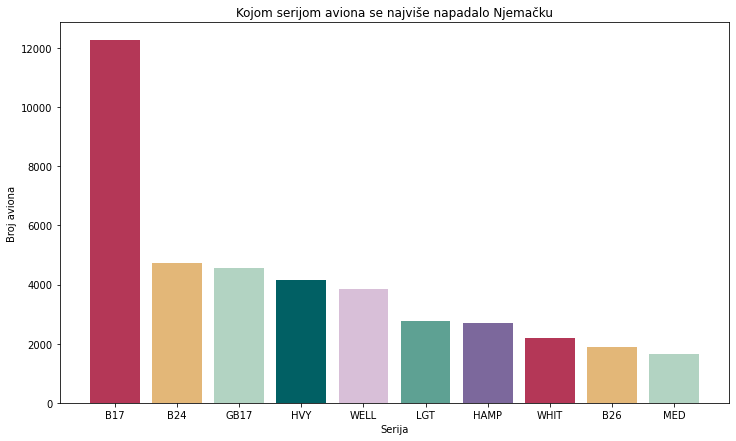

In [ ]:
# planes most often used to attack Germany
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(target_germany_plain['AircraftSeries'], target_germany_plain['Count'], color=colrs)
ax.set_title("Which series of planes attacked Germany the most")
ax.set_xlabel('Series')
ax.set_ylabel('Number of planes');

So far, we've seen what some of the most commonly used bombers in World War II looked like. Many of these bombers can be found among the most frequently used bombers for attacks on Germany. Thus, we recognize the B17, B24, WELL, B26, and GB17. Since the USA had the largest air fleet and one of the most commonly used bombers was the B17, these results are not surprising. The source above states that the B17 bomber was most commonly used in the European theater, which is also evident in this dataset, especially considering that Germany was the most heavily bombed country in World War II.

## 4.5. Visualize on the map using geographic latitude and longitude where the departure ports are located.

In [ ]:
df_geo_paths["color"] = "" # add a color column to store colors for each country
df_geo_paths.color[df_geo_paths.Country == "USA"] = "rgb(0, 116, 217)" # define color for USA - blue
df_geo_paths.color[df_geo_paths.Country == "GREAT BRITAIN"] = "rgb(255, 65, 54)" # define color for GB - red
df_geo_paths.color[df_geo_paths.Country == "NEW ZEALAND"] = "rgb(133, 20, 75)" # define color for NZ - wine
df_geo_paths.color[df_geo_paths.Country == "SOUTH AFRICA"] = "rgb(255, 133, 27)" # define color for SA - orange

data = [dict(
    type = 'scattergeo',# display geographical map
    lon = df_geo_paths['TakeoffLongitude'], # geographical longitudes
    lat = df_geo_paths['TakeoffLatitude'], # geographical latitudes
    hoverinfo = 'text',
    text = ("Country: " + str(df_geo_paths.Country) +
    "\nDeparture Location: "+ str(df_geo_paths["TakeoffLocation"])+
    "\nDeparture Base: " + str(df_geo_paths['TakeoffBase'])), # define what will be displayed on each point
    mode = 'markers',
    marker = dict( # define marker model for departure ports
        sizemode = 'area',
        sizeref = 1,
        size = 10,
        line = dict(width = 1, color = "white"),
        color = df_geo_paths["color"],
        opacity = 0.7)
)]
layout = dict(
    title = 'Departure Bases by Country',
    hovermode = 'closest',
    geo = dict(showframe = False, showland = True, showcoastlines = True, showcountries = True, # modeling geographical map
              countrywidth = 1, projection = dict(type = 'mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth = 1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor = 'rgb(5, 5, 5)')
)
fig = go.Figure(data = data, layout = layout)
fig.update_layout(# define display dimensions
    autosize=False,
    width=1200,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    geo_scope= "world",
)
iplot(fig);

The arrangement of departure bases is very interesting. We can notice that the bases encircle the countries and areas being targeted. This is most evident in the CBI theater of operations, and it is also noticeable in the Mediterranean, the Pacific, and in Africa. Surrounding the enemy was not uncommon in the history of warfare, and this strongly reminds us of such an attempt.

## 4.6. Visualize on the map using geographic latitude and longitude the path from the departure base to the bombing location.

In [ ]:
airports = [ dict( # definition of departure ports is helped by latitude and longitude
    type = 'scattergeo',
    lon = df_geo_paths.TakeoffLongitude,
    lat = df_geo_paths.TakeoffLatitude,
    hoverinfo = 'text',
    text = ('Country: ' + str(df_geo_paths.Country) + " Takeoff Location: "
            + str(df_geo_paths.TakeoffLocation)
            + " Takeoff Base: " + str(df_geo_paths.TakeoffBase)),
    mode = 'markers',
    marker = dict(
        size = 5,
        color = df_geo_paths["color"],
        line = dict(
        width = 1,
        color = "white"
        )
    )
)]

targets = [ dict( # defining the bombing site
    type = 'scattergeo',
    lon = df_geo_paths.TargetLongitude,
    lat = df_geo_paths.TargetLatitude,
    hoverinfo = 'text',
    text = ("Target Country: " + str(df_geo_paths.TargetCountry)
            + " Target City: " + str(df_geo_paths.TargetCity)),
    mode = "markers",
    marker = dict(
        size = 1,
        color = "red",
        line = dict(
            width = 0.5,
            color = "red"
        )
    )
)]

# draw the trajectory of the plane
flight_paths = []
for i in range(len(df_geo_paths.TargetLongitude)):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [df_geo_paths.iloc[i, 9], df_geo_paths.iloc[i, 16]],
            lat = [df_geo_paths.iloc[i, 8], df_geo_paths.iloc[i, 15]],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )

layout = dict( # modeling the map display
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode = 'closest',
    geo = dict(
        showframe = False,
        showland = True,
        showcoastlines = True,
        showcountries = True,
        countrywidth = 1,
        projection = dict(type = "mercator"),
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)',
        countrycolor = "rgb(5, 5, 5)")
)
fig = go.Figure(data = flight_paths + airports + targets, layout = layout) # definiranje velicine karte
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
iplot(fig);

On this map, we have almost 3000 tracks of paths. We have previously explored and seen that the A36 series of aircraft most commonly performed these routes. We can observe that these paths were mostly short. In Africa (which is marked as the Madagascar theater of operations, and today Ethiopia and Somalia), the attacks were mainly land or transoceanic. In Europe, we can see that the southern part of Europe was mostly attacked from North Africa. This can be seen, for example, in the case of Italy. Italy was attacked from all sides, mostly from Africa, and when bases were established in Italy, it is evident how the rays spread from the bases to all neighboring countries of Italy (and beyond). In the Pacific, attacks were mostly maritime or from islands serving as bases. In the CBI, there were frequent and very short attacks from the northwest, somewhat longer and less frequent from the south.

One very strange route appears on the map, or unusually long. It stretches from North Africa all the way to Japan. We tried to find information about this flight, but we were unsuccessful. There is a high probability that this is an error in this case, if not, then it was the longest route from the departure base to the target.

We could try to find the longest distances using Euclidean distance because we have a two-dimensional vector of coordinates, and both points are located in the northern hemisphere, east of the prime meridian. Otherwise, if we wanted to measure distances between individual geographic points, we would need a slightly more complex formula.

**Euclidean distance between two vectors:**

$d = 	\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }$

In [ ]:
# Euclidean distance
def eucledean_distance(row):
  d = distance.euclidean([abs(row.TakeoffLatitude), abs(row.TakeoffLongitude)],
                         [abs(row.TargetLatitude), abs(row.TargetLongitude)])
  return d
# interesting columns
df_geo_paths_euclidean = df_geo_paths[["TakeoffLatitude", "TakeoffLongitude", "TakeoffLocation",  "TargetLatitude", "TargetLongitude", "TargetCountry"]]
# apply
df_geo_paths_euclidean["EuclideanDistance"] = df_geo_paths_euclidean.apply(eucledean_distance, axis=1)
# display
df_geo_paths_euclidean.sort_values(by="EuclideanDistance", ascending=False).reset_index().drop(columns=["index"]).head(n=1)

TakeoffLatitude  TakeoffLongitude TakeoffLocation  TargetLatitude  \
0        31.866667         24.418056           LIBYA            32.9   

   TargetLongitude TargetCountry  EuclideanDistance  
0           132.07         LIBYA         107.656904

Yes, as we assumed, this is a mistake because we see that both the country of departure and the target are Libya.

## 4.7. Display bombings during World War II by days and months. Which day of the month and which month saw the most attacks? Does the quantity and severity of ammunition used vary by year?

In [ ]:
# Take dates from the dataset
bomb_time = df["MissionDate"]
bomb_time=bomb_time.reset_index()
# Drop the newly created column
bomb_time.drop(columns=["index"], inplace=True)
# Add a column with all units to make it easier for us to count
bomb_time["Sum"] = 1
bomb_time

MissionDate  Sum
0       1943-08-15    1
1       1943-08-15    1
2       1943-08-15    1
3       1943-08-15    1
4       1943-08-15    1
...            ...  ...
134056  1945-02-16    1
134057  1945-02-16    1
134058  1945-02-16    1
134059  1945-02-16    1
134060  1945-02-16    1

[134061 rows x 2 columns]

In [ ]:
# Take dates and theater of operations from the dataset
bomb_time_eu = df[["MissionDate", "TheaterofOperations"]]
# Take data for operations in Europe
bomb_time_eu=bomb_time_eu[(bomb_time_eu["TheaterofOperations"] == "ETO") | (bomb_time_eu["TheaterofOperations"] == "MTO")]
bomb_time_eu=bomb_time_eu.reset_index()
# Drop the newly created column and the theater of operations
bomb_time_eu.drop(columns=["index", "TheaterofOperations"], inplace=True)
# Add a column with all units to make it easier for us to count
bomb_time_eu["Sum"] = 1
bomb_time_eu

MissionDate  Sum
0      1943-08-15    1
1      1943-08-15    1
2      1943-08-15    1
3      1943-08-15    1
4      1943-08-15    1
...           ...  ...
84182  1945-02-15    1
84183  1945-02-15    1
84184  1945-02-15    1
84185  1945-02-15    1
84186  1945-02-15    1

[84187 rows x 2 columns]

In [ ]:
# Copy for counting by days
bomb_days = bomb_time[['MissionDate','Sum']]
# Group by days
bomb_days = bomb_days.groupby(pd.Grouper(key='MissionDate', freq='1D', sort=True)).count()
bomb_days.head(10)

Sum
MissionDate     
1939-09-03     1
1939-09-04     3
1939-09-05     1
1939-09-06     0
1939-09-07     1
1939-09-08     2
1939-09-09     0
1939-09-10     1
1939-09-11     0
1939-09-12     0

In [ ]:
biggest_sum = bomb_days.reset_index()
# take the column with the highest number of bombings
biggest_sum = biggest_sum.nlargest(1, columns='Sum')
print(f"The largest bombing was {biggest_sum.MissionDate.to_string()[7:]} and it was {biggest_sum.Sum.to_string()[8:]} bombing.")

Najviše bombardiranja je bilo 1945-04-15 i to 516 bombardiranja.


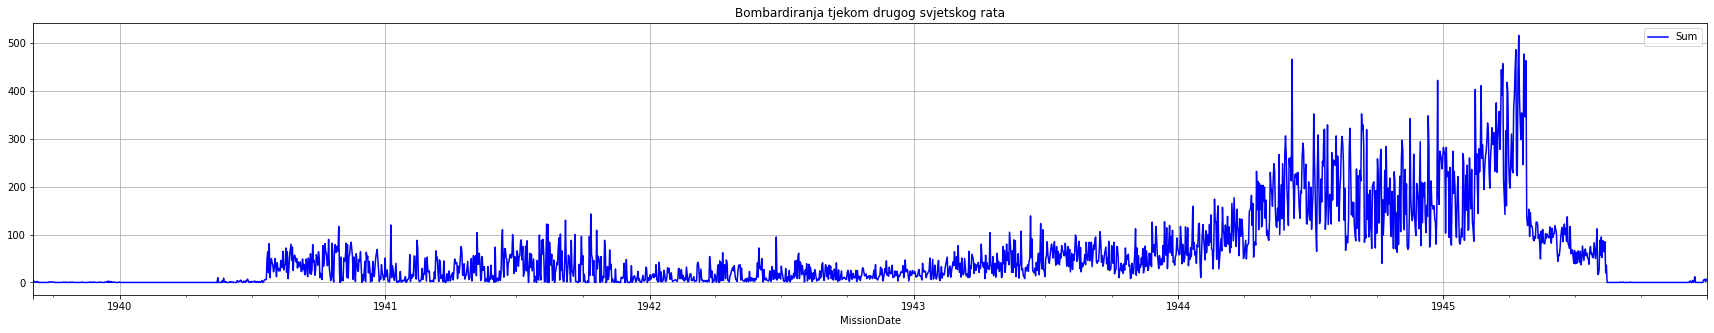

In [ ]:
bomb_days.plot(figsize=(30,5), title="Bombings during the Second World War", color="blue", grid=True,);

On the graph above, the number of bombings per day during World War II is displayed. Until the middle of 1940, the number of bombings was very low. After that, we see a sharp increase in the number of bombings, which remained high until the end of 1941. Following that, there seems to be a slight lull throughout 1942, but from 1943 onward, the number of bombings steadily increases until around one-third of 1945, after which the number sharply declines until the end of the war. It's easy to see from this graph that the number of bombings was highest in 1944 and early 1945 when bombings seemed to occur daily in large numbers. Additionally, as we've verified, the highest number of bombings was on April 15, 1945, just a few months before the end of the war. Daily fluctuations were greatest from the middle of 1944 to around one-third of 1945, but those numbers hardly dropped below 100 bombings per day.

We'll also display the same graph by months, which should have a smoother line to provide a better sense of the volume of bombings, but it will provide the same information as the previous graph.

In [ ]:
bomb_m = bomb_time[['MissionDate','Sum']]
# group by month
bomb_m=bomb_m.groupby(pd.Grouper(key='MissionDate', freq='M', sort=True)).sum()
bomb_m.head(10)

Sum
MissionDate     
1939-09-30    15
1939-10-31     5
1939-11-30     5
1939-12-31    16
1940-01-31     0
1940-02-29     0
1940-03-31     0
1940-04-30     0
1940-05-31    26
1940-06-30    48

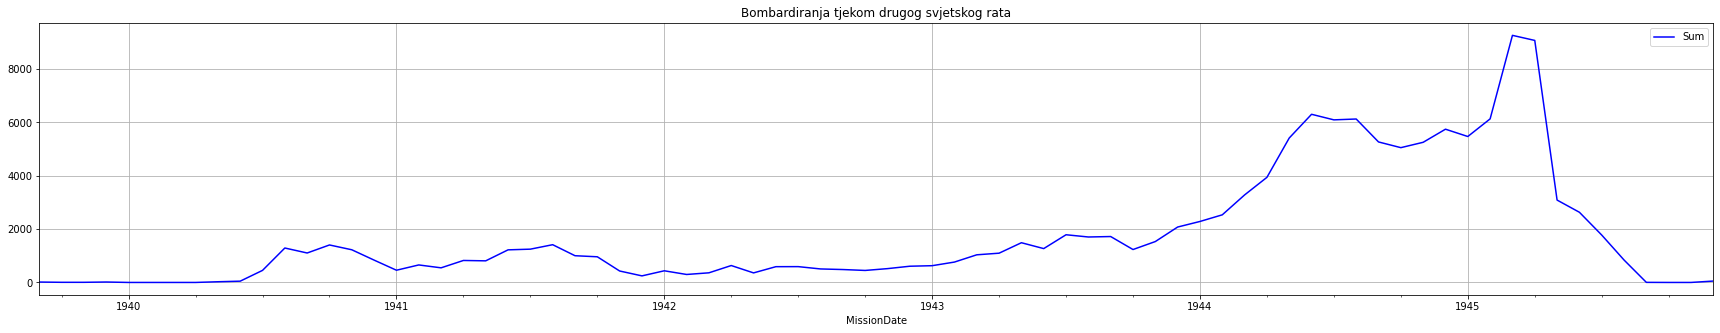

In [ ]:
bomb_m.plot(figsize=(30,5), title="Bombings during the Second World War", color="blue", grid=True,);

In [ ]:
bomb_m_eu = bomb_time_eu[['MissionDate','Sum']]
# group by month
bomb_m_eu = bomb_m_eu.groupby(pd.Grouper(key='MissionDate', freq='M', sort=True)).sum()
bomb_m_eu.head(10)

Sum
MissionDate     
1939-09-30    15
1939-10-31     5
1939-11-30     5
1939-12-31    16
1940-01-31     0
1940-02-29     0
1940-03-31     0
1940-04-30     0
1940-05-31    26
1940-06-30    47

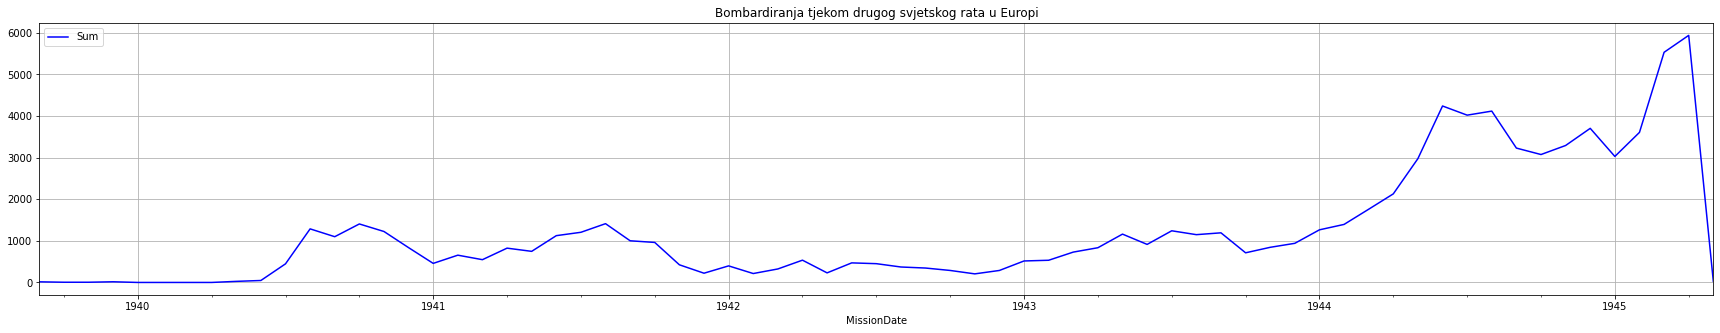

In [ ]:
bomb_m_eu.plot(figsize=(30,5), title="Bombings during the Second World War in Europe", color="blue", grid=True,);

We can see that there isn't a strict pattern regarding when the bombings occurred, but generally, the number was slightly higher during the middle of the year, or in warmer months. This is somewhat more pronounced when we filter attacks in the European theater, as some bombings were conducted near the equator and in the southern hemisphere. Although we generally observe some peaks around the middle of the year, it's not a rule, so we can't say that seasonal temperatures significantly influenced bombings (beginning of 1944). However, we can't draw a complete conclusion because we would need a dataset containing information about temperatures, winds (which greatly affects the decision to fly or not), and weather conditions.

In [ ]:
bomb_by_day = bomb_time.copy()
# day
bomb_by_day["MissionDate"] = pd.to_datetime(bomb_by_day["MissionDate"]).dt.day
# group by day and count
bomb_by_day = bomb_by_day.groupby("MissionDate").sum()

In [ ]:
biggest_sum_day = bomb_by_day.reset_index()
# take the day that has most of the bombings
biggest_sum_day = biggest_sum_day.nlargest(1, columns='Sum')
print(f"The most bombings were {biggest_sum_day.MissionDate.to_string()[6:]} days of the month and that {biggest_sum_day.Sum.to_string()[6:]} bombings.")

Najviše bombardiranja je bilo 11 dana u mjesecu i to 5001 bombardiranja.


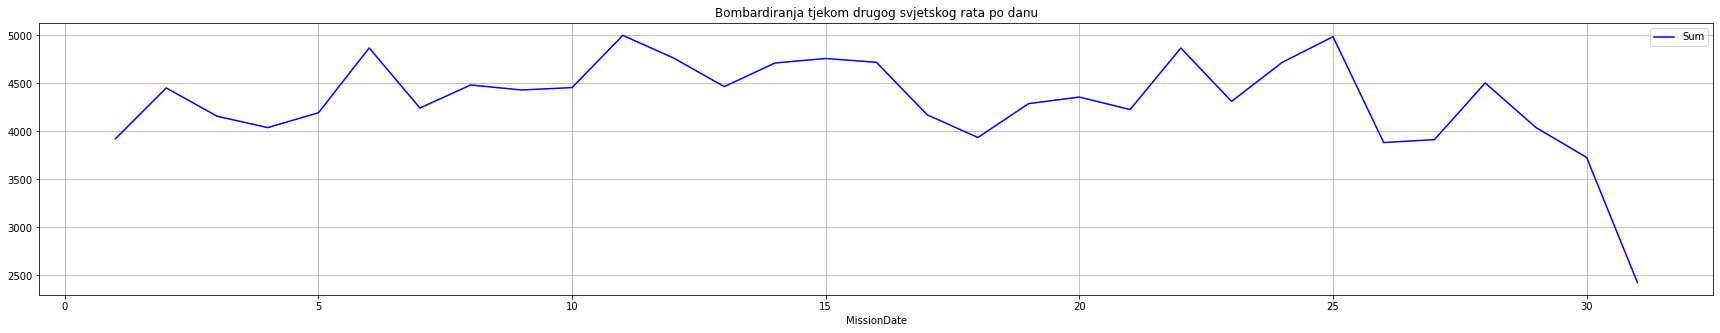

In [ ]:
bomb_by_day.plot(figsize=(30,5), title="Bombings during the Second World War per day", color="blue", grid=True,);

The highest total number of bombings occurred on the 11th day of the month, followed by the 25th day of the month. At the beginning, end, and middle of the month, this number was slightly lower. This analysis might not have been necessary, but out of curiosity, we did it.

In [ ]:
# Take dates from the dataset
bomb_time_expl = df[["MissionDate", "HighExplosives", "FragmentationDevices",
                     "IncendiaryDevices", "TotalWeight"]]
# Replace zeros with NaN
bomb_time_expl["HighExplosives"] = np.where(np.isnan(bomb_time_expl["HighExplosives"]), 0, bomb_time_expl["HighExplosives"])
bomb_time_expl["FragmentationDevices"] = np.where(np.isnan(bomb_time_expl["FragmentationDevices"]), 0, bomb_time_expl["FragmentationDevices"])
bomb_time_expl["IncendiaryDevices"] = np.where(np.isnan(bomb_time_expl["IncendiaryDevices"]), 0, bomb_time_expl["IncendiaryDevices"])
# Count all bombs
bomb_time_expl["Bombs"] = bomb_time_expl["HighExplosives"] + bomb_time_expl["FragmentationDevices"] + bomb_time_expl["IncendiaryDevices"]
# Drop unnecessary columns
bomb_time_expl.drop(columns=["HighExplosives", "FragmentationDevices", "IncendiaryDevices"], inplace=True)

# Add a column with all units to facilitate counting
bomb_time_expl["Sum"] = 1
bomb_time_expl = bomb_time_expl.groupby(pd.Grouper(key='MissionDate', freq='Y', sort=True)).sum()

bomb_time_expl = bomb_time_expl.reset_index()
# Get only years
bomb_time_expl["MissionDate"] = pd.to_datetime(bomb_time_expl["MissionDate"]).dt.year
bomb_time_expl

MissionDate   TotalWeight         Bombs    Sum
0         1939  0.000000e+00  0.000000e+00     41
1         1940  1.461964e+04  1.370000e+02   6388
2         1941  3.773297e+04  5.510000e+03   9820
3         1942  8.397925e+04  6.398897e+04   5839
4         1943  3.761750e+05  2.172331e+05  16340
5         1944  1.712587e+06  6.376810e+05  57302
6         1945  9.406679e+05  1.233776e+06  38331

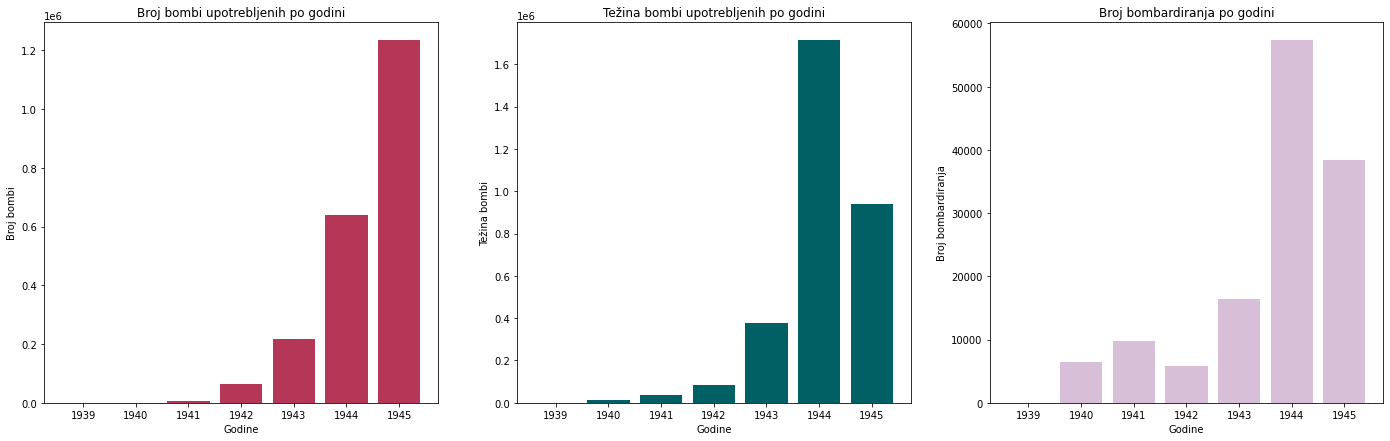

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24,7))
axes[0].bar(bomb_time_expl['MissionDate'], bomb_time_expl['Bombs'], color=colrs[0]);
axes[1].bar(bomb_time_expl['MissionDate'].apply(str), bomb_time_expl['TotalWeight'], color=colrs[3]);
axes[2].bar(bomb_time_expl['MissionDate'].apply(str), bomb_time_expl['Sum'], color=colrs[4]);
axes[0].set_title("Number of bombs used per year")
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Number of bombs')
axes[1].set_title("Weight of bombs used per year")
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Weight of bombs');
axes[2].set_title("Number of bombings per year")
axes[2].set_xlabel('Years')
axes[2].set_ylabel('Number of bombings');

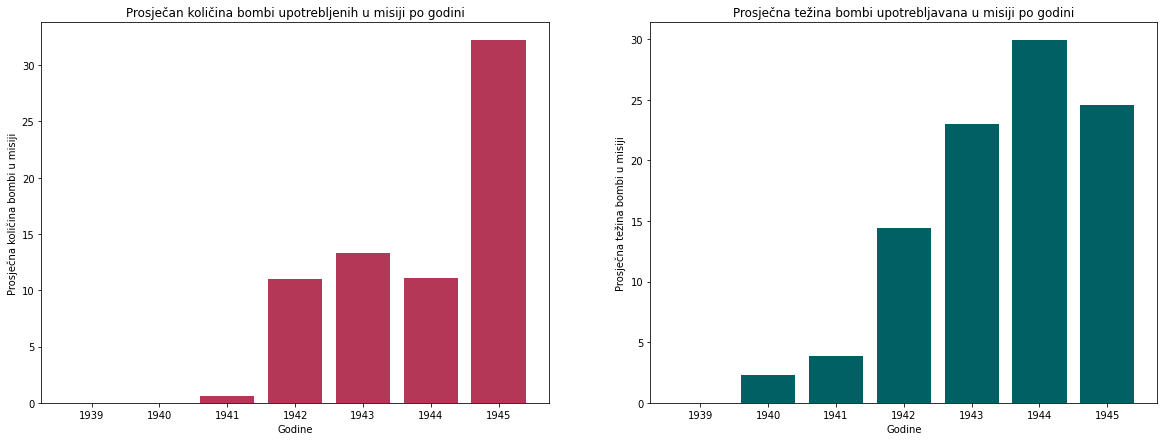

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
axes[0].bar(bomb_time_expl['MissionDate'], (bomb_time_expl['Bombs']/bomb_time_expl["Sum"]), color=colrs[0]);
axes[1].bar(bomb_time_expl['MissionDate'].apply(str), (bomb_time_expl['TotalWeight'] /bomb_time_expl["Sum"]), color=colrs[3]);
axes[0].set_title("Average amount of bombs used in a mission per year")
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Average amount of bombs in the mission')
axes[1].set_title("Average weight of bombs used in a mission per year")
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Average bomb weight in mission');

In the first three graphs, we observe the amount of ammunition expended per year, total ammunition weight, and the number of bombings, respectively. The ammunition quantity was highest in 1945, the most explosive tons were in 1944, and the highest number of bombings occurred in 1944 as well. Similarly, the average ammunition quantity used per mission per year peaked in 1945, whereas in 1944, it ranks third in terms of explosive tonnage per year. The average explosive weight used per mission per year was highest in 1944.

From this, we can infer that the heaviest ammunition was used at the beginning of the war and then in 1944. The lightest ammunition was used in 1945, the final year of the war. Perhaps this is due to new technologies and significant investments in innovations during that time or because of high demand and insufficient resources, especially in 1945, after the depletion in 1944.

## 4.8. Which countries bombed which countries as targets? Calculate the weight of ammunition used against the 10 most frequently targeted countries. Which type of bombs was most commonly used against each country? Which type of fuses and fragmentation devices were most commonly used against each country?

In [ ]:
## which countries bombed which countries target with groupby
# number = df[["Country", "TargetCountry"]]
# number=number.groupby(['TargetCountry','Country']).count()
# print("Which countries bombed each country:")
# number
# or using crosstab
pd.crosstab( df['Country'], df['TargetCountry'], margins=True)

TargetCountry  "PAPUA NEW GUINEA, MANUS ISLAND"  ALBANIA  ALEUTIAN ISLANDS  \
Country                                                                      
AUSTRALIA                                     0        0                 0   
GREAT BRITAIN                                 0      107                 0   
NEW ZEALAND                                   0        0                 0   
SOUTH AFRICA                                  0        0                 0   
USA                                           3       21               231   
All                                           3      128               231   

TargetCountry  ALGERIA  ANDAMAN ISLANDS  AUSTRALIA  AUSTRIA  BALI  BELGIUM  \
Country                                                                      
AUSTRALIA            0                0          3        0     0        0   
GREAT BRITAIN        1                2          0       12     0     1005   
NEW ZEALAND          0                0          0        0     0        0   
SOUTH AFRICA         0                0          0        0     0        0   
USA                  0                6          0     2135    19       31   
All                  1                8          3     2147    19     1036   

TargetCountry  BISMARK ARCHIPELAGO  BORNEO  BOUGAINVILLE  BULGARIA  BURMA  \
Country                                                                     
AUSTRALIA                       26       0             0         0      0   
GREAT BRITAIN                    0       0             0        16    870   
NEW ZEALAND                    233       6            21         0      0   
SOUTH AFRICA                     0       0             0         0      0   
USA                           3178    1398             0        67   6850   
All                           3437    1404            21        83   7720   

TargetCountry  CAROLINE ISLANDS  CELEBES ISLANDS  CHINA  CORAL SEA AREA  \
Country                                                                   
AUSTRALIA                     0                1      0               0   
GREAT BRITAIN                 0                0      0               0   
NEW ZEALAND                   0                0      0               0   
SOUTH AFRICA                  0                0      0               0   
USA                        1018             3078   3961              30   
All                        1018             3079   3961              30   

TargetCountry  CORSICA  CRETE  CYPRUS  CZECHOSLOVAKIA  DENMARK  EGYPT  \
Country                                                                 
AUSTRALIA            0      0       0               0        0      0   
GREAT BRITAIN        0     65       9              36       49     18   
NEW ZEALAND          0      0       0               0        0      0   
SOUTH AFRICA         0      1       0               0        0      0   
USA                  2     36       0             458        6     79   
All                  2    102       9             494       55     97   

TargetCountry  ERITREA  ETHIOPIA  ETHIOPIA/ABSINNYA  FORMOSA  \
Country                                                        
AUSTRALIA            0         0                  0        0   
GREAT BRITAIN       22        16                  2        0   
NEW ZEALAND          0         0                  0        0   
SOUTH AFRICA         1        11                  0        0   
USA                  0         0                  0        1   
All                 23        27                  2        1   

TargetCountry  FORMOSA AND RYUKYU ISLANDS  FRANCE  FRENCH INDO CHINA  \
Country                                                                
AUSTRALIA                               0       0                  0   
GREAT BRITAIN                           0    4429                  0   
NEW ZEALAND                             0       0                  0   
SOUTH AFRICA                            0       0                  0   
US

In the above display, we've swapped the axes for easier viewing. We can see that Australia and New Zealand targeted countries in the PTO, with Australia attacking New Guinea the most (127 times) and Sulawesi the least (1), totaling 314 attacks. New Zealand was slightly more active (631 attacks), focusing most frequently (259 times) on New Ireland, which is now part of Papua New Guinea. South Africa participated only a few times (19), mainly in the African region.

The US (73193 attacks) and the UK (30051 attacks) were active almost everywhere, with their highest activity in Europe. It's interesting to note that only the US operated in Japan, as well as in many other countries (such as Bali, China, the Federation of Malaya, etc.). It's also interesting to observe that the US predominantly targeted islands that other countries did not. Perhaps this is because they already had a strong navy at that time, the strongest among the allies, and they were the only ones with interests in certain Pacific islands.

Although we reach the same conclusions as with the bombings by regions, here we have a more detailed picture of the exact targeted countries by which country.

In [ ]:
# extract interesting columns
counted = df[["TargetCountry", "TotalWeight"]]
# group by country, count the number of appearances of the attacked country and add up the total weights
counted = counted.groupby(['TargetCountry']).agg({'TargetCountry': ['count'], 'TotalWeight': ['sum']}).reset_index()
# sort descending and rename newly created columns
counted = counted.sort_values(by=('TargetCountry', 'count'), ascending=False).rename(columns={'': "Country"}).head(10)
counted

TargetCountry          TotalWeight
                Country  count           sum
32              GERMANY  44252  1.484649e+06
29               FRANCE  13959  5.581580e+05
41                ITALY  13020  2.578791e+05
63   PHILIPPINE ISLANDS   7986  6.182935e+04
13                BURMA   7720  3.423158e+04
58           NEW GUINEA   7068  6.288843e+04
16                CHINA   3961  1.170735e+04
9   BISMARK ARCHIPELAGO   3437  2.882853e+04
15      CELEBES ISLANDS   3079  1.943500e+04
56          NETHERLANDS   3074  3.897025e+04

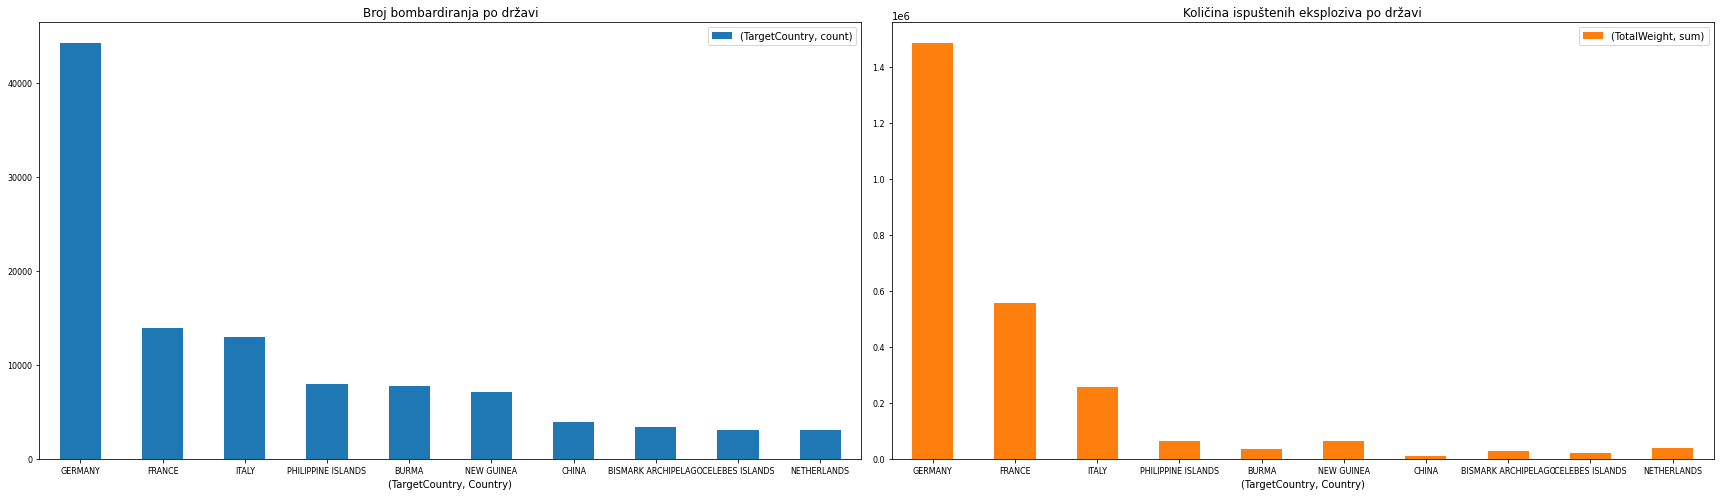

In [ ]:
counted.plot(kind='bar', subplots=True, x=("TargetCountry", "Country"),
             rot=0, figsize=(24, 7), layout=(1, 2), fontsize=8,
             title=["Number of bombings per country",
                    "Amount of dropped explosives per country"])
plt.tight_layout();

A vast amount of explosives was dropped on Germany on numerous occasions. Following Germany, France, which was occupied by Germany, comes next. Then fascist Italy, which was bombed several times but with slightly less explosives. Other countries were bombed significantly fewer times with much less explosives. China is interesting in that it was bombed more frequently but with a smaller amount of explosives.

In [ ]:
# Which bomb was most often used against which country
# group by target countries and find the bomb that has the highest frequency of occurrence
plain_country = pd.DataFrame(df.groupby(['TargetCountry']).apply(lambda x: x['HighExplosivesType'].value_counts().index[0]))
# add number
plain_country = pd.concat([plain_country, df.groupby(['TargetCountry']).apply(lambda x: x['HighExplosivesType'].value_counts().max())], axis=1).reset_index()
# column names
cols= ["TargetCountry", "HighExplosivesType", "Count"]
plain_country.columns = cols
# sort by size
plain_country = plain_country.sort_values(by="Count", ascending = False).reset_index().drop(columns=["index"], axis=1)
plain_country.head()

TargetCountry      HighExplosivesType  Count
0           NEW GUINEA  500 LB GP (GP-M43/M64)   2838
1                BURMA  500 LB GP (GP-M43/M64)   2692
2   PHILIPPINE ISLANDS  500 LB GP (GP-M43/M64)   2144
3                CHINA  500 LB GP (GP-M43/M64)   1320
4  BISMARK ARCHIPELAGO  500 LB GP (GP-M43/M64)   1272

In [ ]:
# group by type of explosives and count frequently used explosives as desired
plain_county_max = plain_country.groupby("HighExplosivesType").count().sort_values(by="Count", ascending=False).drop(columns="TargetCountry").reset_index()
plain_county_max

HighExplosivesType  Count
0   500 LB GP (GP-M43/M64)     35
1                        0     23
2       250 LB GP (GP-M57)     13
3  1000 LB GP (GP-M44/M65)      4
4       100 LB GP (GP-M30)      2
5        300 LB GP (GP-31)      2
6                 32 LB GP      1
7       600 LB GP (GP-M32)      1
8            DEPTH CHARGES      1

In [ ]:
# Which fragmentation device was most often used against which country
# group by target countries and find the fragmentation device that has the highest frequency of occurrence
plain_country_frag = pd.DataFrame(df.groupby(['TargetCountry']).apply(lambda x: x['FragmentationDevicesType'].value_counts().index[0]))
# add number
plain_country_frag = pd.concat([plain_country_frag, df.groupby(['TargetCountry']).apply(lambda x: x['FragmentationDevicesType'].value_counts().max())], axis=1).reset_index()
# column names
cols= ["TargetCountry", "FragmentationDevicesType", "Count"]
plain_country_frag.columns = cols
# sort by size
plain_country_frag = plain_country_frag.sort_values(by="Count", ascending = False).reset_index().drop(columns=["index"], axis=1)
plain_country_frag.head(n=10)

TargetCountry      FragmentationDevicesType  Count
0          PHILIPPINE ISLANDS                   260 LB FRAG    546
1                       CHINA    69 LB FRAG (3X23 CLUSTERS)    501
2  FORMOSA AND RYUKYU ISLANDS   120 LB FRAG (6X20 CLUSTERS)    273
3                       BURMA   120 LB FRAG (6X20 CLUSTERS)    188
4   VOLCANO AND BONIN ISLANDS   120 LB FRAG (6X20 CLUSTERS)    161
5                  NEW GUINEA                    20 LB FRAG    146
6             CELEBES ISLANDS   120 LB FRAG (6X20 CLUSTERS)    141
7             SOLOMON ISLANDS   120 LB FRAG (6X20 CLUSTERS)    139
8         BISMARK ARCHIPELAGO   120 LB FRAG (6X20 CLUSTERS)    115
9                       JAPAN  400 LB FRAG (20X20 CLUSTERS)    111

In [ ]:
# group by fragmentation device and count the most frequently used frag. devices as desired
plain_country_frag_max = plain_country_frag.groupby("FragmentationDevicesType").count().sort_values(by="Count", ascending=False).drop(columns="TargetCountry").reset_index()
plain_country_frag_max

FragmentationDevicesType  Count
0                             0     50
1   120 LB FRAG (6X20 CLUSTERS)     15
2                    20 LB FRAG      4
3                    23 LB FRAG      3
4                   260 LB FRAG      3
5    69 LB FRAG (3X23 CLUSTERS)      3
6                    40 LB FRAG      2
7   360 LB FRAG (90X4 CLUSTERS)      1
8  400 LB FRAG (20X20 CLUSTERS)      1

In [ ]:
# which type of lighter was most often used against which country
# group by target countries and find the lighter that has the highest frequency of occurrence
plain_country_idt = pd.DataFrame(df.groupby(['TargetCountry']).apply(lambda x: x['IncendiaryDevicesType'].value_counts().index[0]))
# add number
plain_country_idt = pd.concat([plain_country_idt, df.groupby(['TargetCountry']).apply(lambda x: x['IncendiaryDevicesType'].value_counts().max())], axis=1).reset_index()
# column names
cols= ["TargetCountry", "IncendiaryDevicesType", "Count"]
plain_country_idt.columns = cols
# sort by size
plain_country_idt = plain_country_idt.sort_values(by="Count", ascending = False).reset_index().drop(columns=["index"], axis=1)
plain_country_idt.head(10)

TargetCountry             IncendiaryDevicesType  Count
0          PHILIPPINE ISLANDS  1000 LB AUX FUEL TANK INCENDIARY    568
1                       JAPAN                 400 LB INCENDIARY    274
2                       BURMA   500 LB AUX FUEL TANK INCENDIARY    241
3  FORMOSA AND RYUKYU ISLANDS                 500 LB INCENDIARY    165
4         BISMARK ARCHIPELAGO                 500 LB INCENDIARY    125
5                       CHINA   500 LB AUX FUEL TANK INCENDIARY    119
6                      BORNEO  1000 LB AUX FUEL TANK INCENDIARY     98
7             CELEBES ISLANDS                 500 LB INCENDIARY     60
8             SOLOMON ISLANDS                 500 LB INCENDIARY     34
9                  NEW GUINEA                   4 LB INCENDIARY     33

In [ ]:
# group by lighter and count frequently used lighters as desired
plain_country_idt_max = plain_country_idt.groupby("IncendiaryDevicesType").count().sort_values(by="Count", ascending=False).drop(columns="TargetCountry").reset_index()
plain_country_idt_max

IncendiaryDevicesType  Count
0                          10 LB INCENDIARY     46
1                         500 LB INCENDIARY      9
2                           4 LB INCENDIARY      8
3                         100 LB INCENDIARY      4
4           500 LB AUX FUEL TANK INCENDIARY      3
5          1000 LB AUX FUEL TANK INCENDIARY      2
6                         111 LB INCENDIARY      2
7              100 LB WP (WHITE PHOSPHROUS)      1
8               136 LB (38X4 CLUSTERS) I-M6      1
9                                     20 LB      1
10        228 LB (38X6 CLUSTERS) INCENDIARY      1
11  360 LB (60X6 CLUSTERS) INCENDIARY I-M13      1
12                        400 LB INCENDIARY      1
13       660 LB AUX FUEL TANK AS INCENDIARY      1
14                                        X      1

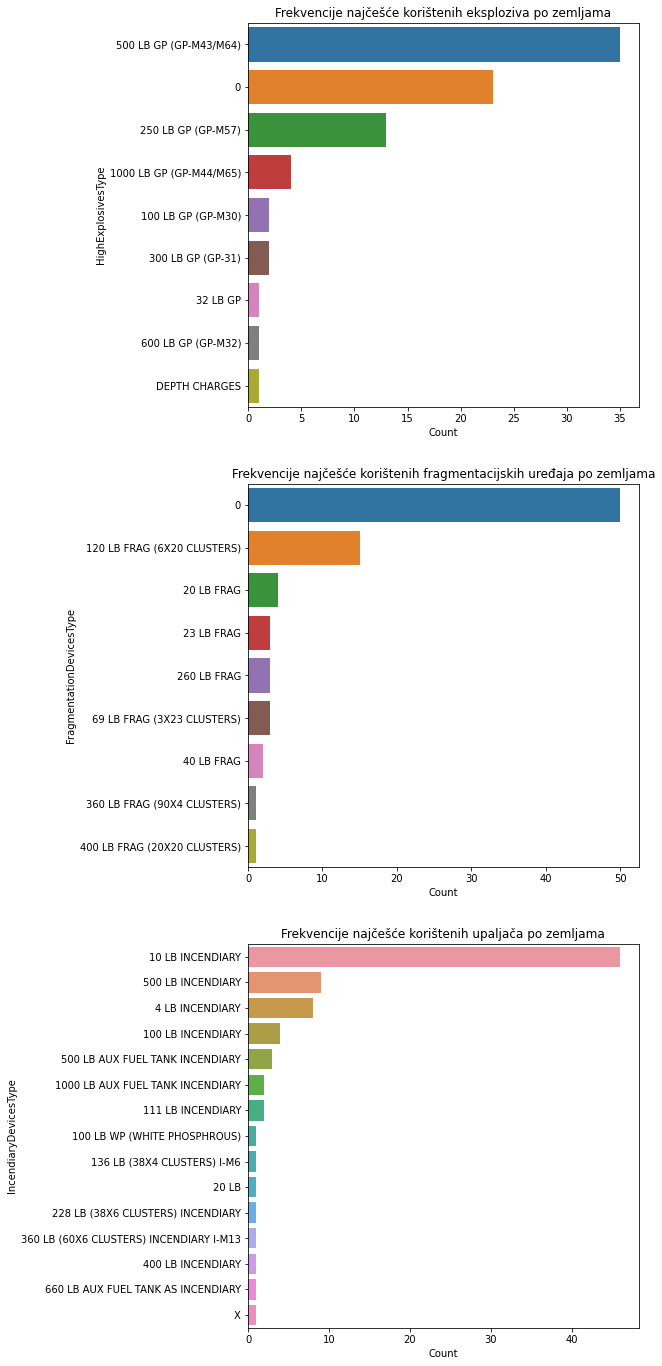

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(7, 24))
sns.barplot(x=plain_county_max["Count"], y=plain_county_max["HighExplosivesType"], ax = axes[0])
sns.barplot(x=plain_country_frag_max["Count"], y=plain_country_frag_max["FragmentationDevicesType"], ax = axes[1])
sns.barplot(x=plain_country_idt_max["Count"], y=plain_country_idt_max["IncendiaryDevicesType"], ax = axes[2])
axes[0].set_title("Frequencies of the most frequently used explosives by country")
axes[1].set_title("Frequencies of the most frequently used fragmentation devices by country")
axes[2].set_title("Frequencies of the most commonly used lighters by country");

Here we see that the most common bomb used was the 500 LB GP (GP-M43/M64), and after that, 0 (not used).

[**500LB:**](https://harringtonmuseum.org.uk/an-m64/)

> <img src="https://wiki.warthunder.com/images/thumb/e/e9/AN-M64A1.png/300px-AN-M64A1.png" width=260px>

>This American-designed bomb was particularly suitable against ammunition depots, railway engines and cars, aircraft on the ground, all kinds of structures, and light surface vessels. Bombs were usually filled with TNT or Amatol, but the AN-M64A1 bomb was filled with TNT or Composition B. The total weight of the heavier Composition B-filled bomb was 535 lbs, of which 274 lbs was explosive. Therefore, the filling-to-weight ratio was 51%. Bombs filled with TNT had a filling weight of 267 lbs with an Amatol filling of 262 lbs.

<br/>

Fragmentation devices were not used in most recorded cases. When they were used, the most common were 120 LB FRAG (6X20 CLUSTERS). We couldn't find the exact fragmentation device. However, for visual impression, we added an example of one fragmentation device.

> 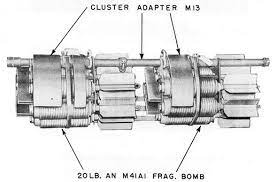


From the lighter, the most commonly used is the 10 LB INCENDIARY. An example of a lighter is given below:

><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRelb1qZnBT6Kmvp_SQdBmsbTSV-AUlvvvhPQ&usqp=CAU" height=200/>

## 4.9. Translated to English: "What are all the air forces of a particular country composed of and how many times have they participated in operations? What is the most common bomber for each unit? Which unit is sent on what priorities?"

In [ ]:
# extract interesting columns
air_force=df[['AirForce','Country']]
# group by country and count the number of all forces
air_force = pd.DataFrame(air_force.groupby(['Country']).apply(lambda x: x['AirForce'].value_counts()))
# rename newly created columns
air_force = air_force.reset_index().rename(columns={"AirForce": "Counts", "level_1": "AirForce"})
# change the data type so it can be compared
air_force["Counts"] = air_force["Counts"].astype('int64')
# take only those values ​​greater than 0 to shrink the table
air_force = air_force[air_force.Counts > 0]
# group for nice printing
air_force.groupby(["Country"]).apply(lambda a: a.reset_index()).drop(columns=["index","Country"])

AirForce  Counts
Country                           
AUSTRALIA     0       RAAF     313
              1   RAAF/NEI       1
GREAT BRITAIN 0        RAF   30051
NEW ZEALAND   0      RNZAF     631
SOUTH AFRICA  0       SAAF      19
USA           0       5 AF   18668
              1      12 AF    9823
              2      13 AF    6624
              3       8 AF    6479
              4       7 AF    6472
              5      10 AF    6397
              6       9 AF    5850
              7      15 AF    5196
              8      14 AF    4470
              9      20 AF    2458
              10     11 AF     406
              11     1 TAC     311

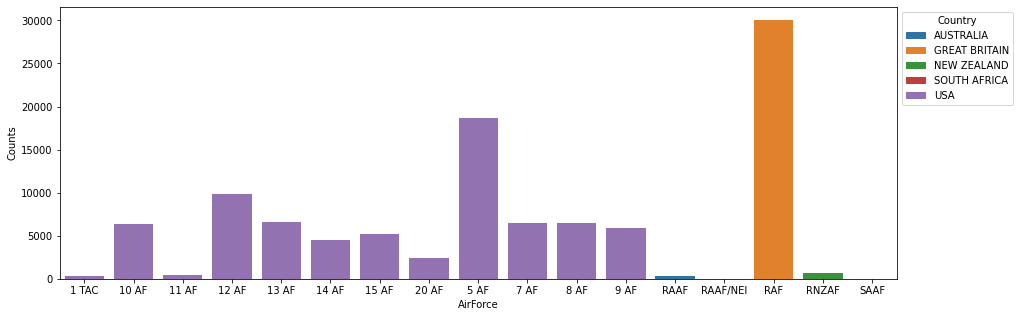

In [ ]:
# display all air forces by country
plt.figure(figsize=(15, 5))
sns.barplot(data=air_force, x='AirForce', y='Counts', hue='Country', dodge=False,)
plt.legend(title='Country', bbox_to_anchor=(1, 1),loc='upper left');

The USA has the highest number of air force units, which is not unexpected. The Royal Air Force of Great Britain has conducted the largest number of attacks, but if you were to add up all the attacks by individual units of the US Air Force, you would get a far larger number than that from Great Britain. The 5th Air Force of the US Air Force was the most active American air force. The Australian, New Zealand, and South African air forces cannot even be compared with the figures of the two previously mentioned countries.

In [ ]:
# which bomber is most used for a particular unit
# group by unit and find the plane series that has the highest frequency of occurrence
plain_country = pd.DataFrame(df.groupby(['AirForce']).apply(lambda x: x['AircraftSeries'].value_counts().index[0]))
# add that number too
plain_country = pd.concat([plain_country, df.groupby(['AirForce']).apply(lambda x: x['AircraftSeries'].value_counts().max())], axis=1).reset_index()
# column names
cols= ["AirForce", "AircraftSeries", "Count"]
plain_country.columns = cols
# sort by size
plain_country = plain_country.sort_values(by="Count", ascending = False).reset_index().drop(columns=["index"], axis=1)
plain_country

AirForce AircraftSeries  Count
0        RAF           WELL   6127
1       5 AF            B24   5965
2       7 AF            B24   3699
3      13 AF            B24   3651
4       8 AF            B17   2671
5      20 AF            B29   2458
6      12 AF            B25   2383
7      15 AF            B24   2365
8      10 AF            P47   1810
9       9 AF            B17   1661
10     14 AF            P51   1379
11     RNZAF            F4U    360
12     11 AF            B24    226
13      RAAF         HUDSON    161
14     1 TAC            B17    133
15      SAAF           JU86      5
16  RAAF/NEI            B25      1

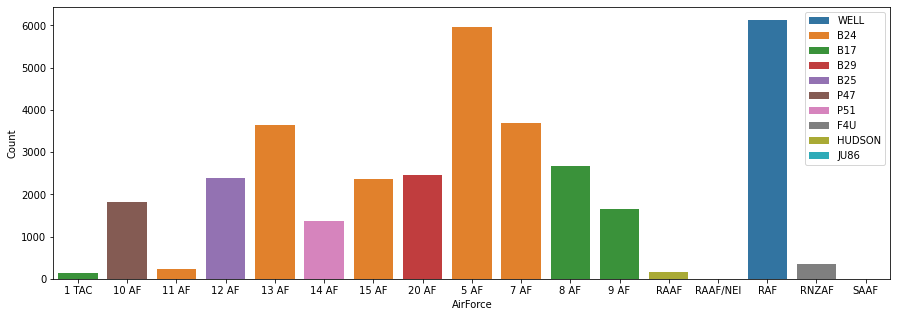

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=plain_country, x='AirForce', y='Count', hue='AircraftSeries', dodge=False)
plt.legend(loc='upper right');

Here we see that for Great Britain (RAF air unit), the most commonly used aircraft was the [Vickers Wellington](https://en.wikipedia.org/wiki/Vickers_Wellington), a British twin-engine medium to long-range bomber. The most active American air force (5AF) used the previously described B24. From here, we can also conclude that the B24 was one of the most used aircraft because the highest number of their air forces used that plane.

We have already described some of these aircraft earlier, so we will not describe them here.

In [ ]:
# which unit had which priorities
# group by units and find the mission with the highest frequency
plain_country = pd.DataFrame(df.groupby(['AirForce']).apply(lambda x: x['MissionType'].value_counts().index[0]))
# add number
plain_country = pd.concat([plain_country, df.groupby(['AirForce']).apply(lambda x: x['MissionType'].value_counts().max())], axis=1).reset_index()
# column names
cols= ["AirForce", "MissionType", "Count"]
plain_country.columns = cols
# sort by size
plain_country = plain_country.sort_values(by="Count", ascending = False).reset_index().drop(columns=["index"], axis=1)
plain_country=plain_country[plain_country.Count>0]
plain_country

AirForce MissionType  Count
0      5 AF           1  10172
1     13 AF           1   4689
2      7 AF           1   4680
3     10 AF           1   3149
4     14 AF          10   1985
5     20 AF           1   1916
6      RAAF           1    309
7     11 AF           1    291
8     RNZAF           1    140
9  RAAF/NEI           1      1

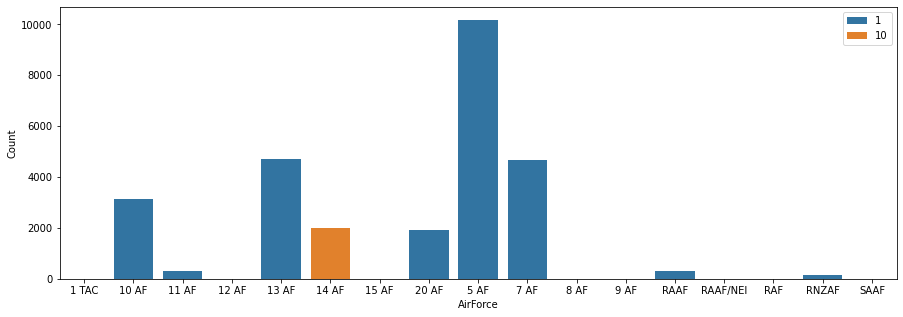

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=plain_country, x='AirForce', y='Count', hue='MissionType', dodge=False)
plt.legend(loc='upper right');

Here we see that mostly the highest-priority targets are recorded, the priorities of the first level. We have already seen that the 5AF was the most active air force, and as such, it will certainly be sent the most times to the first priority. It's interesting to note that the 14AF was mostly sent to the lowest priorities. We assume that priorities were linked to the experience and equipment of a particular unit, so less experienced units were sent to lower priorities.

As for other countries and the priorities of their forces, we see that the US doesn't have as much data on this.

## 4.10. Find all bombings in the area of Yugoslavia and visualize them on a geographical map over time (in years). Find all bombings in the area of present-day Croatia.

We are interested in the number of bombings in the area of Yugoslavia ("YUGOSLAVIA") because it included the territory of present-day Croatia.

In [ ]:
# number of recorded attacks on Yugoslavia
df[df.TargetCountry == "YUGOSLAVIA"].shape[0]

698

In [ ]:
# attacks on Yugoslavia where latitude and altitude are available
df_yugoslavia = df[(df.TargetCountry=="YUGOSLAVIA") &
                   (df.TargetLatitude.notnull()) &
                   (df.TargetLongitude.notnull())][["TargetCountry", "TargetCity", "TargetLatitude", "TargetLongitude", "MissionDate"]]
# extract year from date
df_yugoslavia["year"]= df_yugoslavia.MissionDate.dt.year
# sort values ​​by year
df_yugoslavia = df_yugoslavia.drop("MissionDate", axis=1).sort_values("year", ascending=True)

In [ ]:
# let's see what that data looks like
df_yugoslavia

TargetCountry              TargetCity  TargetLatitude  TargetLongitude  \
81693     YUGOSLAVIA                KATARINE           45.13            16.38   
81695     YUGOSLAVIA                KATARINE           45.13            16.38   
81694     YUGOSLAVIA                KATARINE           45.13            16.38   
80086     YUGOSLAVIA           STRUMICA AREA           41.44            22.71   
80085     YUGOSLAVIA  STRUMICA - DOIRAN ROAD           41.44            22.71   
...              ...                     ...             ...              ...   
154022    YUGOSLAVIA              STEINBRUCK           46.10            15.18   
154021    YUGOSLAVIA              STEINBRUCK           46.10            15.18   
154020    YUGOSLAVIA              STEINBRUCK           46.10            15.18   
159854    YUGOSLAVIA                    BROD           45.15            18.02   
178196    YUGOSLAVIA                 MARIBOR           46.57            15.63   

        year  
81693   1941  
81695   1941  
81694   1941  
80086   1941  
80085   1941  
...      ...  
154022  1945  
154021  1945  
154020  1945  
159854  1945  
178196  1945  

[687 rows x 5 columns]

In [ ]:
# count the number of attacks per year
pd.crosstab(index=df_yugoslavia["year"], columns='count').sort_values(by="year")

col_0  count
year        
1941       6
1943      45
1944     514
1945     122

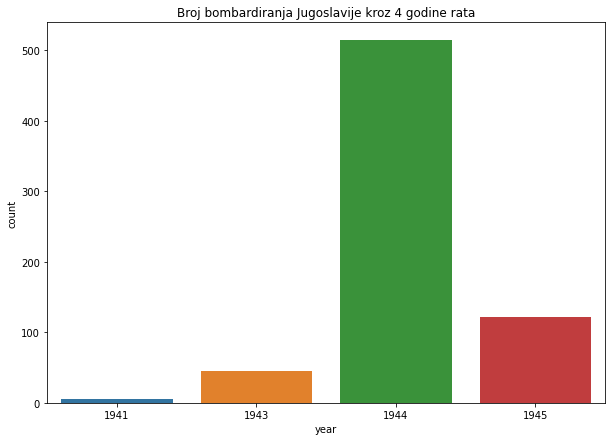

In [ ]:
# make a bar chart of the number of attacks per year
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x=df_yugoslavia["year"].sort_values());
ax.set_title("Number of bombings in Yugoslavia during 4 years of war");

In the dataset, there are 698 records for Yugoslavia. Among these 698 records, the majority come from the year 1944 (with over 500 recorded incidents), followed by 1945 (122 records) and 1943 (45 records), with the fewest from 1941 (6 records). It seems there are no records from 1939, 1940, and 1942. Below, we will see how this number varies across cities.

In [ ]:
# count the number of attacks per year by city in Yugoslavia
bomb_city = pd.crosstab( df_yugoslavia["TargetCity"],df_yugoslavia["year"])
bomb_city

year                 1941  1943  1944  1945
TargetCity                                 
ALIBUNAR                0     0     4     0
ANDRIJEVICA             0     0     2     0
ARAD                    0     0     3     3
BABAJEK ROAD BRIDGE     0     0     1     0
BAC                     0     0     9     0
...                   ...   ...   ...   ...
ZAPRESIC                0     0     4     0
ZAR                     0     6     6     0
ZEGRA                   0     0     2     0
ZENICA                  0     0     5     0
ZIDANI MOST             0     0     3     0

[101 rows x 4 columns]

In [ ]:
# bombing - Split
bomb_city.loc[bomb_city.index=="SPLIT"]

year        1941  1943  1944  1945
TargetCity                        
SPLIT          0     6    20     0

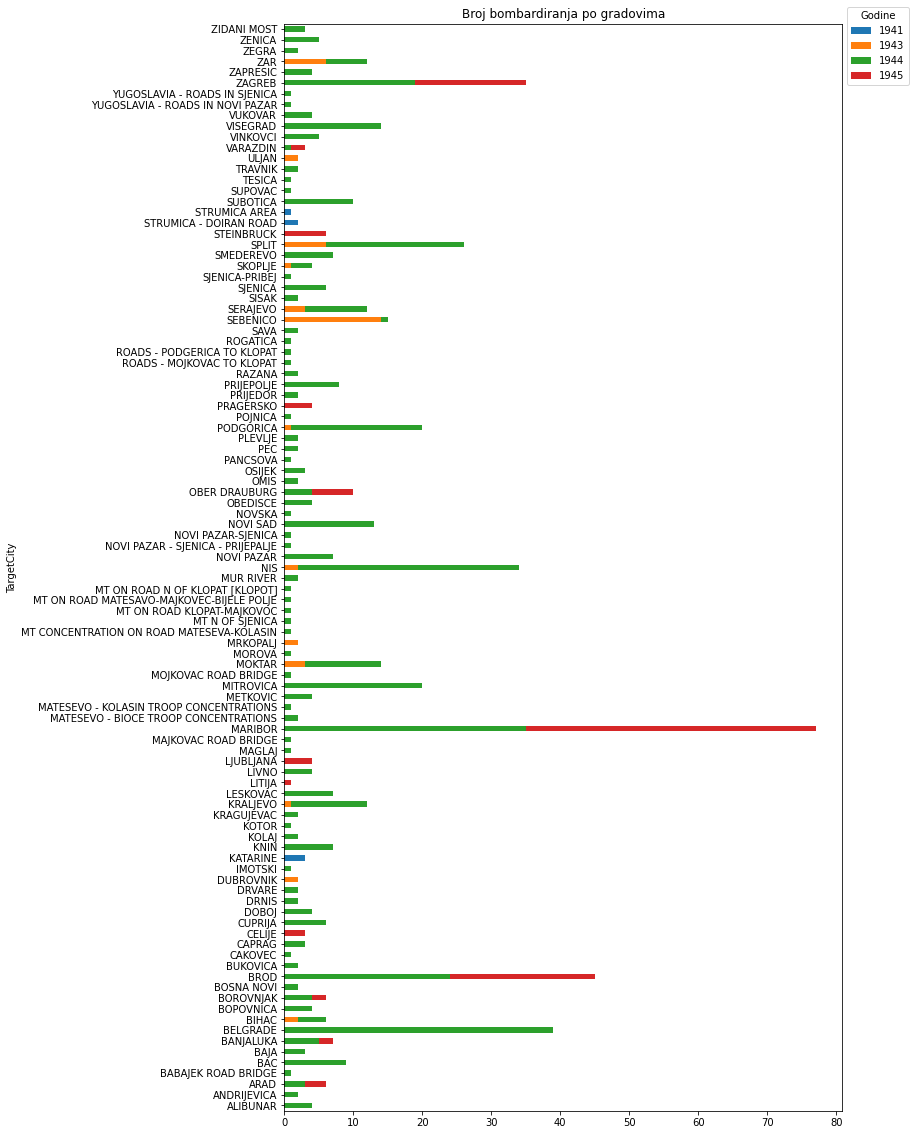

In [ ]:
# display the number of attacks per city in a stacked bar chart per year
plot = bomb_city.plot(kind="barh",stacked=True, figsize=(10, 20), title="Number of bombings by city")
plot.legend(title='Years', bbox_to_anchor=(1, 1.02),
         loc='upper left');

Overall, around 100 cities in Yugoslavia were bombed. On the stacked bar chart, we can immediately notice that some cities were targeted more than others, significantly so. We see that Maribor (now in Slovenia) was bombed the most, over 70 times. Following Maribor are Slavonski Brod, Belgrade, Niš, Zagreb, and Split. The highest number of attacks on these cities occurred in 1944 and 1945. As we study in Split, perhaps this data interests us the most. Split was bombed a total of 26 times. In 1944, it was bombed 20 times, and in 1943, 6 times.

When we have geographic data, it's convenient to display it on a map. Therefore, we will visualize these cities on a map. Additionally, the representation of bombings over time is intriguing, so we will incorporate that into the visualization as well.

In [ ]:
# geographical map
fig = go.Figure(
    data = px.scatter_geo(
        # altitude
        lon = df_yugoslavia["TargetLongitude"],
        # longitude
        lat = df_yugoslavia["TargetLatitude"],
        # animation by years
        animation_frame=df_yugoslavia['year'],
        hover_name = df_yugoslavia["TargetCity"]
    ),
)
fig.update_layout(
    # set title
    title = 'Bombings in the territory of Yugoslavia',
    # zoom in on europe
    geo_scope= "europe",
    # set autoincrement to false
    autosize=False,
    # graph width
    width=1000,
    # graph height
    height=1000,
    # margins
    margin=dict(
      l=50, # left
      r=50, # right
      b=100, # bottom
      t=100, # top
      pad=4 # padding
    ),
    geo=dict(
      resolution = 50, # graph resolution
      # centering the graph around a point
      center=dict(
          lat=44.00000,
          lon=18.294017
      ),
      # projection scale - how approximate
      projection_scale=10
    )
)
fig.show()

On the geographic map, we see that the highest number of cities were also attacked in 1944, with these attacks spread across the entire Yugoslavia. The map from 1945 is also intriguing, showing attacks concentrated in the area of present-day Slovenia.

Since the present-day territory of Croatia is mostly included in this dataset under Yugoslavia, a small portion is still under Italy (Istria). We will try to find all attacks that occurred in the territory of present-day Republic of Croatia. This will include data where the "Target Country" column has NaN values because some records might not be included.

In [ ]:
# geolocator initialization
locator = Nominatim(timeout=10, user_agent="my-application")
# retrieve all target cities, countries, latitudes and longitudes
locator_df = df[["TargetCity", "TargetCountry", "TargetLatitude", "TargetLongitude"]]
# retrieve all rows where "Target Country" is Yugoslavia, Italy or unknown
locator_df = locator_df[(locator_df.TargetCountry == "YUGOSLAVIA") | (locator_df.TargetCountry=="ITALY") | (locator_df.TargetCountry.isna())]
# dump all geo. widths and lengths containing NaN values
locator_df = locator_df.dropna(subset = ['TargetLatitude', "TargetLongitude"])
# limit the search area with the end points of today's Republic of Croatia
locator_df= locator_df[((locator_df.TargetLatitude <= 46.554881) &
                        (locator_df.TargetLatitude >= 42.392485)) &
                       ((locator_df.TargetLongitude <= 19.446244) &
                        (locator_df.TargetLongitude >= 13.207168))]
locator_df["city"]=np.nan
locator_df["country"]=np.nan
locator_df.shape

(767, 6)

In [ ]:
def find_loc(row):
    # coordinates
    coordinates = str(row.TargetLatitude)+ ", " + str(row.TargetLongitude)
    # set the coordinates in the locator
    location = locator.reverse(coordinates, language="en")
    try:
      # try to retrieve "address" - the name of the location
      address = location.raw['address']
      # get the city from the address
      city ​​= address.get('city', '')
      # get the country from the address
      country = address.get('country', '')
      # put address and country in df
      row["city"] = city
      row["country"] = country
      # return modified row
      return row
    except:
      # restore the order from the beginning
      return row
locator_df = locator_df.apply(find_loc, axis=1)

In [ ]:
# find all those who are in today's Croatia
locator_df = locator_df[locator_df["country"]=="Croatia"]
# count the frequencies of all values
bomb_city_cro = locator_df.city.value_counts().reset_index()
# put "Not Known" in the empty field
bomb_city_cro.loc[0, 'index'] = "Not Known"
bomb_city_cro

index  city
0     Nije Poznato    73
1        Grad Pula    56
2   Slavonski Brod    45
3           Zagreb    35
4           Rijeka    33
5            Split    26
6          Šibenik    15
7            Zadar    12
8         Vinkovci     5
9       Grad Sisak     5
10        Varaždin     3
11  Grad Dubrovnik     2

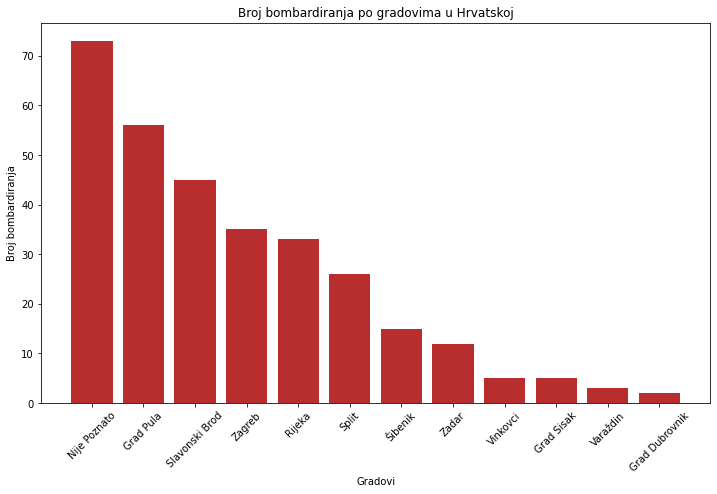

In [ ]:
# bar graph of bombing by cities in the Republic of Croatia ww2
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(bomb_city_cro["index"], bomb_city_cro["city"], color='#B82E2E')
ax.set_title("Number of bombings by cities in Croatia")
ax.set_xlabel('Cities')
ax.set_ylabel('Number of bombings')
ax.tick_params(axis='x', labelrotation = 45);

In [ ]:
fig = px.scatter_geo(locator_df,
                    lat=locator_df.TargetLatitude,
                    lon=locator_df.TargetLongitude,
                    hover_name="city",
)
fig.update_layout(
    # set title
    title = 'Bombings in the territory of today's Republic of Croatia',
    # zoom in on europe
    geo_scope= "europe",
    # set autoincrement to false
    autosize=False,
    # graph width
    width=1000,
    # graph height
    height=1000,
    # margins
    margin=dict(
      l=50, # left
      r=50, # right
      b=100, # bottom
      t=100, # top
      pad=4 # padding
    ),
    geo=dict(
      resolution = 50, # graph resolution
      # centering the graph around a point
      center=dict(
          lat = 44.694977,
          lon = 16.445719
      ),
      # projection scale - how approximate
      projection_scale=15
    )
)
fig.show()

Now that we have a somewhat more complete picture of the bombing in the territory of the Republic of Croatia during World War II, we can see that the Lika region and central Slavonia were the safest areas at that time. However, as is the case today, they were sparsely populated areas back then. When we have data that includes Istria, we see that cities in Istria were more heavily bombed than the rest. Rijeka, like today, was once an important port and was probably frequently attacked for that reason, as was Pula, both of which belonged to Italy, which was one of the most common targets. Similarly, we see that all major Croatian cities were mostly targeted in Croatia. This is expected because cities are centers of industry, concentrations of a larger number of people, and if you want to slow down the enemy, you want to devastate such areas.

## 4.11. Which 10 industries and 20 target types were most interesting to the attackers? What priorities did the industries have? What is the most common target type for each priority?

In [ ]:
industry = df['TargetIndustry'].value_counts().reset_index().rename(columns={"index": "TargetIndustry", "TargetIndustry": "Counts"})
industry

TargetIndustry  Counts
0                        CITIES TOWNS AND URBAN AREAS   17114
1   "RR INSTALLATIONS,  TRACKS,  MARSHALLING YARDS...   13398
2                            AIR FIELDS AND AIRDROMES    8388
3                                             BRIDGES    5221
4                                   PORTS AND HARBORS    4040
5                                    GUN EMPLACEMENTS    2386
6                            SYNTHETIC OIL REFINERIES    1987
7                         SUPPLY DUMPS AND WAREHOUSES    1762
8                               HIGHWAYS AND VEHICLES    1701
9                          V - WEAPON LAUNCHING SITES    1523
10             AIRCRAFT FACTORIES AND ASSEMBLY PLANTS    1506
11                           SUBMARINE PENS AND YARDS    1495
12                                     OIL REFINERIES    1119
13                                     TANK FACTORIES    1068
14                                    CHEMICAL PLANTS     865
15  MANUFACTURING INSTALLATIONS (NOT SPECIFICALLY ...     838
16                                NAVAL INSTALLATIONS     806
17                               TROOP CONCENTRATIONS     787
18  OIL STORAGE FACILITIES AND OTHER OIL INSTALLAT...     781
19                                WATERWAYS AND BOATS     757
20                             NATURAL OIL REFINERIES     624
21  "PUBLIC UTILITIES - ELECTRIC LIGHT AND POWER C...     584
22                       ARMAMENT AND ORDNANCE PLANTS     583
23                                VEHICLE MFG. PLANTS     577
24                                              SHIPS     469
25                                      ENGINE PLANTS     465
26  "IRON AND STEEL PRODUCTION FACILITIES,  BLAST ...     396
27                                      SHIP BUILDING     349
28                               A/C COMPONENT PLANTS     325
29           R.R. MANUFACTURING WORKS AND ROUNDHOUSES     300
30                             EXPLOSIVES MFG. PLANTS     236
31                                             MINING     205
32  TRANSPORTATION FACILITIES (NOT SPECIFICALLY ID...     188
33                               BEARINGS MFG. PLANTS     181
34                                 V-WEAPON FACTORIES     141
35                        RADIO & RADAR INSTALLATIONS      75
36                              SYNTHETIC RUBBER MFG.      75
37                    "TUGS,  BARGES,  AND SAMPANS  "      72
38                      MOVING TRAINS & ROLLING STOCK      71
39              DIRECT COOPERATION WITH GROUND FORCES      53
40                     ALUMINUM PRODUCTION FACILITIES      39
41                    ELECTRICAL PRODUCTS MFG. PLANTS      34
42                                    AIRFRAME PLANTS      33
43                               GOVERNMENT BUILDINGS      29
44                       OPTICAL PRODUCTS MFG. PLANTS      27
45                                            TUNNELS      27
46                                 LIGHT METAL PLANTS      19
47                  MACHINERY & EQUIPMENT MFG. PLANTS      19
48           RUBBER AND TIRE MANUFACTURING FACILITIES      15
49                     QUARRIES AND MINING FACILITIES      12
50                   PRECISION INSTRUMENT MFG. PLANTS       5
51               RADIO AND RADAR MANUFACTURING PLANTS       3
52                                NATURAL RUBBER MFG.       2
53                                   PROPELLER PLANTS       2

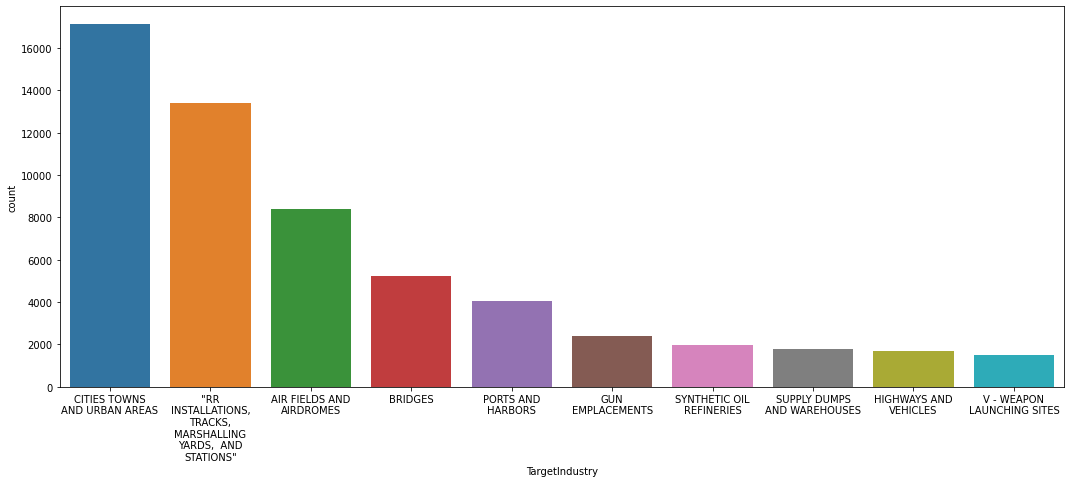

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(
    x='TargetIndustry',
    data=df,
    order = df['TargetIndustry'].value_counts().iloc[:10].index)
labels=[textwrap.fill(text,15) for text in df['TargetIndustry'].value_counts().iloc[:10].index]
plt.xticks(range(len(labels)), labels);
plt.show();

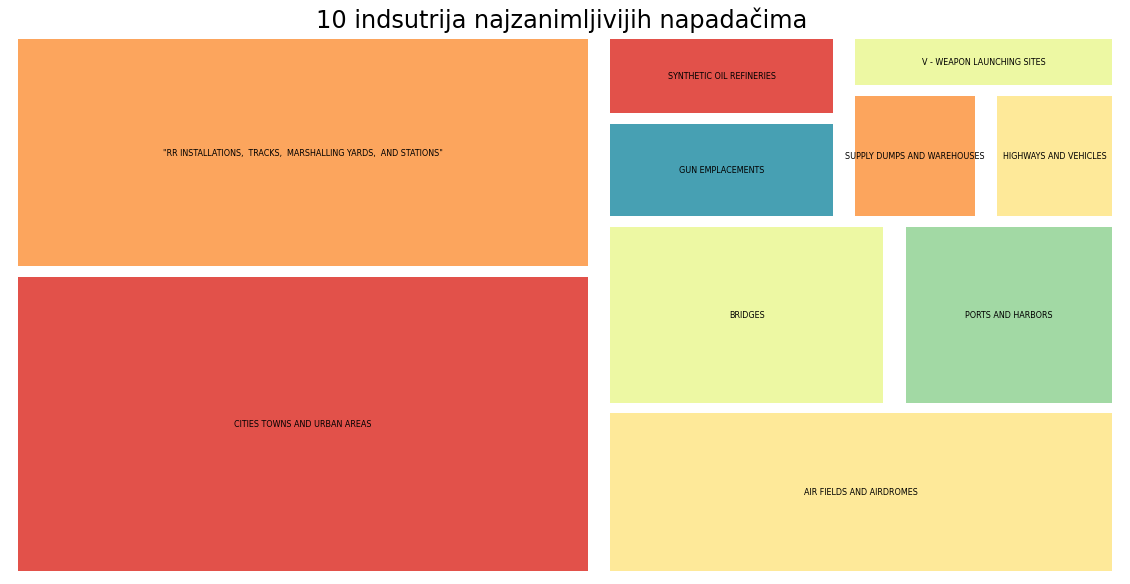

In [ ]:
industry=industry.head(n=10)
plt.figure(figsize=(20, 10))
plt.axis("off")
axis=sq.plot(industry['Counts'], label=industry['TargetIndustry'],  color=sns.color_palette('Spectral'), pad=0.1, text_kwargs={'fontsize': 8})
axis.set_title("10 industries most interesting to attackers", fontsize=24);

From the graph shown, it can be concluded that the primary targets of bombing were urban centers and areas used for transporting weapons and troops, such as airports, railways, and bridges. Naturally, these are all key infrastructures that aid enemies in advancing and developing. As mentioned earlier, by destroying key infrastructure and industries, the enemy's progress is slowed down.

In [ ]:
type_ = df['TargetType'].value_counts().reset_index().rename(columns={"index": "TargetType", "TargetType": "Counts"})
type_.head(20)

TargetType  Counts
0           CITY AREA   14769
1            AIRDROME   11353
2    MARSHALLING YARD    3799
3              BRIDGE    2436
4                TOWN    1997
5                AREA    1656
6            AIRFIELD    1582
7   MARSHALLING YARDS    1421
8          URBAN AREA    1177
9            SHIPPING    1092
10              DOCKS     975
11       OIL REFINERY     950
12          BUILDINGS     932
13          TOWN AREA     765
14             HARBOR     745
15            VILLAGE     744
16           RAILROAD     742
17    TACTICAL TARGET     717
18      GUN POSITIONS     715
19   GUN EMPLACEMENTS     700

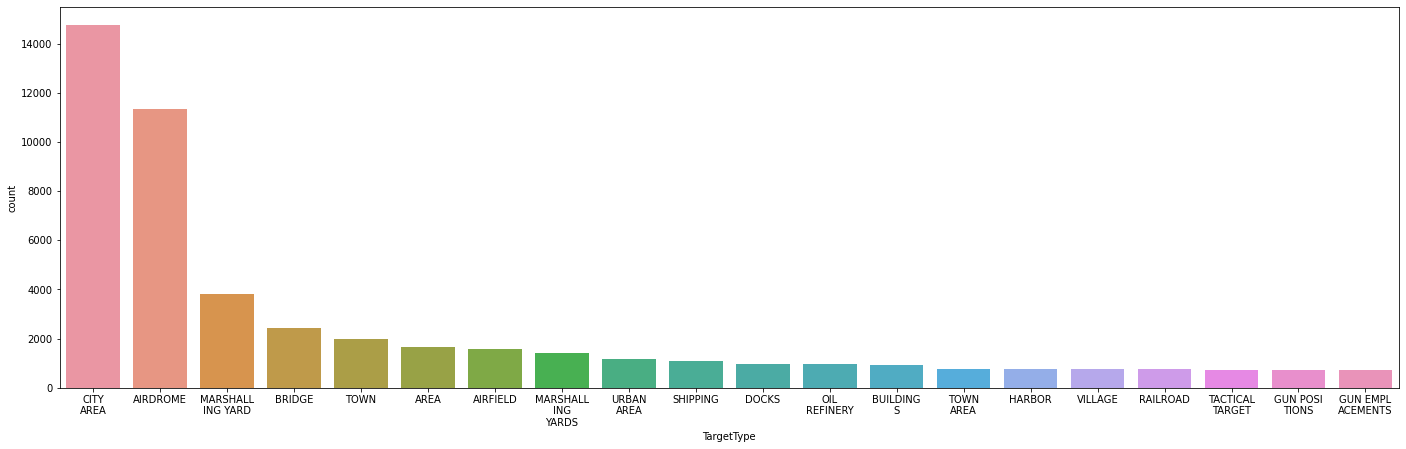

In [ ]:
plt.figure(figsize=(24, 7))
sns.countplot(
    x='TargetType',
    data=df,
    order = df['TargetType'].value_counts().iloc[:20].index)
labels=[textwrap.fill(text, 8) for text in df['TargetType'].value_counts().iloc[:20].index]
plt.xticks(range(len(labels)), labels);
plt.show();

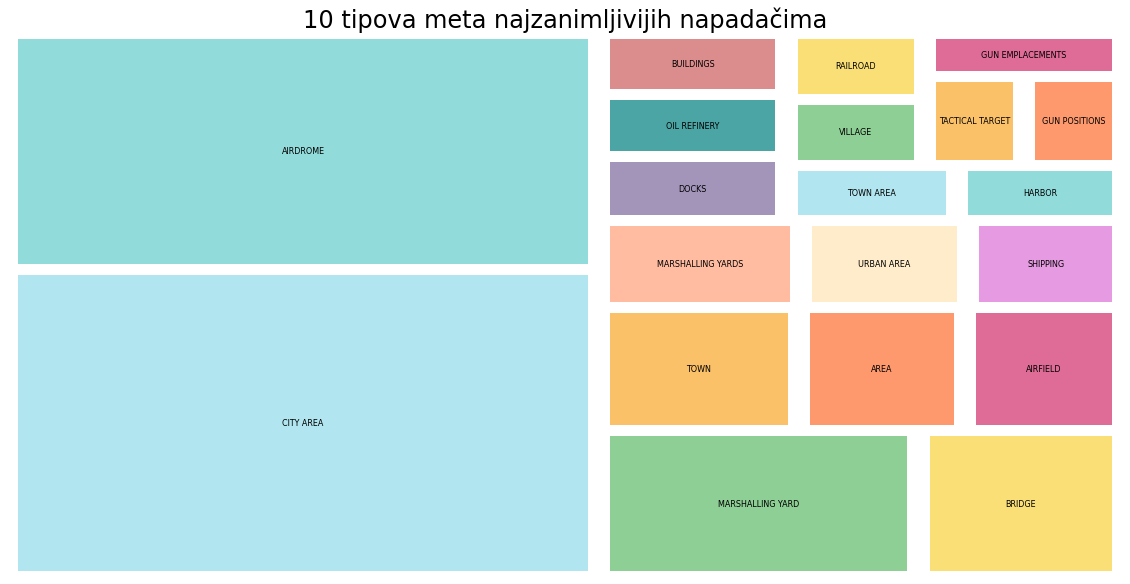

In [ ]:
type_=type_.head(n=20)
plt.figure(figsize=(20, 10))
plt.axis("off")
axis=sq.plot(type_['Counts'], label=type_['TargetType'],  color=['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30', "#D22F6A", "#FFA07A",
          "#FFE4B5", "#DA70D6", "#7C689C", "#008080","#CD5C5C"],
          pad=1, text_kwargs={'fontsize': 8}, alpha = 0.7)
axis.set_title("10 types of targets most interesting to attackers", fontsize=24);

As for the types of targets, once again, we see that the targets were key infrastructures such as airports, urban areas, bridges, etc.

In [ ]:
areas=df[['TargetPriority','TargetIndustry']]
areas.pivot_table(index=['TargetIndustry'], columns=["TargetPriority"], aggfunc='size', observed=True, fill_value=0, sort=True)

TargetPriority                                       0     1     2     3    4  \
TargetIndustry                                                                  
"IRON AND STEEL PRODUCTION FACILITIES,  BLAST F...   0    51    29    11    0   
"PUBLIC UTILITIES - ELECTRIC LIGHT AND POWER CO...   0   158     3    14   32   
"RR INSTALLATIONS,  TRACKS,  MARSHALLING YARDS,...  39  5143  3243  1141  404   
"TUGS,  BARGES,  AND SAMPANS  "                      0    20     0    13    0   
A/C COMPONENT PLANTS                                 2   273    14    16    6   
AIR FIELDS AND AIRDROMES                            14  3660   284   352  173   
AIRCRAFT FACTORIES AND ASSEMBLY PLANTS               2  1212    40    50   12   
AIRFRAME PLANTS                                      0    11     0     0    0   
ALUMINUM PRODUCTION FACILITIES                       0     0     0    14    0   
ARMAMENT AND ORDNANCE PLANTS                         6   311   152     8    0   
BEARINGS MFG. PLANTS                                 0   129    29     3    0   
BRIDGES                                             36  3516   419   310   46   
CHEMICAL PLANTS                                      6   439   128    33    3   
CITIES TOWNS AND URBAN AREAS                        38  3134   437  1164  192   
DIRECT COOPERATION WITH GROUND FORCES                6    32     1     0    0   
ELECTRICAL PRODUCTS MFG. PLANTS                      0     3     0     0    0   
ENGINE PLANTS                                        2   303    57    45    2   
EXPLOSIVES MFG. PLANTS                               0   164    19     0    2   
GOVERNMENT BUILDINGS                                 0     0     1     0    0   
GUN EMPLACEMENTS                                     6  1213    35    38   11   
HIGHWAYS AND VEHICLES                                0  1387    14    52   12   
LIGHT METAL PLANTS                                   0    10     2     0    0   
MACHINERY & EQUIPMENT MFG. PLANTS                    0     5     5     2    0   
MANUFACTURING INSTALLATIONS (NOT SPECIFICALLY I...   1   147    72   104   20   
MINING                                               0   196     8     1    0   
MOVING TRAINS & ROLLING STOCK                        0    48     0     0    0   
NATURAL OIL REFINERIES                               4   190   297    12    4   
NAVAL INSTALLATIONS                                  0   340    31    16    0   
OIL REFINERIES                                       2   980    48    20    0   
OIL STORAGE FACILITIES AND OTHER OIL INSTALLATIONS   3   354    57     6   18   
OPTICAL PRODUCTS MFG. PLANTS                         0     0    24     0    0   
PORTS AND HARBORS                                    0  1037   184    85   17   
PRECISION INSTRUMENT MFG. PLANTS                     0     0     2     3    0   
PROPELLER PLANTS                                     0     0     0     2    0   
QUARRIES AND MINING FACILITIES                       0    10     0     0    0   
R.R. MANUFACTURING WORKS AND ROUNDHOUSES             0   117    88     7    7   
RADIO & RADAR INSTALLATIONS                          0    50     0     1    0   
RUBBER AND TIRE MANUFACTURING FACILITIES             0     1     1     1    6   
SHIP BUILDING                                        0   214    77    10    0   
SHIPS                                                0   270     9    25    1   
SUBMARINE PENS AND YARDS                             0   704   253    43    5   
SUPPLY DUMPS AND WAREHOUSES                          2   932   134    26   65   
SYNTHETIC OIL REFINERIES                            18  1029   291    47   11   
SYNTHETIC RUBBER MFG.                                0    38     0     2   11   
TANK FACTORIES                                       4   348   666    20   20   
TRANSPORTATION FACILITIES (NOT SPECIFICALLY IDE...   1    95     4    19    0   
TROOP CONCENTRATIONS                                 0   642    11    15    0   
TUNNELS                        

Most industries had priority level one, and sometimes zero priority. Industries rarely went beyond priority level four. Most often, railroads, bridges, and urban areas were of zero and first priority. Of course, this is nothing new; we've already concluded why. This doesn't tell us anything new but confirms the theory we've previously outlined.

In [ ]:
type_priority = df[["TargetPriority", "TargetType"]]
type_priority = type_priority.groupby(["TargetPriority", "TargetType"]).size().reset_index().rename(columns={0: "Count"})
type_priority = type_priority.sort_values(by=["TargetPriority","Count"], ascending=False).reset_index().drop(columns="index")
type_priority = type_priority[type_priority["Count"]>0]
type_priority_ = type_priority.groupby("TargetPriority").head(1).reset_index().drop(columns="index")
type_priority_

TargetPriority        TargetType  Count
0            SAAF   FRENCH DEFENSES      5
1            RNAS          SHIPPING      3
2               9              TOWN    251
3               8          AIRDROME      2
4               7         CITY AREA      7
5               6         CITY AREA     16
6               5         CITY AREA     21
7               4  MARSHALLING YARD    253
8               3         CITY AREA    902
9               2  MARSHALLING YARD   1190
10              1          AIRDROME   7877
11              0         CITY AREA     38

In [ ]:
type_priority=type_priority.groupby("TargetPriority").head(10)

In [ ]:
fig = make_subplots(rows=1, cols=1)
step_list = type_priority.TargetPriority.unique()    # get all the uniq times for slider steps
active_step = len(step_list) - 1 # make latest time active

for step in step_list:
    df2 = (type_priority[ type_priority['TargetPriority'] == step ]).sort_values('Count')
    fig.add_trace( go.Bar(x = df2['TargetType'], y = df2['Count'], marker = dict(color = df2['Count'])))

fig.data[active_step].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict( method="update", label= step_list[i], args=[{"visible": [False] * len(fig.data)} ])
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [ dict(active=active_step, pad={"t": 50}, currentvalue={"prefix": "Active: "}, steps=steps )]
fig.update_layout(sliders=sliders,  title="Deset najčešćih tipova meta po prioritetu")


We've already mentioned something about priorities, and on the visualization, we can see up to the 10 most common types for which priorities. So, we see that sometimes infrastructures were of different priorities. And that makes sense because, for example, a bridge in Frankfurt is surely of high priority compared to a bridge in some village that is not as strategically important.

## 4.12. What is the average bombing altitude of explosive bombs for each aircraft? What is the average release altitude of individual explosive bombs? How many atomic bombs were used in World War II?

In [ ]:
print("Average bomber height at which he bombs:\n")
# take interesting columns and drop NaN values
aircrafts = df[['AircraftSeries','Altitude']].dropna()
# get all data where height is not 0
aircrafts = aircrafts[aircrafts["Altitude"] > 0]
# group by series and sum and divide by the total number
aircraft_number = aircrafts.groupby(['AircraftSeries']).sum()/aircrafts.groupby(['AircraftSeries']).count()
# sort by height
aircraft_number = aircraft_number.sort_values(by="Altitude", ascending=False).reset_index()
aircraft_number

Prosječna visina bombardera na kojoj bombardira:



AircraftSeries     Altitude
0             LGT  7754.657856
1            SB17  7189.317111
2            0B17  7126.085455
3             B17  7098.715252
4            GB17  6976.184454
5            OB17  6876.773149
6            SB24  6612.643979
7            0B24  6598.165545
8            OB24  6361.103919
9            GB24  6316.290722
10            HVY  5099.716698
11            B29  4795.964928
12           STIR  4503.472552
13            B24  4398.725257
14            B32  4330.700000
15            MED  4256.497577
16           MANC  4129.563750
17           WELL  4058.032318
18           HALI  4013.702970
19           WHIT  3837.401970
20           HAMP  3596.002958
21            LIB  3062.092903
22            B26  2971.496848
23            TOM  2590.800000
24           BLEN  2063.541493
25            A26  2035.587937
26          BEAUF  2023.872000
27            B25  1950.155929
28         HUDSON  1580.927262
29   PV-1 VENTURA  1524.000000
30       CATALINA  1455.425542
31           LB30  1371.600000
32            P61  1363.518182
33            A20  1326.408666
34           MARY  1219.200000
35            P38   865.824983
36            P47   861.080212
37            P51   753.015187
38       WIRRAWAY   731.520000
39            A36   722.339277
40            A24   686.972308
41            P40   638.238573
42           P400   609.600000
43         MOHAWK   609.600000
44            P39   594.817441
45            F06   309.776327
46           BATT   304.800000
47            P70   265.889362
48           JU86   228.600000
49          35 FG   152.400000
50          43 BG    50.800000
51            P45    30.480000

We will present 10 bombers who shot from the highest altitude.

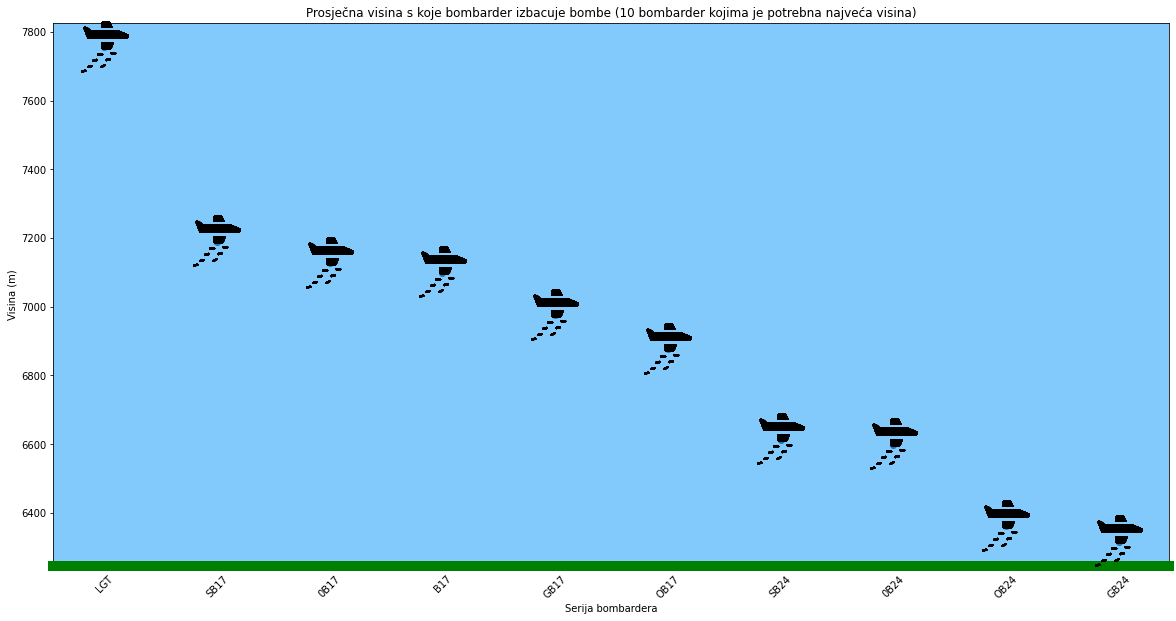

In [ ]:
# load the image
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

def show_plot(x, y, z, image, caption, xlabel):
  fig, ax = plt.subplots(figsize=(20,10))
  ax.scatter(x, y)
  # add pictures to the dots
  for x0, y0, path in zip(x, y, image):
    ab = AnnotationBbox(getImage(image, z), (x0, y0), frameon=False)
    ax.add_artist(ab)
  # change background to sky color
  ax.set_facecolor('xkcd:sky')
  # color the bottom line green
  ax.spines['bottom'].set_color('green')
  # make the bottom line bold
  ax.spines['bottom'].set_linewidth(10)
  # set title
  ax.set_title(title)
  # set x label name
  ax.set_xlabel(xlabel)
  # set the y label name
  ax.set_ylabel("Height (m)")
  # rotate the x marks by 45 degrees
  ax.tick_params(axis='x', labelrotation = 45)
  # display the graph
  plt.show();

# display the graph for the planes (first 10) that fly the highest
x=aircraft_number[:10].AircraftSeries
y=aircraft_number[:10].Altitude
# path to image
image = "6088592.png"
xlabel="Bomber Series"
title = "Average altitude from which a bomber drops bombs (10 bombers that need the highest altitude)"
show_plot(x,y, 0.1, image, title, xlabel)

Overall, we have 51 bombers with recorded altitude data. We see that LGT bombed from the greatest distance. Other aircraft in these top 10 also bomb from high altitudes, over 6 kilometers above ground. Here, they are probably long-range bombers that were less noticeable at high altitudes.

In [ ]:
print("Height from which a certain type of bomb is dropped:\n")
# get the data we are interested in
bmbs=df[['HighExplosivesType','Altitude']]
# average
bmbs_number=bmbs.groupby(['HighExplosivesType']).sum()/bmbs.groupby(['HighExplosivesType']).count()
# dump nan values
bmbs_number.dropna(inplace=True)
# dump 0
bmbs_number=bmbs_number[bmbs_number["Altitude"]>0]
# sort by height
bmbs_number=bmbs_number.sort_values(by="Altitude", ascending=False).reset_index()
bmbs_number

Visina sa koje se izbacuje pojedini tip bombe:



HighExplosivesType     Altitude
0       ATOMIC BOMB (LITTLE BOY)  9753.600000
1          ATOMIC BOMB (FAT MAN)  9144.000000
2   UNK CODE 20 110 LB EXPLOSIVE  6851.904000
3            4000 LB GP (GP-M56)  4986.921290
4        2000 LB GP (GP-M34/M66)  3407.404858
5    FLARES PYROTECHNICS(PY-M26)  3098.496716
6            1600 LB AP(AP-MK 1)  3037.840000
7             600 LB GP (GP-M32)  2914.650000
8            500 LB SAP (SA-M58)  2900.680000
9        1000 LB GP (GP-M44/M65)  2369.136121
10           1000 LB SAP(SA-M59)  2360.776194
11                         40 GP  2266.070769
12         1000 LB AP (AP-MK 33)  2255.520000
13            100 LB GP (GP-M30)  2235.283279
14             300 LB GP (GP-31)  2098.369870
15        500 LB GP (GP-M43/M64)  2075.223404
16                TORPEDOES MISC  2025.425882
17                         50 GP  1981.200000
18                     350 LB DC  1524.000000
19       2000 LB MINES (M-MK 12)  1420.368000
20            250 LB GP (GP-M57)  1146.210400
21       325 LB DC (DB-MK 17/47)   602.391892
22                             0   457.200000
23                             4    91.440000
24                            24    91.440000

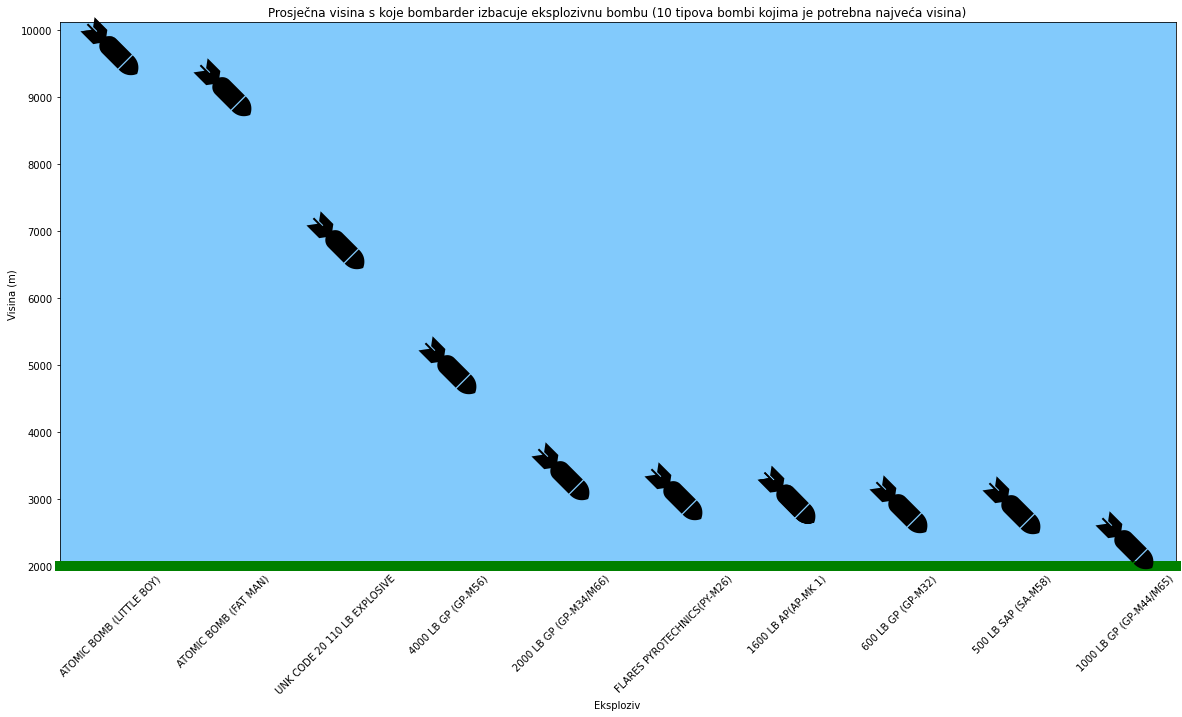

In [ ]:
# apply the above function now to explosive bombs
# path to image
image_bomb = "bomb-icon-21.png"
x=bmbs_number[:10].HighExplosivesType
y=bmbs_number[:10].Altitude
xlabel="Explosive"
title = "Average altitude from which a bomber drops an explosive bomb (10 types of bombs that need the highest altitude)"
show_plot(x,y, 0.5, image_bomb, title, xlabel)

In this display, we see that the bombs were dropped from the highest altitude were atomic bombs. They must be dropped from very high altitudes for pilot safety. We see that they were dropped from almost 10,000 meters in altitude. Following them is "UNK CODE 20 110 LB EXPLOSIVE," which is a slightly lighter bomb, but we see that heavier bombs were mostly dropped from high altitudes (perhaps for activation purposes). Next, we will take a closer look at where atomic bombs were used and which ones.

In [ ]:
df_atomic =df["HighExplosivesType"].dropna()
df_atomic = df_atomic[df_atomic.str.contains("ATOMIC") & ~df_atomic.str.contains("PUMPKIN")]
df_atomic.reset_index()

index        HighExplosivesType
0  149047  ATOMIC BOMB (LITTLE BOY)
1  149864     ATOMIC BOMB (FAT MAN)

In [ ]:
df.loc[df["HighExplosivesType"]=="ATOMIC BOMB (LITTLE BOY)"]

MissionDate TheaterofOperations Country AirForce  UnitID  \
149047  1945-08-06                 PTO     USA    20 AF  509 CG   

       AircraftSeries Callsign MissionType TakeoffBase TakeoffLocation  \
149047            B29      NaN          99         NaN             NaN   

        TakeoffLatitude  TakeoffLongitude TargetCountry TargetCity  \
149047              NaN               NaN         JAPAN  HIROSHIMA   

         TargetType TargetIndustry TargetPriority  TargetLatitude  \
149047  ATOMIC BOMB            NaN              1            34.4   

        TargetLongitude  Altitude  AirborneAircraft  AttackingAircraft  \
149047       132.466667    9753.6               NaN                1.0   

        BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
149047              NaN               NaN             NaN              NaN   

        AircraftLost  HighExplosives        HighExplosivesType  \
149047           NaN             NaN  ATOMIC BOMB (LITTLE BOY)   

        HighExplosivesWeight  IncendiaryDevices IncendiaryDevicesType  \
149047               15000.0                NaN                   NaN   

        IncendiaryDevicesWeight  FragmentationDevices  \
149047                      0.0                   NaN   

       FragmentationDevicesType  FragmentationDevicesWeight  TotalWeight  \
149047                      NaN                         0.0      15000.0   

       TimeOverTarget BombDamageAssessment  
149047            NaN                  NaN

In [ ]:
df.loc[df["HighExplosivesType"]=="ATOMIC BOMB (FAT MAN)"]

MissionDate TheaterofOperations Country AirForce  UnitID  \
149864  1945-08-09                 PTO     USA    20 AF  509 CG   

       AircraftSeries Callsign MissionType TakeoffBase TakeoffLocation  \
149864            B29      NaN          99         NaN             NaN   

        TakeoffLatitude  TakeoffLongitude TargetCountry TargetCity  \
149864              NaN               NaN         JAPAN   NAGASAKI   

         TargetType TargetIndustry TargetPriority  TargetLatitude  \
149864  ATOMIC BOMB            NaN              1       32.733333   

        TargetLongitude  Altitude  AirborneAircraft  AttackingAircraft  \
149864       129.866667    9144.0               NaN                1.0   

        BombingAircraft  AircraftReturned  AircraftFailed  AircraftDamaged  \
149864              NaN               NaN             NaN              NaN   

        AircraftLost  HighExplosives     HighExplosivesType  \
149864           NaN             NaN  ATOMIC BOMB (FAT MAN)   

        HighExplosivesWeight  IncendiaryDevices IncendiaryDevicesType  \
149864               20000.0                NaN                   NaN   

        IncendiaryDevicesWeight  FragmentationDevices  \
149864                      0.0                   NaN   

       FragmentationDevicesType  FragmentationDevicesWeight  TotalWeight  \
149864                      NaN                         0.0      20000.0   

       TimeOverTarget BombDamageAssessment  
149864            NaN                  NaN

During the search for atomic bombs, we came across the [Pumpkin Bomb](https://en.wikipedia.org/wiki/Pumpkin_bomb) containing the word "atomic," but upon investigation, it was found to be a conventional bomb. After filtering, it was discovered that two atomic bombs were recorded in this dataset. Of course, it's immediately clear which atomic attacks are being referred to. The bomb on Hiroshima was dropped on August 6, 1945, and on Nagasaki, three days later, on August 9, 1945. The bomb used for the attack on Hiroshima was ["ATOMIC BOMB (LITTLE BOY)"](https://en.wikipedia.org/wiki/Little_Boy), while on Nagasaki, it was ["ATOMIC BOMB (FAT MAN)"](https://en.wikipedia.org/wiki/Fat_Man). The second bomb was somewhat more powerful, and it was also heavier than the first by about 25%. Interestingly, both bombs were dropped from a B29 bomber with an average bombing altitude roughly half of the one used for atomic bombs (the atomic bombs here are likely outliers, thus inflating the average flying altitude).

## 4.13. How many aircraft returned from their missions? How many were lost, shot down, and damaged? Which country recorded the highest number of shot down aircraft? Which attacked country defended itself by shooting down and damaging the highest number of aircraft?

A pivot table is a table of grouped values that aggregates individual items from a more extensive table within one or more separate categories.

In [ ]:
# extract interesting data
df_plain_num = df[['TheaterofOperations', 'AircraftReturned', 'AircraftFailed', 'AircraftDamaged', 'AircraftLost']]
# pivot table, sum
df_plain_num = df_plain_num.pivot_table(index=['TheaterofOperations'],
                         values=["AircraftReturned",  'AircraftFailed',
                                  "AircraftDamaged", "AircraftLost"],
                         aggfunc='sum', fill_value=0, sort=True)
df_plain_num

AircraftDamaged  AircraftFailed  AircraftLost  \
TheaterofOperations                                                  
CBI                                0               0             0   
EAST AFRICA                        1               0            60   
ETO                                1               0            55   
MADAGASCAR                         1               0             1   
MTO                               67            1056           227   
PTO                                0               0             0   
nan                                7               0             7   

                     AircraftReturned  
TheaterofOperations                    
CBI                                 0  
EAST AFRICA                         0  
ETO                                 1  
MADAGASCAR                          0  
MTO                               286  
PTO                                 0  
nan                                 0

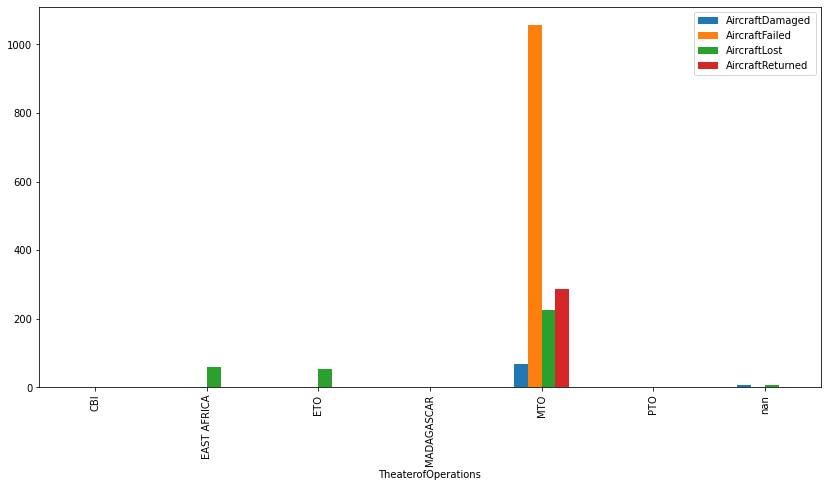

In [ ]:
df_plain_num.plot(kind="bar", figsize=(14,7));

Here we see that we have few values. There is data mostly from the Mediterranean region, with some from East Africa and the European region. We can see that they mainly recorded the number of missing aircraft. This was probably a practice not to keep records of other conditions because they knew how many aircraft they had available (we don't believe that only in the Mediterranean region there were a large number of damaged and lost aircraft). As the situation is like this, we will analyze the Mediterranean region. We can see that there is a very high number of destroyed aircraft in the Mediterranean region (1056). This number is far higher than all others. There are 286 recorded returns, 227 lost aircraft, and 67 damaged. If we were to take these data at face value, it could be concluded that the Mediterranean was devastating (and it was, often, especially at the beginning, when the U.S. was not experienced enough and suffered defeats). We can conclude that these numbers were not well kept, so they are not reliable for us.

In [ ]:
# extract interesting data
df_plain_count = df[['AircraftFailed', 'Country']]
# pivot table, summaries
df_plain_count.pivot_table(index=['Country'],
                         values=["AircraftFailed"],
                         aggfunc='sum', fill_value=0, sort=True)

AircraftFailed
Country                      
AUSTRALIA                   0
GREAT BRITAIN               0
NEW ZEALAND                 0
SOUTH AFRICA                0
USA                      1056

Naravno, podaci su iz SAD-a pa je i za očekivati da će oni biti dostupni samo za tu zemlju. No, ni oni nisu to vodili dobru evidenciju.

In [ ]:
# extract interesting data
df_plain_num_dest = df[['AircraftFailed', 'AircraftDamaged', 'AircraftLost', 'TargetCountry']]
# sum the values
df_plain_num_dest["Sum"] = df_plain_num_dest[['AircraftFailed', 'AircraftDamaged', 'AircraftLost']].sum(axis=1)
# drop columns that are no longer needed
df_plain_num_dest.drop(columns = ['AircraftFailed', 'AircraftDamaged', 'AircraftLost'], inplace=True)
# group by target country, sum, sort and take the first 10
df_plain_num_dest = df_plain_num_dest.groupby("TargetCountry").sum().sort_values(by="Sum", ascending=False).nlargest(columns="Sum", n=10)
df_plain_num_dest

Sum
TargetCountry        
ITALY          1044.0
LIBYA           176.0
nan              61.0
GERMANY          41.0
GREECE           33.0
CRETE            24.0
TUNISIA          23.0
EGYPT            20.0
ALBANIA          15.0
ETHIOPIA         12.0

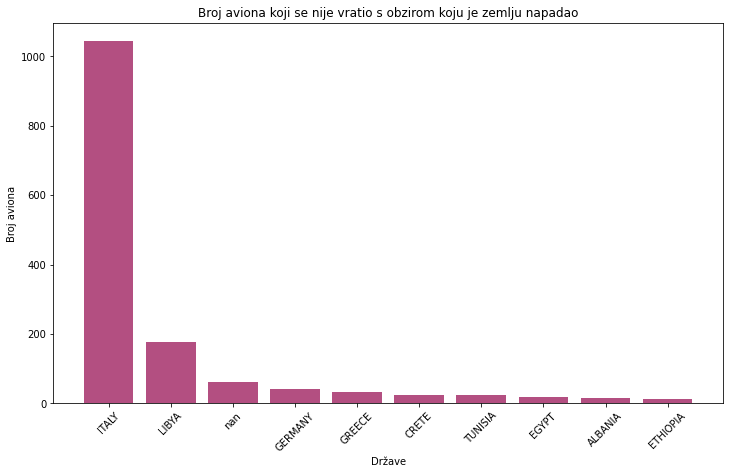

In [ ]:
# visualization
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(df_plain_num_dest.index, df_plain_num_dest["Sum"], color='#b34f81')
ax.set_title("The number of planes that did not return, considering which country they attacked")
ax.set_xlabel('Countries')
ax.set_ylabel('Number of planes')
ax.tick_params(axis='x', labelrotation = 45);

The highest number of recorded downed aircraft is in attacks on Italy. This is an expected data because Italy was the most targeted country in the Mediterranean, and these columns contain the most data about the Mediterranean. Interestingly, Germany is ranked high on this list considering we don't have much data from the European region. All recorded cases of missing aircraft in the European region occurred during attacks on Germany. This list also includes some interesting target countries that have not appeared so far, such as Ethiopia, Albania, Greece, and Egypt.

## 4.14. In which operational area were carriers primarily used? What percentage do fighters, carriers, and bombers make up? How much ammunition did fighters and bombers carry? What percentage of bombing was done with which type of ammunition for fighters and bombers? How much time did they spend on average over the target?


In [ ]:
# extract interesting data
df_airborne = df[["TheaterofOperations","AirborneAircraft"]].dropna()
# let's group by area of ​​operations
df_airborne1 = df_airborne.groupby("TheaterofOperations").sum()
# count the sizes
df_airborne1["Count"] = df_airborne.groupby("TheaterofOperations").size()
# sort and display
df_airborne1.sort_values("AirborneAircraft")

AirborneAircraft  Count
TheaterofOperations                         
MADAGASCAR                        0.0      0
EAST AFRICA                     892.0     40
PTO                            2433.0    503
CBI                            6360.0    874
nan                           13769.0   1453
MTO                          166218.0  10955
ETO                          494276.0  42796

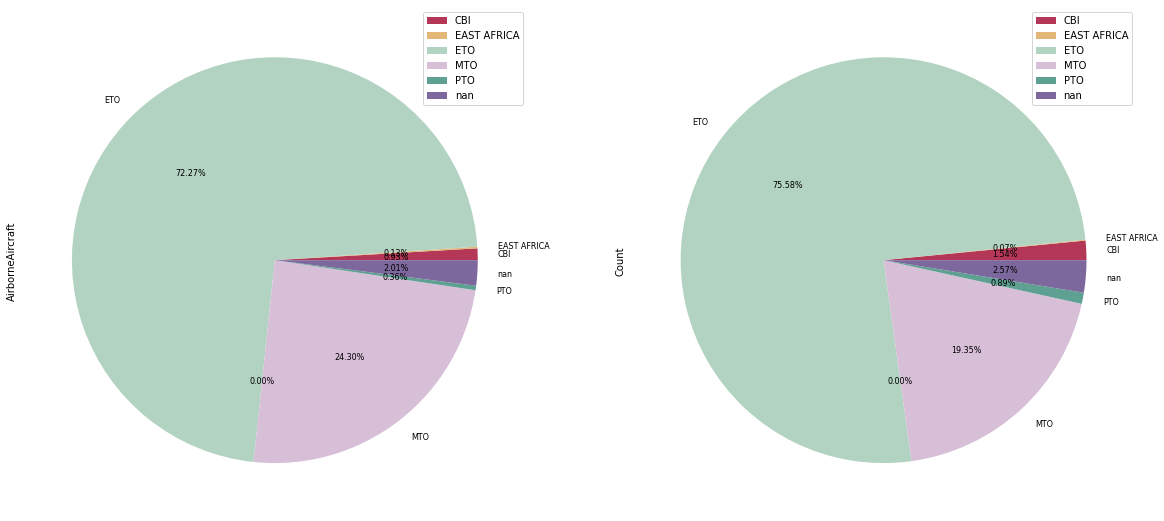

In [ ]:
# pie charts
df_airborne1.plot(kind="pie", subplots=True, figsize=(20, 10),  colors=colrs, autopct = "%.2f%%",  fontsize = 8,);

Here we see that carriers were primarily used in the European theater and the Mediterranean, China, etc. As we saw earlier, there aren't as many land bases in Central and Western Europe. Since takeoff from land wasn't feasible, carriers served as an alternative. For that reason, we likely have a large number of carriers in that area. The other areas are mostly coastal regions along oceans and seas, where it would be logical to use carriers more frequently. However, the map of departure bases shows that most of these areas are close to land bases. Hence, there wasn't as great a need for carriers there.

In [ ]:
# extract interesting data
df_plains = df[["AirborneAircraft","AttackingAircraft", "BombingAircraft"]]
# they are num. data, add them up immediately
df_plains=df_plains.agg('sum').reset_index().rename(columns={'index': 'AircraftType', 0: 'Sum'})
# get percentages
df_plains["Percentage"] = df_plains.Sum/df_plains.Sum.sum()
df_plains

AircraftType       Sum  Percentage
0   AirborneAircraft  683948.0    0.296683
1  AttackingAircraft  943739.0    0.409376
2    BombingAircraft  677626.0    0.293941

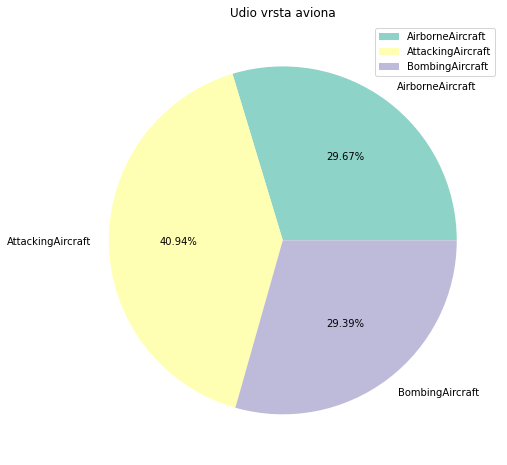

In [ ]:
# pie chart
color=sns.color_palette("Set3")[0:4]
plt.figure(figsize=(8,8))
plt.pie(df_plains.Sum, labels=df_plains.AircraftType, colors=color, autopct='%.2f%%')
plt.title("Share of aircraft types")
plt.legend();

Here we see that fighters make up the largest percentage, while carriers and bombers are almost equally represented. Since fighters are faster than bombers, that's likely the main reason for their higher usage. It's somewhat surprising that carriers and bombers appear almost equally as often.

In [ ]:
# extract interesting data
bombarder_attacking = df[["AttackingAircraft", "BombingAircraft", "TotalWeight"]]
# non-NaN data for fighters, and NaN for bombers
bomber_attacking1 = bombarder_attacking[bomberder_attacking["AttackingAircraft"].notnull()
& bombarder_attacking["BombingAircraft"].isna()].drop(columns="BombingAircraft")
# non-NaN data for bombers, and NaN for fighters
bomber_attacking2 = bombarder_attacking[bomberder_attacking["BombingAircraft"].notnull()
& bombarder_attacking["AttackingAircraft"].isna()].drop(columns="AttackingAircraft")
# calculate the mean value for both occurrences and weight
bomber_attacking1 = bomber_attacking1.mean()
bomber_attacking2 = bomber_attacking2.mean()

print(f'The average ammunition weight of {bomber_attacking1.AttackingAircraft:.2f} fighters is about {bomber_attacking1.TotalWeight:.2f} tons of ammunition, '+
      f'ie {(bomber_attacking1.TotalWeight/bomber_attacking1.AttackingAircraft):.2f} tons per bomber.\n'+
      f'The average {bomber_attacking2.BombingAircraft:.2f} bomber carried about {bomber_attacking2.TotalWeight:.2f} tons of ammunition,'+
      f'ie {(bomber_attacking2.TotalWeight/bomber_attacking2.BombingAircraft):.2f} tons per bomber.')

Prosječna težina streljiva kod 6.53 lovaca je oko 10.63 tona streljiva, odnosno 1.63 tone po bombarderu.
Prosječno 24.92 bombardera je nosilo oko 47.39 tona streljiva,odnosno 1.90 tone po bombarderu.


In the previous code cell, we only used values where either one or the other was used because for each row, the total weight is common for all planes in the row, and this way we get individual values.

From the results obtained, we can see that bombers carried slightly more tons of ammunition on average, as they are, after all, bombers. But the difference in mean values is not that significant.

In [ ]:
# extract interesting data
bombarder_attacking = df[["AttackingAircraft", "BombingAircraft",
                          "HighExplosivesType", "IncendiaryDevicesType",
                          "FragmentationDevicesType"]]
# non-NaN data for fighters, and NaN for bombers
bomber_attacking1 = bombarder_attacking[bomberder_attacking["AttackingAircraft"].notnull()
& bombarder_attacking["BombingAircraft"].isna()].drop(columns=["AttackingAircraft", "BombingAircraft"])
# non-NaN data for bombers, and NaN for fighters
bomber_attacking2 = bombarder_attacking[bomberder_attacking["BombingAircraft"].notnull()
& bombarder_attacking["AttackingAircraft"].isna()].drop(columns=["AttackingAircraft", "BombingAircraft"])
# count
bomber_attacking1 = bomber_attacking1.count()
bomber_attacking2 = bomber_attacking2.count()
# sum the frequencies of all bombs
total=df.HighExplosivesType.count()+df.IncendiaryDevicesType.count()+df.FragmentationDevicesType.count()


print(f'Bombing percentage of fighters with explosive bombs is {(bomber_attacking1.HighExplosivesType/total)*100:.2f}%, '+
      f's with fragmentation bombs {(bomber_attacking1.FragmentationDevicesType/total)*100:.2f}%, '+
      f'a with lighters {(bomber_attacking1.IncendiaryDevicesType/total)*100:.2f}%')
print(f'Bomber attack percentage with explosive bombs is {(bomber_attacking2.HighExplosivesType/total)*100:.2f}%, '+
      f's with fragmentation bombs {(bomber_attacking2.FragmentationDevicesType/total)*100:.2f}%, '+
      f'a with lighters {(bomber_attacking2.IncendiaryDevicesType/total)*100:.2f}%')

Postotak bombardiranja kod lovaca s eksplozivnim bombama je 68.49%, s fragmentacijskim bombama 10.38%, a s upaljačima 9.07%
Postotak bombardiranja kod bombardera s eksplozivnim bombama je 0.95%, s fragmentacijskim bombama 0.00%, a s upaljačima 0.00%


From the obtained results, we can see that fighters mostly used explosive bombs, followed by fragmentation devices and least commonly incendiary devices. Bombers only used explosive bombs. Overall, the most utilized ammunition type was explosive bombs, and they were predominantly dropped from fighters.

In [ ]:
# extract interesting data
aircraft_time = df[["AttackingAircraft", "BombingAircraft","TimeOverTarget"]]
# non-NaN data for fighters, and NaN for bombers
aircraft_time1 = aircraft_time[aircraft_time["AttackingAircraft"].notnull()
& aircraft_time["BombingAircraft"].isna()].drop(columns=["AttackingAircraft", "BombingAircraft"])
# non-NaN data for bombers, and NaN for fighters
aircraft_time2 = aircraft_time[aircraft_time["BombingAircraft"].notnull()
& aircraft_time["AttackingAircraft"].isna()].drop(columns=["AttackingAircraft", "BombingAircraft"])
# output NaN values
aircraft_time1 = aircraft_time1.dropna().reset_index().drop(columns="index")
aircraft_time2 = aircraft_time2.dropna().reset_index().drop(columns="index")
# convert the time spent over the target into a number and calculate the mean value
aircraft_time1 = aircraft_time1.TimeOverTarget.apply(np.int64).mean()
aircraft_time2 = aircraft_time2.TimeOverTarget.apply(np.int64).mean()

print(f'Fighters spent on average over the target {aircraft_time1} s, and bombers {aircraft_time2} s.')

Lovci su prosječno provodili nad metom 1270.5915492957747 s, a bombarderi 2.5 s.


Here we see that attack aircraft spent more time over the target compared to bombers. Bombers mainly carried heavy bombs, which were fewer in number, and precision was not as crucial. They would simply drop the bomb and move on. On the other hand, precision was required from [attack aircraft](https://en.wikipedia.org/wiki/Attack_aircraft); flying at lower altitudes, they attacked with a greater quantity of smaller bombs. Because precision was required, the time spent over the target needed to be longer.

## 4.15. What are the most commonly used words in assessing bombing damage?

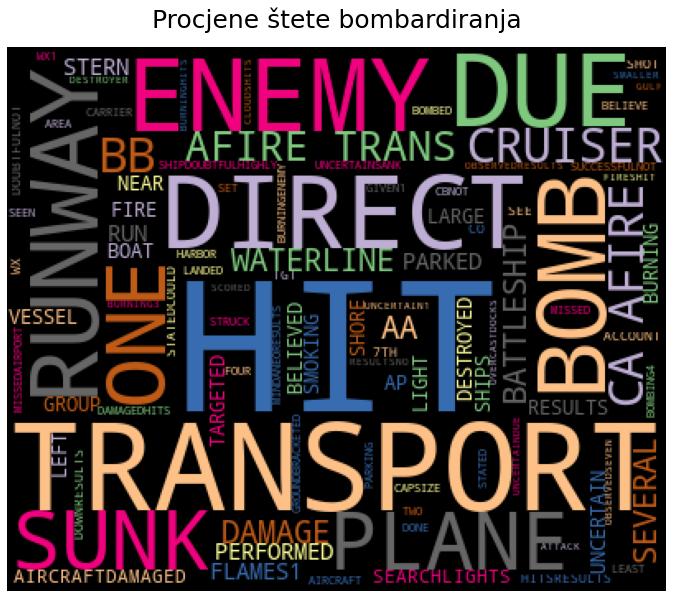

In [ ]:
# drop all missing values ​​from the damage estimation column
assessment = df['BombDamageAssessment'].dropna()
assessment=assessment.reset_index()
assessment.drop(columns='index', inplace=True)
# concatenate all values ​​into one string
assessment_text = ''.join([desc for desc in list(assessment["BombDamageAssessment"]) if isinstance(desc, str)])

fig = plt.figure(figsize=(25, 10))
wc = WordCloud(width=400, height=330, max_words=100, colormap="Accent", background_color="black").generate(assessment_text) # generate the cloud

plt.imshow(wc)
plt.axis("off")
plt.title("Bombardment Damage Estimates", fontsize=25, pad=20);

Finally, for amusement, we saved a word cloud from the column storing information on damage assessment. Here we see that the most commonly used words in damage assessment are "hit," "transport," "enemy," "bomb," etc.

This word cloud contains many words that first come to mind when mentioning any type of war and words we use when describing war.

With this, we conclude the exploratory data analysis and move on to statistics.

# 5. Statistics

**Terms related to statistics and their meanings:**
>**Sample Mean:**

> For a given sample of $n$ values, $\{ x_i \}, i = 1, ..., n$, the *(arithmetic) sample mean* $\overline{x}$ is the sum of the values divided by the number of values, that is
$$ \overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i.$$

>**Sample Median:**

> What if we have one value that is very different from the others (much larger or much smaller)? Then, that one value (*outlier*) will affect the sample mean.

> Instead of the sample mean $\overline{x}$, we use the median, which represents the number where 50% of the sample values are less and 50% are greater.

> **Sample Variance:**

>**Sample variance** $s^2$ describes the spread of data and is defined as follows:
$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i-\overline{x})^2$$

> The expression $(x_i-\overline{x})$ is called the *deviation* from the mean, so the variance is the mean squared deviation.

>**Sample Standard Deviation:**

> The square root of the sample variance $s$ is called the **sample standard deviation**.

>**Covariance:**

> When two variables share the same tendencies, we refer to *covariance*. Let's consider two variables, $X = \{x_i\}$ and $Y = \{y_i\}$. Center the data with respect to their mean: $dx_i = x_i - \mu_X$ and $dy_i = y_i - \mu_Y$. Covariance is defined as:
$$Cov(X,Y) = \frac{1}{n}\sum_{i=1}^{n}dx_idy_i,$$ where $n$ is the length of both arrays.

>However, covariance is difficult to interpret.

>**Correlation:**

>If we normalize the data with respect to their standard deviation, we get
$$ \rho_i = \frac{x_i-\mu_X}{\sigma_X} \frac{y_i-\mu_Y}{\sigma_Y},$$ hence $$\rho = \frac{1}{n}\sum_{i=1}^{n}\rho_i.$$


>Writing this using covariance, we get the **Pearson correlation coefficient**: $$\rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

> **Pearson Correlation Coefficient $\rho$**
- a measure of **linear** relationship between two variables
- $\rho \in [-1,1]$
  - $\rho = 0$: variables are not linearly related (does not mean they are not related at all!)
  - $\rho > 0 $: positive correlation (larger $x$ $\to$ larger $y$)
  - $\rho < 0 $: negative correlation (larger $x$ $\to$ smaller $y$)
  - the closer |$\rho$| is to 1, the "stronger" the correlation
  - $\rho = \pm 1$ - perfect linear relationship
- does not perform well when we have *outliers*

>**Data Distribution:**

>When getting to know the data, it's dangerous to look only at the mean, median, and variance of the data - very different data can be described by the same numbers.

**Statistical Comparison:**
> We will statistically analyze the data related to bombs used in operations. From the loaded dataset, we will use the columns 'High Explosives Type', 'High Explosives', 'High Explosives Weight (Tons)', 'Total Weight (Tons)' to compare the statistical results obtained by loading the mentioned columns into two datasets. In one dataset, we will replace missing data with 0, and in the other dataset, we will replace missing data with the column's average value.

## 5.0. Data preparation for statistical analysis

In [ ]:
bombs=df[['HighExplosivesType','HighExplosives','HighExplosivesWeight','TotalWeight']]
bombs_zero=bombs[bombs['HighExplosivesType'].notna()]#missing data in columns will be replaced with 0
bombs_average=bombs[bombs['HighExplosivesType'].notna()]#missing data in the columns will be replaced with the average value of the column

In [ ]:
bombs_zero['HighExplosives'] = bombs_zero['HighExplosives'].fillna(0)
bombs_zero['HighExplosivesWeight'] = bombs_zero['HighExplosivesWeight'].fillna(0)
bombs_zero['TotalWeight'] = bombs_zero['TotalWeight'].fillna(0)
bombs_average.fillna(bombs_average.mean(),inplace=True)

<ipython-input-515-3a7ab398a786>:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
# check if all nana values ​​have been removed
print('Broj NaN vrijednosti za DF( bombs_zero ):\n',bombs_zero.isna().sum())
print()
print('Broj NaN vrijednosti za DF( bombs_average ):\n',bombs_average.isna().sum())

Broj NaN vrijednosti za DF( bombs_zero ):
 HighExplosivesType      0
HighExplosives          0
HighExplosivesWeight    0
TotalWeight             0
dtype: int64

Broj NaN vrijednosti za DF( bombs_average ):
 HighExplosivesType      0
HighExplosives          0
HighExplosivesWeight    0
TotalWeight             0
dtype: int64


In [ ]:
bombs_zero.describe()

HighExplosives  HighExplosivesWeight   TotalWeight
count    40848.000000          40848.000000  40848.000000
mean        24.551465              8.992393      9.745853
std         68.358207            143.978971    142.529032
min          0.000000              0.000000      0.000000
25%          2.000000              2.000000      2.000000
50%          8.000000              4.000000      4.000000
75%         24.615385              8.818750      9.000000
max       2840.000000          20000.000000  20000.000000

In [ ]:
bombs_average.describe()

HighExplosives  HighExplosivesWeight   TotalWeight
count    40848.000000          40848.000000  40848.000000
mean        30.674688              9.577630     10.218399
std         67.249585            143.960693    142.512875
min          0.000000              0.000000      0.000000
25%          8.000000              2.000000      2.000000
50%         22.000000              4.000000      4.000000
75%         30.674688              9.577630     10.218399
max       2840.000000          20000.000000  20000.000000

##5.1. Measures of the mean

**Arithmetic mean:**

In [ ]:
means_zero = bombs_zero.groupby('HighExplosivesType').mean()
means_average = bombs_average.groupby('HighExplosivesType').mean()
means_zero.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                              1.384615              0.961538     0.961538
100 LB GP (GP-M30)            35.389619              4.649322     4.931467
1000 LB AP (AP-MK 33)         10.857143              5.428571     5.142857
1000 LB GP (GP-M44/M65)       22.647572             11.792279    11.972501
1000 LB MINES                 74.894737             37.447368    33.752632

In [ ]:
means_average.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                             24.980529              4.645242     3.319631
100 LB GP (GP-M30)            48.768666              5.868895     6.091202
1000 LB AP (AP-MK 33)         10.857143              6.796804     6.602628
1000 LB GP (GP-M44/M65)       24.430261             11.914428    12.008043
1000 LB MINES                 74.894737             37.447368    33.752632

**Sample median:**

In [ ]:
medians_zero = bombs_zero.groupby('HighExplosivesType').median()
medians_average = bombs_average.groupby('HighExplosivesType').median()
medians_zero.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                                   0.0                   0.0          0.0
100 LB GP (GP-M30)                  6.0                   3.0          3.0
1000 LB AP (AP-MK 33)               2.0                   1.0          1.0
1000 LB GP (GP-M44/M65)            16.0                   9.0          9.0
1000 LB MINES                      54.0                  27.0         27.0

In [ ]:
medians_average.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                             30.674688                   5.0          0.0
100 LB GP (GP-M30)            30.674688                   4.0          5.0
1000 LB AP (AP-MK 33)          2.000000                   3.0          3.0
1000 LB GP (GP-M44/M65)       20.000000                   9.0          9.0
1000 LB MINES                 54.000000                  27.0         27.0

## 5.2. Measures of dispersion

**Sample variance:**

In [ ]:
vars_zero = bombs_zero.groupby('HighExplosivesType').var()
vars_average = bombs_average.groupby('HighExplosivesType').var()
vars_zero.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                              8.423077              4.269231     4.269231
100 LB GP (GP-M30)          4305.088523             47.911858    49.503897
1000 LB AP (AP-MK 33)        277.142857             69.285714    67.476190
1000 LB GP (GP-M44/M65)      774.784299            186.183673   187.996776
1000 LB MINES               7718.988304           1929.747076   960.207076

In [ ]:
vars_average.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                            118.584662             20.115617    19.436477
100 LB GP (GP-M30)          3589.405167             46.764545    48.570994
1000 LB AP (AP-MK 33)        277.142857             65.059193    64.875460
1000 LB GP (GP-M44/M65)      745.538364            184.457564   187.507568
1000 LB MINES               7718.988304           1929.747076   960.207076

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



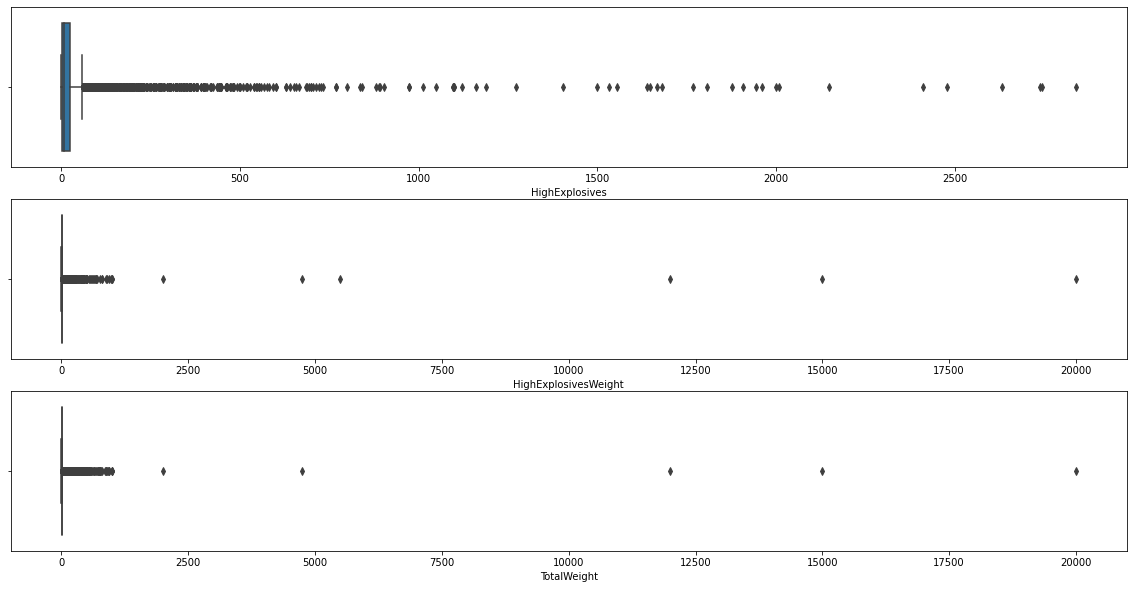

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
sns.boxplot(bombs_zero['HighExplosives'],ax=axes[0]);
sns.boxplot(bombs_zero['HighExplosivesWeight'],ax=axes[1]);
sns.boxplot(bombs_zero['TotalWeight'],ax=axes[2]);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



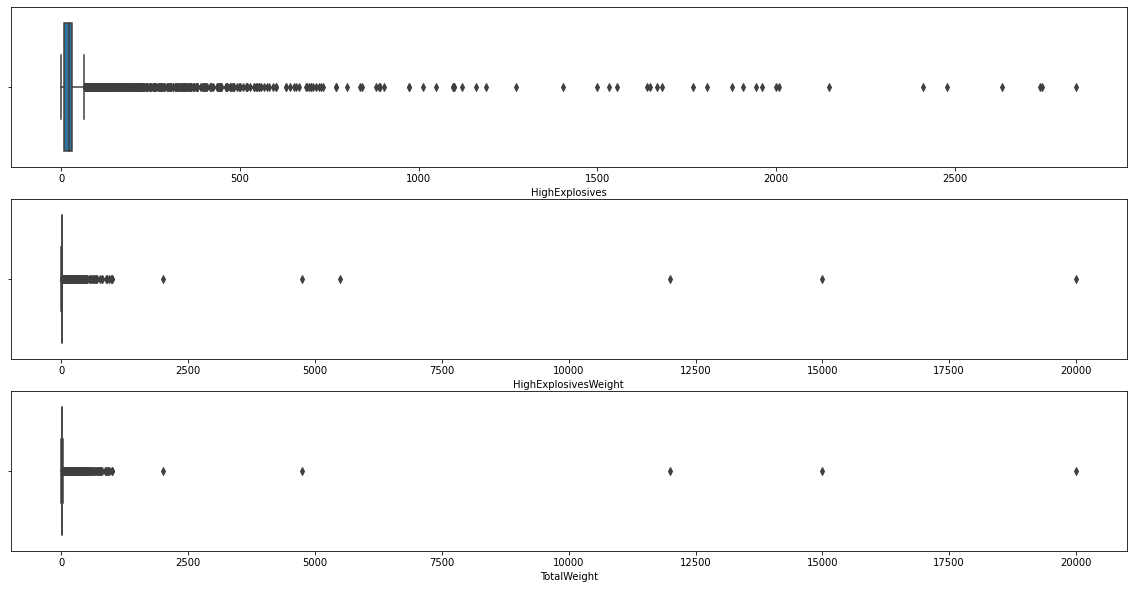

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
sns.boxplot(bombs_average['HighExplosives'],ax=axes[0]);
sns.boxplot(bombs_average['HighExplosivesWeight'],ax=axes[1]);
sns.boxplot(bombs_average['TotalWeight'],ax=axes[2]);

From this, we see that our data is mostly concentrated around zero and that there isn't a large dispersion of data, but we do have a significant number of outliers in some cases (such as with explosives).

**Standard deviation:**

In [ ]:
stds_zero = bombs_zero.groupby('HighExplosivesType').std()
stds_average = bombs_average.groupby('HighExplosivesType').std()
stds_zero.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                              2.902254              2.066212     2.066212
100 LB GP (GP-M30)            65.613173              6.921839     7.035901
1000 LB AP (AP-MK 33)         16.647608              8.323804     8.214389
1000 LB GP (GP-M44/M65)       27.834947             13.644914    13.711192
1000 LB MINES                 87.857773             43.928887    30.987208

In [ ]:
stds_average.head(5)

HighExplosives  HighExplosivesWeight  TotalWeight
HighExplosivesType                                                        
0                             10.889658              4.485044     4.408682
100 LB GP (GP-M30)            59.911645              6.838461     6.969289
1000 LB AP (AP-MK 33)         16.647608              8.065928     8.054530
1000 LB GP (GP-M44/M65)       27.304548             13.581516    13.693340
1000 LB MINES                 87.857773             43.928887    30.987208

## 5.3. Connectivity measures

**Correlation:**

In [ ]:
corr1 = bombs_zero.groupby('HighExplosivesType').corr()
corr1

HighExplosives  \
HighExplosivesType                                                  
0                            HighExplosives              1.000000   
                             HighExplosivesWeight        0.322294   
                             TotalWeight                 0.322294   
100 LB GP (GP-M30)           HighExplosives              1.000000   
                             HighExplosivesWeight        0.234690   
...                                                           ...   
TORPEDOES MISC               HighExplosivesWeight        0.951904   
                             TotalWeight                 0.951904   
UNK CODE 20 110 LB EXPLOSIVE HighExplosives              1.000000   
                             HighExplosivesWeight        0.999755   
                             TotalWeight                 0.997531   

                                                   HighExplosivesWeight  \
HighExplosivesType                                                        
0                            HighExplosives                    0.322294   
                             HighExplosivesWeight              1.000000   
                             TotalWeight                       1.000000   
100 LB GP (GP-M30)           HighExplosives                    0.234690   
                             HighExplosivesWeight              1.000000   
...                                                                 ...   
TORPEDOES MISC               HighExplosivesWeight              1.000000   
                             TotalWeight                       1.000000   
UNK CODE 20 110 LB EXPLOSIVE HighExplosives                    0.999755   
                             HighExplosivesWeight              1.000000   
                             TotalWeight                       0.998094   

                                                   TotalWeight  
HighExplosivesType                                              
0                            HighExplosives           0.322294  
                             HighExplosivesWeight     1.000000  
                             TotalWeight              1.000000  
100 LB GP (GP-M30)           HighExplosives           0.230105  
                             HighExplosivesWeight     0.966261  
...                                                        ...  
TORPEDOES MISC               HighExplosivesWeight     1.000000  
                             TotalWeight              1.000000  
UNK CODE 20 110 LB EXPLOSIVE HighExplosives           0.997531  
                             HighExplosivesWeight     0.998094  
                             TotalWeight              1.000000  

[117 rows x 3 columns]

In [ ]:
corr2 = bombs_average.groupby('HighExplosivesType').corr()
corr2

HighExplosives  \
HighExplosivesType                                                  
0                            HighExplosives              1.000000   
                             HighExplosivesWeight       -0.090929   
                             TotalWeight                -0.286939   
100 LB GP (GP-M30)           HighExplosives              1.000000   
                             HighExplosivesWeight        0.238073   
...                                                           ...   
TORPEDOES MISC               HighExplosivesWeight        0.960033   
                             TotalWeight                 0.960033   
UNK CODE 20 110 LB EXPLOSIVE HighExplosives              1.000000   
                             HighExplosivesWeight        0.999755   
                             TotalWeight                 0.997531   

                                                   HighExplosivesWeight  \
HighExplosivesType                                                        
0                            HighExplosives                   -0.090929   
                             HighExplosivesWeight              1.000000   
                             TotalWeight                       0.659092   
100 LB GP (GP-M30)           HighExplosives                    0.238073   
                             HighExplosivesWeight              1.000000   
...                                                                 ...   
TORPEDOES MISC               HighExplosivesWeight              1.000000   
                             TotalWeight                       1.000000   
UNK CODE 20 110 LB EXPLOSIVE HighExplosives                    0.999755   
                             HighExplosivesWeight              1.000000   
                             TotalWeight                       0.998094   

                                                   TotalWeight  
HighExplosivesType                                              
0                            HighExplosives          -0.286939  
                             HighExplosivesWeight     0.659092  
                             TotalWeight              1.000000  
100 LB GP (GP-M30)           HighExplosives           0.240163  
                             HighExplosivesWeight     0.958282  
...                                                        ...  
TORPEDOES MISC               HighExplosivesWeight     1.000000  
                             TotalWeight              1.000000  
UNK CODE 20 110 LB EXPLOSIVE HighExplosives           0.997531  
                             HighExplosivesWeight     0.998094  
                             TotalWeight              1.000000  

[117 rows x 3 columns]

## 5.4. Data distribution

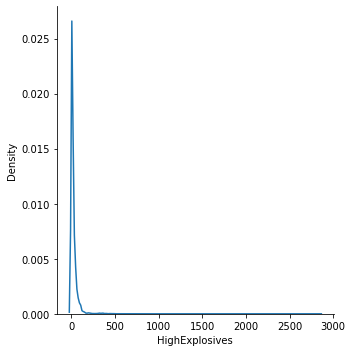

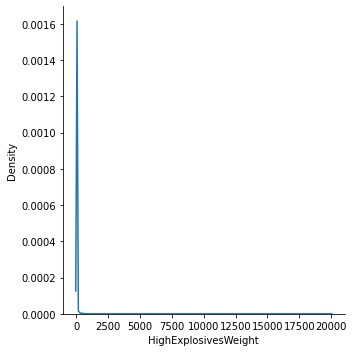

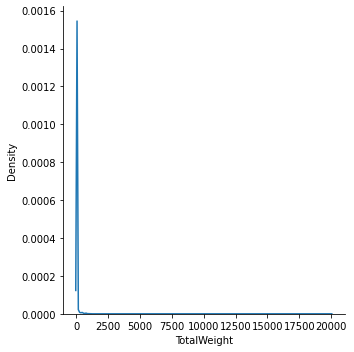

In [ ]:
sns.displot(bombs_zero["HighExplosives"],kind="kde");
sns.displot(bombs_zero["HighExplosivesWeight"],kind="kde");
sns.displot(bombs_zero["TotalWeight"],kind="kde");

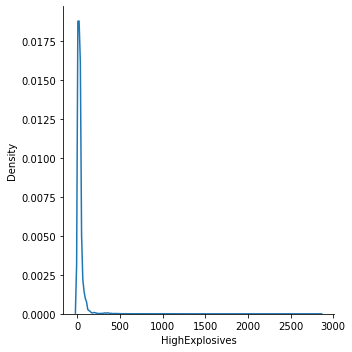

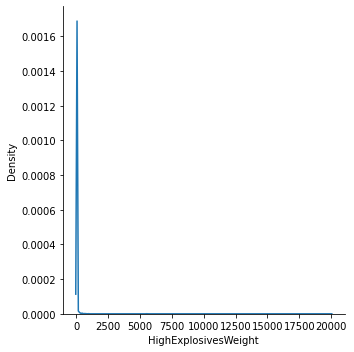

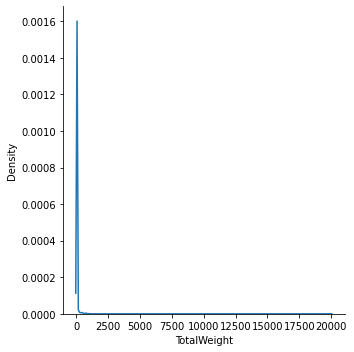

In [ ]:
sns.displot(bombs_average["HighExplosives"],kind="kde");
sns.displot(bombs_average["HighExplosivesWeight"],kind="kde");
sns.displot(bombs_average["TotalWeight"],kind="kde");

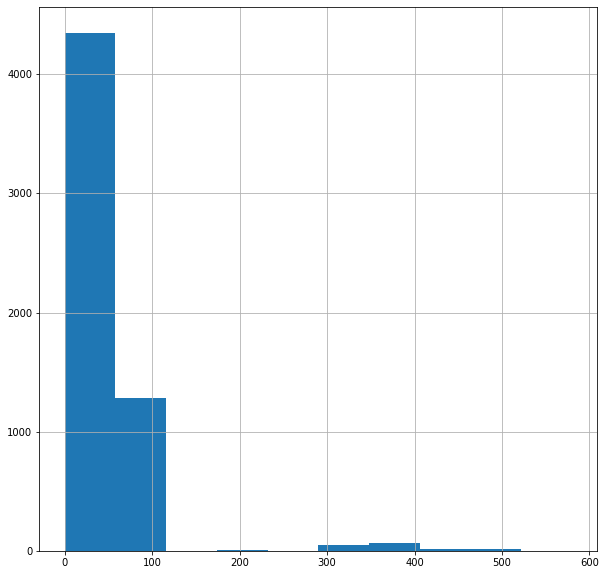

In [ ]:
bombs_zero[bombs_zero["HighExplosivesType"]=="100 LB GP (GP-M30)"]["HighExplosives"].hist()

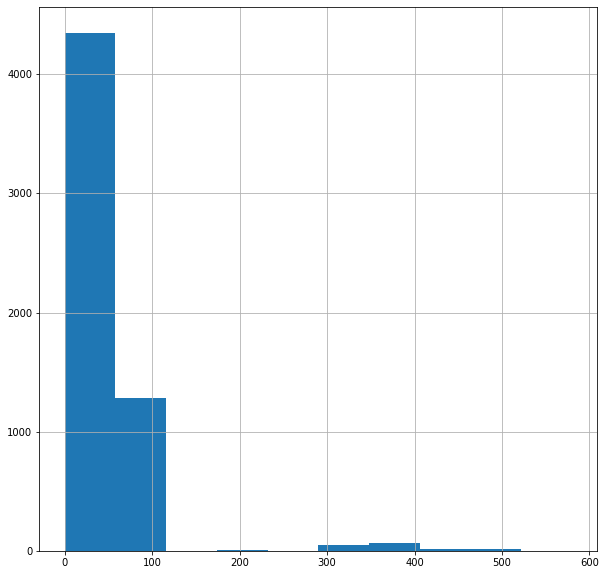

In [ ]:
bombs_average[bombs_average["HighExplosivesType"]=="100 LB GP (GP-M30)"]["HighExplosives"].hist()

From the above graphical representations (box plot and density plot) and measures of dispersion, we can see that the data is not highly dispersed, but there are persistent outliers. The distributions are positively skewed, and the samples are unimodal.

##5.5. Hypothesis testing

$H_0$: The mean of bombs_average['High Explosives'] is less than the mean of bombs_zero['High Explosives'].

$H_1$: The mean of bombs_average['High Explosives'] is greater than or equal to the mean of bombs_zero['High Explosives'].

In [ ]:
import scipy.stats as stats

In [ ]:
np.random.seed(7)
sample1=np.random.choice(bombs_average['HighExplosives'], 500)
sample2=np.random.choice(bombs_zero['HighExplosives'], 500)

In [ ]:
statistic, pvalue = stats.normaltest(sample1) # check if the whole set is normally distributed
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 6.049683283892375e-161
pvalue < 0.05: True


In [ ]:
statistic, pvalue = stats.normaltest(sample2) # check if the sample is normally distributed
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 8.084742001815654e-142
pvalue < 0.05: True


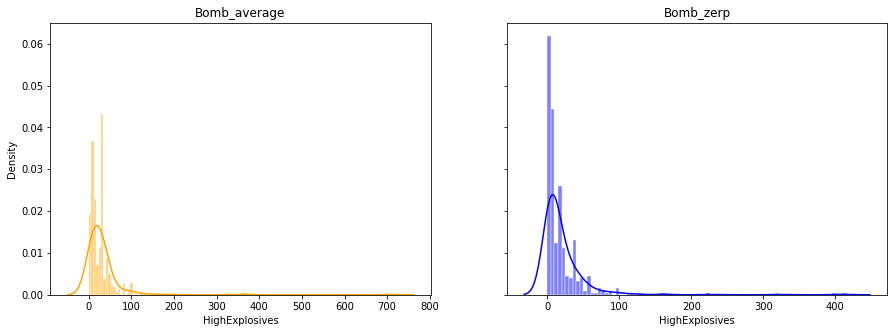

In [ ]:
# distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Bomb_average')
axes[0].set_xlabel("HighExplosives")
sns.histplot(sample1, stat='density', alpha=0.5, color='orange', edgecolor='white',ax=axes[0])
sns.kdeplot(sample1,  color='orange', ax=axes[0])
axes[1].set_title('Bomb_zerp')
axes[1].set_xlabel("HighExplosives")
sns.histplot(sample2, stat='density', alpha=0.5, color='blue', edgecolor='white', ax=axes[1])
sns.kdeplot(sample2,  color='blue', ax=axes[1]);

The p-value is less than 0.05, so we reject $H_0$, i.e., the data is not normally distributed. Therefore, we need to abandon the parametric test and opt for a non-parametric test. The non-parametric equivalent of the Student's t-test is the Mann-Whitney U test.

In [ ]:
statistic, pvalue = stats.mannwhitneyu(sample1,sample2,alternative='less')
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 0.9999999999999997
pvalue < 0.05: False


The p-value is greater than 0.05, so we do not reject $H_0$, i.e., we conclude:
> The mean of bombs_average['High Explosives'] is less than the mean of bombs_zero['High Explosives'].

# 6. k-nearest Neighbors

As mentioned at the beginning, we will attempt to predict the area of operations using coordinates. This can be achieved using the k-nearest neighbors algorithm, a supervised machine learning algorithm. This lazy algorithm takes a value, "places it in space," finds the k nearest points to the new point, identifies which neighbors they come from, and groups the point with the group from which the majority of neighbors come from k. This algorithm is great because it yields good results even with small datasets.

In [ ]:
from sklearn.preprocessing import MinMaxScaler # data scaling
from sklearn.model_selection import train_test_split # split into training and testing set
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier
#metrics
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# predict with the help of length and width
df_knn=df[['TargetLatitude', 'TargetLongitude', "TheaterofOperations"]].dropna()

In [ ]:
# remove duplicates from the pool
df_knn = df_knn[~df_knn.duplicated(keep=False)]
df_knn.shape

(2708, 3)

In [ ]:
# value encoding
df_knn.TheaterofOperations, mapping_index = pd.factorize(df_knn['TheaterofOperations'])
print(df_knn.TheaterofOperations.unique())
df_knn.head()

[0 1 2 3 4 5]


TargetLatitude  TargetLongitude  TheaterofOperations
71        37.330000        14.000000                    0
125       39.000000       117.700000                    1
147       -2.366667       132.666667                    2
166       -3.533333       143.550000                    2
250       47.000000        17.000000                    3

In [ ]:
# let's see which coded value belongs to which actual value
print('CBI: ', mapping_index.get_loc('CBI') )
print('ETO: ', mapping_index.get_loc('ETO') )
print('MTO: ', mapping_index.get_loc('MTO') )
print('PTO: ', mapping_index.get_loc('PTO') )
print('EAST AFRICA: ', mapping_index.get_loc('EAST AFRICA') )

CBI:  1
ETO:  3
MTO:  0
PTO:  2
EAST AFRICA:  5


We notice that our data set has shrunk significantly after removing duplicates and missing values.

In [ ]:
df_knn.reset_index(inplace=True)
df_knn.drop(columns=["index"], inplace=True)
df_knn.drop(columns=["level_0"], inplace=True)
df_knn.head()

TargetLatitude  TargetLongitude  TheaterofOperations
0       37.330000        14.000000                    0
1       39.000000       117.700000                    1
2       -2.366667       132.666667                    2
3       -3.533333       143.550000                    2
4       47.000000        17.000000                    3

In [ ]:
# are there NaN values
df_knn.isna().sum()

index                  0
TargetLatitude         0
TargetLongitude        0
TheaterofOperations    0
dtype: int64

First, we need to divide the data set into a training set and a test set in order to be able to evaluate the obtained results.

In [ ]:
# splitting the entire set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_knn[['TargetLatitude', 'TargetLongitude']], df_knn['TheaterofOperations'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2166, 2), (542, 2))

Now we can scale the data using MinMax Scaler. It is good when we know the maximum and minimum values, which we do here because our range is from 0 to 180, at most. For this reason, we can scale this data. Why do we scale at all? Because often KNN yields better results on scaled data since the "points are closer together, making it easier to compare and make decisions."

In [ ]:
# scaling - MinMaxScaler
scaler_mm = MinMaxScaler()
X_train = scaler_mm.fit_transform(X_train)
X_test = scaler_mm.transform(X_test)

Now we can proceed to model prediction. However, KNN requires the parameter k, indicating how many neighbors to consider. It is preferable for this number to be odd to avoid ambiguous decisions. Below, by testing different values of k, we will try to find the best one.

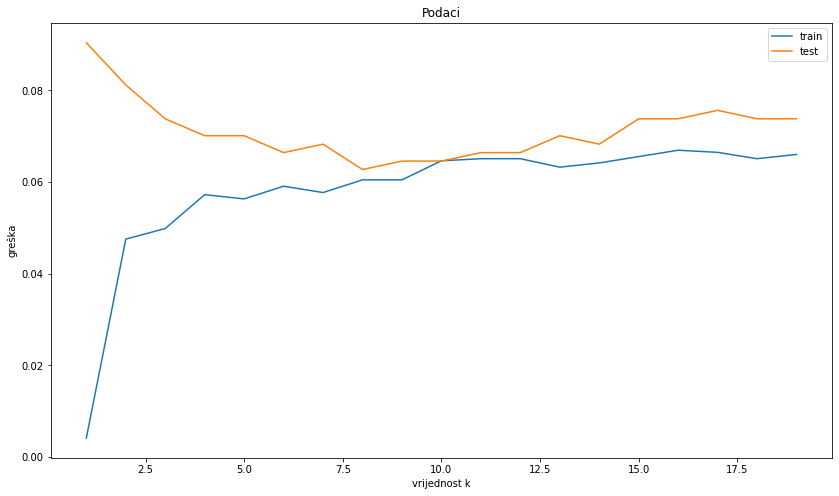

In [ ]:
# calculate the error by 20 k-aov at the meeting for training and testing
error1 = []
error2 = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k, metric="haversine")
    knn.fit(X_train, y_train)
    y_pred1= knn.predict(X_train)

    error1.append(np.mean(y_train != y_pred1))

    y_pred2= knn.predict(X_test)

    error2.append(np.mean(y_test != y_pred2))


fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(range(1,20), error1, label="train")
ax.plot(range(1,20), error2, label="test")
ax.set_xlabel('vrijednost k')
ax.set_ylabel('greška')
ax.legend()
ax.set_title('Podaci');

We choose 9 neighbors, we see that our data achieved very high accuracy, or rather, low error.

The Haversine metric is commonly used for calculating points on a sphere, so we use it here.

In [ ]:
# initialization
knn = KNeighborsClassifier(n_neighbors=9, metric="haversine")

In [ ]:
# algorithm
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='haversine', n_neighbors=9)

In [ ]:
y_pred = knn.predict(X_test)
print('Accuracy (test): ', accuracy_score(y_pred, y_test))

točnost (test):  0.9354243542435424


Our accuracy is very high, which means our model is performing well. Now, we'll also take a look at the confusion matrix to see where our algorithm might be confused.

In [ ]:
confusionMTRX = confusion_matrix(y_test, y_pred)

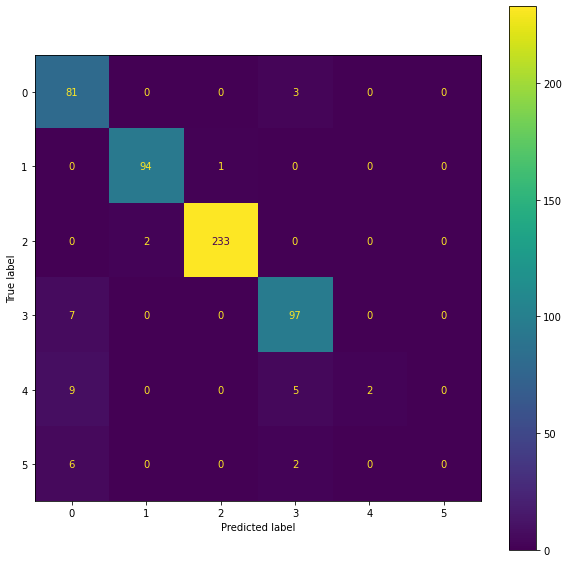

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMTRX)
disp.plot()
plt.show()

In this confusion matrix, we see excellent predictions for the first four classes, while we lack data for the other two. If we were to input data belonging to those classes, it would likely make incorrect estimations. Overall, though, we can be satisfied with the results obtained. Now, let's try to predict the coordinates of Sinj and see if it accurately places them.

In [ ]:
# podsjetnik
print('CBI: ', mapping_index.get_loc('CBI') )
print('ETO: ', mapping_index.get_loc('ETO') )
print('MTO: ', mapping_index.get_loc('MTO') )
print('PTO: ', mapping_index.get_loc('PTO') )
print('EAST AFRICA: ', mapping_index.get_loc('EAST AFRICA') )

CBI:  1
ETO:  3
MTO:  0
PTO:  2
EAST AFRICA:  5


In [ ]:
# prediction
sinj = np.array([43.696559, 16.618484])
knn.predict(sinj.reshape(1,-1))

array([3])

The algorithm accurately identified the operational area where Sinj is located. With that,

the classification story is complete; now we move on to Forecasting.






# 7. Forcasting

In [ ]:
# as a certain date appears more than once, we made a set grouped by date to get unique values
data_count=df['MissionDate'].value_counts().sort_values(ascending = True)
data_count1=[]
for i in data_count:
  data_count1.append(i)
grupirano=df[['MissionDate','Country']].groupby('MissionDate').count().reset_index()
grupirano[['MissionDate']]

MissionDate
0     1939-09-03
1     1939-09-04
2     1939-09-05
3     1939-09-07
4     1939-09-08
...          ...
1894  1945-12-27
1895  1945-12-28
1896  1945-12-29
1897  1945-12-30
1898  1945-12-31

[1899 rows x 1 columns]

In [ ]:
bydate= {
          'ds' : grupirano['MissionDate'],
          'y' :data_count1,

          }
bydate=pd.DataFrame(bydate)
bydate

ds    y
0    1939-09-03    1
1    1939-09-04    1
2    1939-09-05    1
3    1939-09-07    1
4    1939-09-08    1
...         ...  ...
1894 1945-12-27  463
1895 1945-12-28  466
1896 1945-12-29  477
1897 1945-12-30  486
1898 1945-12-31  516

[1899 rows x 2 columns]

**Prophet** is a procedure for forecasting time series data based on an additive model where nonlinear trends fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that exhibit strong seasonal effects and have several seasons of historical data. Prophet is resilient to missing data and changes in trend and typically handles extremes well.

It employs a **generalized additive model** of time series consisting of three core components: *trend*, *seasonality*, and *holidays*:
<br>

$$y(t) = g(t) + s(t) + h(t) + \varepsilon_t$$

where
- $g(t)$ denotes the trend (non-periodic changes in the time series values)
- $s(t)$ represents periodic changes or seasonality
- $h(t)$ describes the impact of holidays on time series values occurring irregularly and lasting for one or more days
- $\varepsilon_t$: *error*, the residual values not captured by the model.

In [ ]:
from prophet import Prophet

# fitting the model
m = Prophet()# create an instance of the Prophet class that has fit and predict methods
m.fit(bydate)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzf7jdh69/yflug2bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzf7jdh69/fdzpc1w1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3676', 'data', 'file=/tmp/tmpzf7jdh69/yflug2bh.json', 'init=/tmp/tmpzf7jdh69/fdzpc1w1.json', 'output', 'file=/tmp/tmpzf7jdh69/prophet_modelb7z2p9r3/prophet_model-20230207140814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)

In [ ]:
future[-365:]

ds
1899 1946-01-01
1900 1946-01-02
1901 1946-01-03
1902 1946-01-04
1903 1946-01-05
...         ...
2259 1946-12-27
2260 1946-12-28
2261 1946-12-29
2262 1946-12-30
2263 1946-12-31

[365 rows x 1 columns]

In [ ]:
# predict
forecast = m.predict(future)

> What data does the `predict` method return?
* Predicted value - `yhat`
* Lower and upper bounds of the "uncertainty interval" - `yhat_lower`, `yhat_upper`
* Trend data - `trend_lower`, `trend_upper`, `trend_upper`
* Seasonality data - `weekly`, `weekly_lower`, `weekly_upper`, `yearly`, `yearly_lower`, `yearly_upper`

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2259 1946-12-27  675.697490  558.257810  815.840469
2260 1946-12-28  676.176879  557.659653  815.488554
2261 1946-12-29  676.991905  558.056195  820.211704
2262 1946-12-30  677.316108  558.753219  819.839293
2263 1946-12-31  677.541284  556.418478  819.656458

**Visualization**

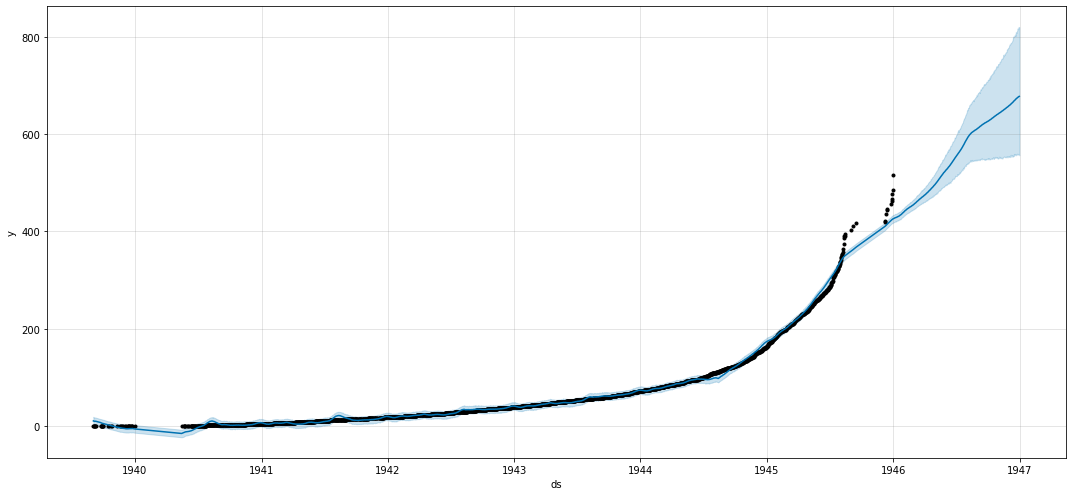

In [ ]:
fig1 = m.plot(forecast, figsize=(15,7))

Visualization of individual time series components: trend, annual/weekly seasonality

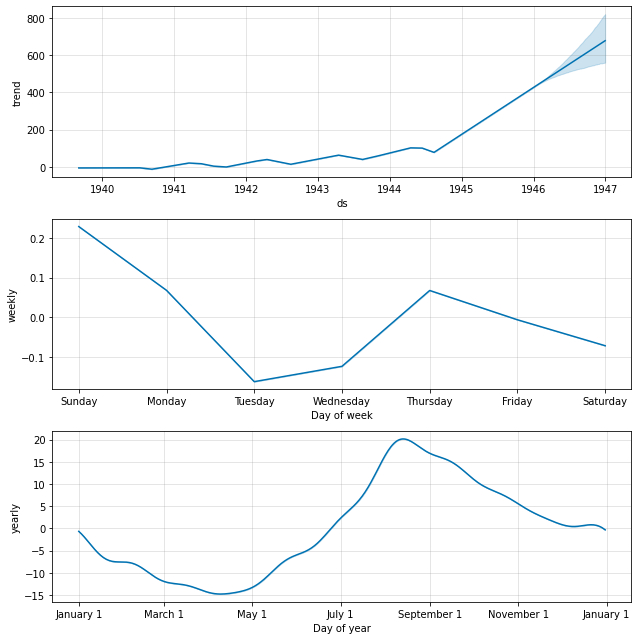

In [ ]:
fig2 = m.plot_components(forecast)

Let's visualize the annual data for 2016.

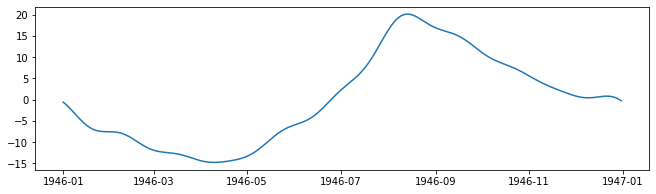

In [ ]:
year_2016 = forecast[forecast.ds.between("1946-01-01", "1946-12-31")]
plt.figure(figsize=(11, 3))
plt.plot(year_2016["ds"], year_2016["yearly"]);

Interactive visualization

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(m, forecast)

Based on the obtained graphs, we concluded that if the war had lasted a year longer, the number of bombings would have significantly increased. We also noticed that the number of bombings decreased towards the end of the week and towards the end of the year. We observed that the most frequent bombings occurred during the summer, while the least frequent ones occurred during the spring, considering the seasons. Looking at the days of the week, the most frequent bombings were on Sundays, while the least frequent ones were on Tuesdays. We did not model holidays and special events because they had no impact during the war.

# 8. Conclusion

Through data collection, processing, analysis, and predictions, we can see that numerous conclusions emerge. As we assumed at the outset, the entire process was quite interesting for analysis. If we were to undertake most of the project without the libraries we used, the whole process would take much longer and most tasks would be much more complicated. Therefore, using the right tools in the right way can not only expedite the processing process but also simplify it significantly.

We collected the data from [***Aerial Bombing Operations in World War II***](https://www.kaggle.com/datasets/usaf/world-war-ii) and transferred it to Google Drive. We checked how much memory the data would occupy and decided that no additional steps were necessary for working with large datasets. Upon first glance at the data, we noticed that the dataset contains 178281 rows and 46 columns. The columns are either of the object type, float (decimal number), or int (whole number). Then we proceeded to process the data and first addressed fields with multiple values and single values across multiple fields. We noticed that some city names were marked with coordinates, which we removed because we already had the same data in the "Target Longitude" and "Target Latitude" columns. The total number of missing values is 4857110 out of 8200926, which represents 59.00% of the data. In addition to NaN data, we also have 28616 "UNDEFINED" and 4078 "UNKNOWN" values. We were able to reconstruct these values only in the "Target County" column using coordinate data. Unfortunately, the other values did not contain such data. We merged data recorded in two measurement systems into one column to reduce the number of columns we handle. For easier work, we dropped the "SourceID" column and all duplicates. We also created a backup in case they are needed for further analysis. In our exploratory analysis, we found that the United States participated the most in bombings, accounting for as much as 70.24%, while Australia participated the least, with only 0.02%. Germany was the most heavily bombed country, while Formosa was the least. Since bombing is one of the air attacks, we wondered which plane was most commonly used and which one could follow the longest route. Given that the United States had the largest air fleet and one of the most commonly used bombers was the B17, these results did not surprise us. The source above states that the B17 bomber was most commonly used in Europe, as shown by this dataset, especially considering that Germany was the most frequently bombed country in World War II. We noticed that the number of bombings was very low until 1940. After that, we see a slight decline in 1942, and from 1943, the number of bombings increases steadily until the third quarter of 1945, after which it drops significantly until the end of the war. We were interested in which countries bombed which. We noticed an interesting piece of information that the United States mainly targeted islands. The likely reason for this is that they already had a strong navy at that time, i.e., the strongest among the allies, and they were the only ones interested in the Pacific for those islands. We also decided to visually represent the ports on the map and the route from the departure port to the bombing location. We also conducted statistical processing on data related to the bomb itself, such as type, number of bombs, weight, and total weight. Due to NaN values, we created two sets of data, filled with zero and filled with the column's mean value. We concluded that the data were not normally distributed and the distributions were positively skewed, with unimodal samples. Also, the data were not highly scattered, but there were outliers. As a hypothesis, we examined whether the mean number of bombs in the dataset with column means was lower than that of the other dataset and proved that the hypothesis was true. Using k-nearest neighbors, we attempted to predict the area of operations using coordinates. The algorithm returned accurate solutions with minimal error. Finally, we forecasted the number of bombings under the condition that the war lasted another year. We concluded that the number of bombings would have increased significantly. Thanks to forecasting, we also noticed that summer was the most frequent season for bombings, while spring was the least.